# Import Library

In [317]:
import numpy as np
import pandas as pd  
import time
import warnings
import polars as pl
import re
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

import plotly as py
import plotly.io as pio
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

# Import CSV file

In [318]:
path = 'raw.csv'
raw_df = pd.read_csv(path)

In [319]:
raw_df

,rowID,cid,class,visitDateTime,hospCode,diagText,diagnoses,admission,labResults,patientDOB,patientSexName,patientAddress,drugs,billingItems,xrays,patientAge,icd10_list,diagType_1,diagType_2,diagType_3,diagType_4,diagType_5,address_houseNumber,address_moopart,address_road,address_tmbpart,address_amppart,address_chwpart,address_addressPart,address_country,vital_bpd,vital_bps,vital_bw,vital_cc,vital_hr,vital_pe,vital_pulse,vital_temperature,vital_rr,vital_height,vital_fbs,vital_bmi,vital_waist,vital_o2sat,vital_prePainScore,vital_postPainScore,vital_peGa,vital_peHeent,vital_peHeart,vital_peLung,vital_peAb,vital_peExt,vital_peNeuro,vital_peGaText,vital_peHeentText,vital_peHeartText,vital_peLungText,vital_peAbText,vital_peNeuroText,vital_peExtText,vital_hpi,vital_pmh,vital_fh,vital_sh,vital_ros,exercise,alcohol,smoking,narcotic
0,2946013,b229579fa0cfbf08dc9cc3b6348c9aa3f49ff05ef354a1...,AMB,2021-01-14 08:59:46,10685,NaN,"[{""icd10"":""K36"",""icd10Name"":""Other appendiciti...",NaN,[],1979-01-01 00:00:00 UTC,0,"[{""houseNumber"":""ห้องเช่า"",""moopart"":""0"",""road...","[{""qty"":""20"",""drugNondugName"":""AMOXICILLIN+CLA...","[{""billingStatus"":""PROCESSING"",""hospCode"":""106...",[],42,['K36'],['K36'],NaN,NaN,NaN,NaN,ห้องเช่า,0,สุขุมวิท,2,1,11,ต.สำโรงเหนือ อ.เมืองสมุทรปราการ จ.สมุทรปราการ,ประเทศไทย,86.0,134.0,71.5,มาตามนัด ปวดท้องบางครั้ง ทานได้ ถ่ายปกติ \r...,72.0,NaN,72.0,36.0,22.0,0.0,0.0,0.000,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3501338,b2dc4043ef9c533471864ccc599d446a6e36ee39a190ba...,AMB,2021-04-07 19:13:37,10685,NaN,"[{""icd10"":""K352"",""icd10Name"":""Acute appendicit...",NaN,[],1978-05-06 00:00:00 UTC,0,"[{""houseNumber"":""แคลมป์ก่อสร้างสถานีรถไฟฟ้าสาย...",[],"[{""billingStatus"":""PROCESSING"",""hospCode"":""106...",[],42,['K352'],['K352'],NaN,NaN,NaN,NaN,แคลมป์ก่อสร้างสถานีรถไฟฟ้าสายสีเหลือง,0,ศรีนครินทร์ ซ.ศรีด่าน 13,2,1,11,ต.สำโรงเหนือ อ.เมืองสมุทรปราการ จ.สมุทรปราการ,ประเทศไทย,74.0,113.0,67.9,มาตรวจซ้ำ กลับบ้านไป ปวดท้องข้างขวามาก อาเจี...,NaN,NaN,96.0,36.1,20.0,0.0,0.0,0.000,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1642704,46b1e31e7244630d54b24ffc05fabce15dd584efb7176a...,AMB,2020-06-26 06:24:06,10685,NaN,"[{""icd10"":""K352"",""icd10Name"":""Acute appendicit...",NaN,[],1986-01-01 00:00:00 UTC,0,"[{""houseNumber"":""1573"",""moopart"":""7"",""road"":""เ...",[],"[{""billingStatus"":""PROCESSING"",""hospCode"":""106...","[{""_id"":""5ef54ff25689d5df08b33b51"",""bid"":""1068...",34,['K352'],['K352'],NaN,NaN,NaN,NaN,1573,7,เทพารักษ์,15,1,11,ต.เทพารักษ์ อ.เมืองสมุทรปราการ จ.สมุทรปราการ,ประเทศไทย,88.0,132.0,0.0,แจ้งว่า ปวดท้อง อาเจียน 5ครั้ง ไม่มีถ่ายเหลว เ...,NaN,NaN,82.0,37.2,20.0,0.0,0.0,0.000,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ปวดท้องมาก ตีสาม นอนไมได้ ทุรนทุราย\r\nอาเจียน...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4742246,b8964d1a32cee6db0db63fc0f2e889e4af3a539b96522f...,AMB,2021-09-26 16:27:07,10685,NaN,"[{""icd10"":""K352"",""icd10Name"":""Acute appendicit...",NaN,[],2015-04-20 00:00:00 UTC,1,"[{""houseNumber"":""199/54"",""moopart"":""11"",""road""...",[],"[{""billingStatus"":""PROCESSING"",""hospCode"":""106...",[],6,['K352'],['K352'],NaN,NaN,NaN,NaN,199/54,11,เทพารักษ์ ซ.กู้พารา 1,1,3,11,ต.บางพลีใหญ่ อ.บางพลี จ.สมุทรปราการ,ประเทศไทย,61.0,80.0,28.1,16.35 น. ผู้ป่วยเดินมาเองมารดานำส่งแจ้งว่าผู้ป...,NaN,NaN,144.0,39.0,20.0,126.0,0.0,17.700,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"มาด้วยไข้ปวดท้อง 1 วัน , ปวดท้องขวาล่างใต้สะดื...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2820769,d69c8df8a8ceb249bb7b4af12b174c940b6a42cfc967a8...,AMB,2020-12-25 08:12:19,10685,NaN,"[{""icd10"":""K352"",""icd10Name"":""Acute appendicit...",NaN,[],1969-03-15 00:00:00 UTC,0,"[{""houseNumber"":""4/33"",""moopart"":""14"",""road"":""...","[{""qty"":""20"",""drugNondugName"":""AMOXICILLIN+CLA...","[{""billingStatus"":""PROCESSING"",""hospC

# Import ExtractLabResult Class 

In [320]:
import os
from config.Extract_LabResults import ExtractLabResult

In [321]:
xlr = ExtractLabResult()

# Data Extraction

In [322]:
%%time
lab_df = xlr.execution(raw_df)

labItemsNameRef     labItemsNormalValueRef
Urine pH            5.0 - 8.0                 146
Urine WBC           0 - 5                     138
Other                                         138
Urine RBC           0 - 5                     138
Urine Glucose       Negative                  127
Urine Ketone        Negative                  125
Urine Bilirubin     Negative                  125
Urine Urobilinogen  Negative                  122
Urine Albumin                                 115
Urine Ketone                                  113
Urine Color                                   113
Urine Sugar                                   113
Urine RBC                                     113
Bacteria                                      113
Basophil            0 - 1                     103
WBC                 4.00 - 10.00               97
Basophil            0 - 3                      85
Abnormal WBC                                   83
RBC Morphology                                 83
Urine A

In [323]:
lab_df

,rowID,cid,visitDateTime,labHeadData,departmentName,spcltyName,labItemCode,labItemsNameRef,labOrderResult,labItemsNormalValueRef,labItemsUnit
0,2946013,b229579fa0cfbf08dc9cc3b6348c9aa3f49ff05ef354a1...,2021-01-14 08:59:46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3501338,b2dc4043ef9c533471864ccc599d446a6e36ee39a190ba...,2021-04-07 19:13:37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1642704,46b1e31e7244630d54b24ffc05fabce15dd584efb7176a...,2020-06-26 06:24:06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4742246,b8964d1a32cee6db0db63fc0f2e889e4af3a539b96522f...,2021-09-26 16:27:07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2820769,d69c8df8a8ceb249bb7b4af12b174c940b6a42cfc967a8...,2020-12-25 08:12:19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
13613,1845430,15485864aca2d753ef1e4f1db274ea670e9e317d8f9a63...,2020-08-05 06:25:10,0,ห้อง Emergency Room (ER),ศัลยกรรม,591,Urine Leukocytes,Negative,,Test
13614,1845430,15485864aca2d753ef1e4f1db274ea670e9e317d8f9a63...,2020-08-05 06:25:10,0,ห้อง Emergency Room (ER),ศัลยกรรม,592,Urine Character,Clear,,
13615,1845430,15485864aca2d753ef1e4f1db274ea670e9e317d8f9a63...,2020-08-05 06:25:10,0,ห้อง Emergency Room (ER),ศัลยกรรม,610,RDW,12.9,10.0 - 16.5,%
13616,1845430,15485864aca2d753ef1e4f1db274ea670e9e317d8f9a63...,2020-08-05 06:25:10,0,ห้อง Emergency Room (ER),ศัลยกรรม,932,Urine Albumin,Trace,,


# Data Observation 

## Search "labItemsNameRef"
Obj: Seeking require labResults

In [324]:
search = 'C'
lab_df[['labItemsNameRef']].loc[lab_df['labItemsNameRef'].str.contains('^{}'.format(search), case=False, na=False,regex = True)].value_counts()

labItemsNameRef
Creatinine         171
CO2                152
Chloride           138
Crystal             97
Cast                89
Color               82
Cl                  13
CEA                  4
Ct ORF1ab            4
Calcium              2
Conj. Bilirubin      1
Cre_M>0.9            1
dtype: int64

## Top 50 labResults

In [325]:
lab_df['labItemsNameRef'].value_counts()[:50]

RBC                     488
WBC                     407
Urine RBC               378
HCT                     301
MCV                     300
MCH                     300
PLT                     300
Urine Ketone            264
MCHC                    228
Urine Bilirubin         223
Neutrophil              221
Lymphocytes             220
Eosinophil              220
Basophil                220
Monocytes               220
PLT Smear               205
RDW                     203
Bacteria                202
Urine Color             201
Urine pH                201
Urine WBC               189
Urine Sugar             189
Creatinine              171
Urine Albumin           170
BUN                     168
Hb                      165
Abnormal WBC            154
Urine Glucose           153
CO2                     152
Potassium               151
Sodium                  151
Urine Urobilinogen      151
Urine Nitrite           148
Urine Leukocytes        148
Other                   145
Chloride            

## Data Check-up

In [326]:
lab_df

,rowID,cid,visitDateTime,labHeadData,departmentName,spcltyName,labItemCode,labItemsNameRef,labOrderResult,labItemsNormalValueRef,labItemsUnit
0,2946013,b229579fa0cfbf08dc9cc3b6348c9aa3f49ff05ef354a1...,2021-01-14 08:59:46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3501338,b2dc4043ef9c533471864ccc599d446a6e36ee39a190ba...,2021-04-07 19:13:37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1642704,46b1e31e7244630d54b24ffc05fabce15dd584efb7176a...,2020-06-26 06:24:06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4742246,b8964d1a32cee6db0db63fc0f2e889e4af3a539b96522f...,2021-09-26 16:27:07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2820769,d69c8df8a8ceb249bb7b4af12b174c940b6a42cfc967a8...,2020-12-25 08:12:19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
13613,1845430,15485864aca2d753ef1e4f1db274ea670e9e317d8f9a63...,2020-08-05 06:25:10,0,ห้อง Emergency Room (ER),ศัลยกรรม,591,Urine Leukocytes,Negative,,Test
13614,1845430,15485864aca2d753ef1e4f1db274ea670e9e317d8f9a63...,2020-08-05 06:25:10,0,ห้อง Emergency Room (ER),ศัลยกรรม,592,Urine Character,Clear,,
13615,1845430,15485864aca2d753ef1e4f1db274ea670e9e317d8f9a63...,2020-08-05 06:25:10,0,ห้อง Emergency Room (ER),ศัลยกรรม,610,RDW,12.9,10.0 - 16.5,%
13616,1845430,15485864aca2d753ef1e4f1db274ea670e9e317d8f9a63...,2020-08-05 06:25:10,0,ห้อง Emergency Room (ER),ศัลยกรรม,932,Urine Albumin,Trace,,


In [327]:
lab_df.columns

Index(['rowID', 'cid', 'visitDateTime', 'labHeadData', 'departmentName',
       'spcltyName', 'labItemCode', 'labItemsNameRef', 'labOrderResult',
       'labItemsNormalValueRef', 'labItemsUnit'],
      dtype='object')

In [328]:
lab_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13618 entries, 0 to 13617
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   rowID                   13618 non-null  int64 
 1   cid                     13618 non-null  object
 2   visitDateTime           13618 non-null  object
 3   labHeadData             12517 non-null  object
 4   departmentName          12517 non-null  object
 5   spcltyName              12517 non-null  object
 6   labItemCode             12517 non-null  object
 7   labItemsNameRef         12517 non-null  object
 8   labOrderResult          12517 non-null  object
 9   labItemsNormalValueRef  12517 non-null  object
 10  labItemsUnit            12517 non-null  object
dtypes: int64(1), object(10)
memory usage: 1.2+ MB


In [329]:
lab_df.shape

(13618, 11)

### Missing Value

In [330]:
lab_df.isna().sum()

rowID                        0
cid                          0
visitDateTime                0
labHeadData               1101
departmentName            1101
spcltyName                1101
labItemCode               1101
labItemsNameRef           1101
labOrderResult            1101
labItemsNormalValueRef    1101
labItemsUnit              1101
dtype: int64

In [331]:
# Percent Missing value
(lab_df.isna().sum()/lab_df.shape[0]*100).round(2)

rowID                     0.00
cid                       0.00
visitDateTime             0.00
labHeadData               8.08
departmentName            8.08
spcltyName                8.08
labItemCode               8.08
labItemsNameRef           8.08
labOrderResult            8.08
labItemsNormalValueRef    8.08
labItemsUnit              8.08
dtype: float64

### Duplication

In [332]:
lab_df.duplicated().sum()

0

## Select Features
- Demographic
    - [x]  Age, years
    - [x]  Sex
    - [x]  Height, cm
    - [x]  Weight, kg
    - [x]  Body mass index (BMI), kg/m2
- Appendicitis Scores 
    - [ ]  Alvarado score (AS)
    - [ ]  Pediatric appendicitis score (PAS)
- Clinical
    - [x]  Peritonitis/abdominal guarding                                   
    - [ ]  Migration of pain
    - [ ]  Tenderness in right lower quadrant (RLQ)
    - [ ]  Rebound tenderness
    - [ ]  Cough tenderness
    - [ ]  Psoas sign
    - [ ]  Nausea/vomiting
    - [ ]  Anorexia
    - [x]  Body temperature, °C
    - [ ]  Dysuria
    - [ ]  Stool
- Laboratory (from routine blood samples in case of suspected appendicitis)**
    - [x]  White blood cell count (WBC), 103/µl
    - [x]  Neutrophils, %
    - [x]  C-reactive protein (CRP), mg/l
    - [x]  Ketones in urine
    - [x]  Erythrocytes in urine
    - [x]  White blood cells in urine
    
- Abdominal Ultrasound
    - [ ]  Visibility of appendix
    - [ ]  Appendix diameter, mm
    - [ ]  Free intraperitoneal fluid
    - [ ]  Appendix layer structure
    - [ ]  Target sign
    - [ ]  Appendix perfusion
    - [ ]  Surrounding tissue reaction
    - [ ]  Pathological lymph nodes

In [333]:
lab_df['labItemsNameRef'].value_counts()[:50]

RBC                     488
WBC                     407
Urine RBC               378
HCT                     301
MCV                     300
MCH                     300
PLT                     300
Urine Ketone            264
MCHC                    228
Urine Bilirubin         223
Neutrophil              221
Lymphocytes             220
Eosinophil              220
Basophil                220
Monocytes               220
PLT Smear               205
RDW                     203
Bacteria                202
Urine Color             201
Urine pH                201
Urine WBC               189
Urine Sugar             189
Creatinine              171
Urine Albumin           170
BUN                     168
Hb                      165
Abnormal WBC            154
Urine Glucose           153
CO2                     152
Potassium               151
Sodium                  151
Urine Urobilinogen      151
Urine Nitrite           148
Urine Leukocytes        148
Other                   145
Chloride            

In [334]:
selected_lab = ["RBC","WBC","Urine RBC","HCT","MCV","MCH","PLT","Urine Ketone","MCHC","Urine Bilirubin","Neutrophil","Lymphocytes","Bacteria","Urine Color","Urine pH","Urine WBC","Urine Sugar","Creatinine","Urine Albumin","BUN","Hb""Urine Leukocytes","Leukocytes"]

selected_lab_df = lab_df.loc[lab_df["labItemsNameRef"].isin(selected_lab)]
selected_lab_df.shape

(5256, 11)

In [335]:
len(selected_lab)

22

In [336]:
selected_lab_df

,rowID,cid,visitDateTime,labHeadData,departmentName,spcltyName,labItemCode,labItemsNameRef,labOrderResult,labItemsNormalValueRef,labItemsUnit
6,601443,a4d3ae6322bcc001916821c27ea51fc0983e232f8bf6f7...,2019-12-30 00:10:41,0,หอผู้ป่วยกุมารเวชกรรม,ศัลยกรรมทั่วไป,93,HCT,36.4,34.0 - 50.0,%
7,601443,a4d3ae6322bcc001916821c27ea51fc0983e232f8bf6f7...,2019-12-30 00:10:41,0,หอผู้ป่วยกุมารเวชกรรม,ศัลยกรรมทั่วไป,95,WBC,20.0,4.0 - 11.0,x 10 *3 /ul
8,601443,a4d3ae6322bcc001916821c27ea51fc0983e232f8bf6f7...,2019-12-30 00:10:41,0,หอผู้ป่วยกุมารเวชกรรม,ศัลยกรรมทั่วไป,97,RBC,4.62,3.60 - 6.20,x 10 *6 /ul
10,601443,a4d3ae6322bcc001916821c27ea51fc0983e232f8bf6f7...,2019-12-30 00:10:41,0,หอผู้ป่วยกุมารเวชกรรม,ศัลยกรรมทั่วไป,99,PLT,479,140 - 450,x 10 *3 /ul
11,601443,a4d3ae6322bcc001916821c27ea51fc0983e232f8bf6f7...,2019-12-30 00:10:41,0,หอผู้ป่วยกุมารเวชกรรม,ศัลยกรรมทั่วไป,102,Neutrophil,88.7,37.0 - 72.0,%
...,...,...,...,...,...,...,...,...,...,...,...
13607,1845430,15485864aca2d753ef1e4f1db274ea670e9e317d8f9a63...,2020-08-05 06:25:10,0,ห้อง Emergency Room (ER),ศัลยกรรม,135,Urine Color,Yellow,,Test
13609,1845430,15485864aca2d753ef1e4f1db274ea670e9e317d8f9a63...,2020-08-05 06:25:10,0,ห้อง Emergency Room (ER),ศัลยกรรม,142,Urine pH,6.5,5.0 - 8.0,
13610,1845430,15485864aca2d753ef1e4f1db274ea670e9e317d8f9a63...,2020-08-05 06:25:10,0,ห้อง Emergency Room (ER),ศัลยกรรม,195,Urine Sugar,Trace,,
13612,1845430,15485864aca2d753ef1e4f1db274ea670e9e317d8f9a63...,2020-08-05 06:25:10,0,ห้อง Emergency Room (ER),ศัลยกรรม,578,Urine RBC,Negative,,


In [337]:
selected_lab_df = selected_lab_df.loc[:, ["rowID", "cid", "labItemsNameRef","labItemsNormalValueRef", "labOrderResult","labItemsUnit"]]

In [338]:
selected_lab_df

,rowID,cid,labItemsNameRef,labItemsNormalValueRef,labOrderResult,labItemsUnit
6,601443,a4d3ae6322bcc001916821c27ea51fc0983e232f8bf6f7...,HCT,34.0 - 50.0,36.4,%
7,601443,a4d3ae6322bcc001916821c27ea51fc0983e232f8bf6f7...,WBC,4.0 - 11.0,20.0,x 10 *3 /ul
8,601443,a4d3ae6322bcc001916821c27ea51fc0983e232f8bf6f7...,RBC,3.60 - 6.20,4.62,x 10 *6 /ul
10,601443,a4d3ae6322bcc001916821c27ea51fc0983e232f8bf6f7...,PLT,140 - 450,479,x 10 *3 /ul
11,601443,a4d3ae6322bcc001916821c27ea51fc0983e232f8bf6f7...,Neutrophil,37.0 - 72.0,88.7,%
...,...,...,...,...,...,...
13607,1845430,15485864aca2d753ef1e4f1db274ea670e9e317d8f9a63...,Urine Color,,Yellow,Test
13609,1845430,15485864aca2d753ef1e4f1db274ea670e9e317d8f9a63...,Urine pH,5.0 - 8.0,6.5,
13610,1845430,15485864aca2d753ef1e4f1db274ea670e9e317d8f9a63...,Urine Sugar,,Trace,
13612,1845430,15485864aca2d753ef1e4f1db274ea670e9e317d8f9a63...,Urine RBC,,Negative,


## Unique Lab 'Name','NormalValue','OrderResult','Unit'

In [339]:
unique_labItemsNameRef = selected_lab_df.groupby(['labItemsNameRef','labItemsNormalValueRef','labOrderResult','labItemsUnit']).agg(['nunique']).reset_index(drop=False)

In [340]:
unique_labItemsNameRef

,labItemsNameRef,labItemsNormalValueRef,labOrderResult,labItemsUnit,rowID,cid
,,,,,nunique,nunique
0,BUN,6 - 20,10.8,mg/dL,1,1
1,BUN,6 - 20,11.5,mg/dL,1,1
2,BUN,6 - 20,12.5,mg/dl,1,1
3,BUN,6 - 20,12.9,mg/dL,1,1
4,BUN,6 - 20,14.1,mg/dL,1,1
...,...,...,...,...,...,...
2641,WBC,5.00-10.00,3.10,10,1,1
2642,WBC,5.00-10.00,5.76,103/uL,1,1
2643,WBC,5.00-10.00,8.92,103/uL,1,1


In [341]:
unique_labItemsNameRef.loc[unique_labItemsNameRef['labItemsNameRef']=='WBC']

,labItemsNameRef,labItemsNormalValueRef,labOrderResult,labItemsUnit,rowID,cid
,,,,,nunique,nunique
2335,WBC,,,%,13,13
2336,WBC,0 - 1,0-1,Cells/HPF,4,4
2337,WBC,0 - 1,1-2,Cells/HPF,1,1
2338,WBC,0 - 1,2 - 3,,1,1
2339,WBC,0 - 1,50 - 100,,1,1
...,...,...,...,...,...,...
2641,WBC,5.00-10.00,3.10,10,1,1
2642,WBC,5.00-10.00,5.76,103/uL,1,1
2643,WBC,5.00-10.00,8.92,103/uL,1,1


## Visualization (Histogram)

In [342]:
def histogram_before_after(lab_name:str, 
                           normal_range:str, 
                           before_data: pd.DataFrame, 
                           after_data: pd.DataFrame):
    # DataFrame
    before_data = before_data.loc[before_data['labItemsNameRef'] == lab_name]
    after_data = after_data.loc[after_data['labItemsNameRef'] == lab_name]
    # Graph
    fig = make_subplots(rows=1, cols=2,subplot_titles=(f'Before ({before_data.shape[0]})',  f'After ({after_data.shape[0]})'))

    fig.update_layout(
        title_text=f'<b>{lab_name}</b><br><b>Normal range:</b> {normal_range}',
    )


    fig.add_trace(go.Histogram(x = before_data["labOrderResult"].sort_values(),hovertemplate=f'{lab_name} ({normal_range}) Length: ({before_data.shape[0]})',name="String"), 1, 1)
    fig.add_trace(go.Histogram(x = after_data["labOrderResult"].sort_values(),hovertemplate=f'{lab_name} ({normal_range}) Length: ({after_data.shape[0]})',name='%s'%(after_data['labOrderResult'].dtype)) , 1, 2)

    return fig.show()

## Clean Lab

### RBC

#### Before

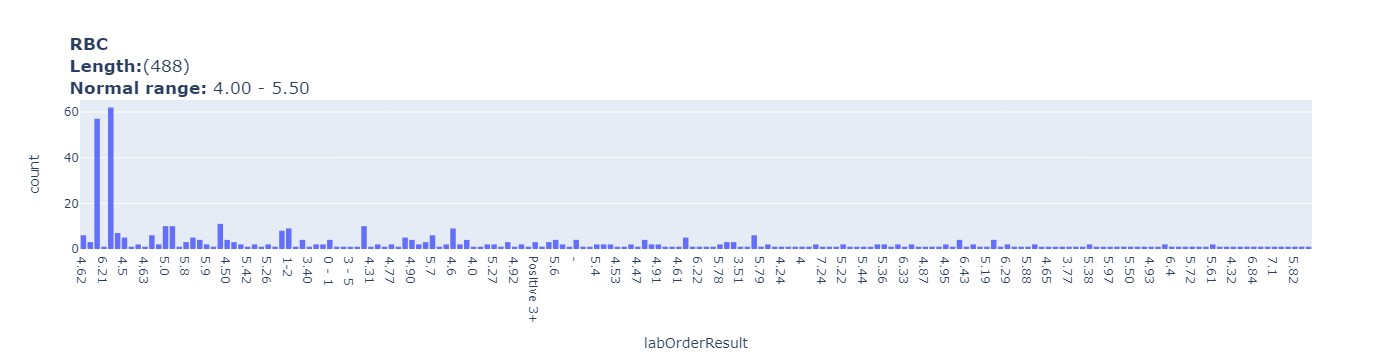

In [343]:
df = selected_lab_df.loc[selected_lab_df['labItemsNameRef'] == 'RBC'] 
df_len = df.shape[0]
lab_name = 'RBC'
normal_range = '4.00 - 5.50'
fig1 = px.histogram(data_frame = df,x = "labOrderResult" ,title=f'<b>{lab_name}</b><br><b>Length:</b>({df_len})<br><b>Normal range:</b> {normal_range}')

fig1.show()

#### labItemsNormalValueRef

In [344]:
selected_lab_df.loc[selected_lab_df['labItemsNameRef']=='RBC','labItemsNormalValueRef'].value_counts()

0-5            75
Negative       63
3.50 - 5.00    45
4.00 - 5.50    44
4.0 - 6.0      44
4.5 - 5.5      39
4.0 - 5.0      33
-              24
3.60 - 6.20    22
4.00 - 6.00    21
3.50 - 5.20    20
3.60-6.20      18
4.50 - 6.30    13
0-3            10
0 - 1           7
                5
Negative -      2
0 - 5           2
3.8 - 6.1       1
Name: labItemsNormalValueRef, dtype: int64

#### labItemsUnit

In [345]:
selected_lab_df.loc[selected_lab_df['labItemsNameRef']=='RBC','labItemsUnit'].value_counts()

                        194
 10S6/mm3                72
 106 cell/cu.mm          51
 10*6/uL                 44
 Cell/HPF                39
 cell/HPF                18
 106 Cells/mm            17
/HPF Cell/HPF            10
cells/HPF                10
 10                      10
 x 10 *6 /ul              9
+                         8
 Cells/HPF                5
(Dysmorphic = found)      1
Name: labItemsUnit, dtype: int64

> Where labOrderResult = ' '

##### ' ' Unit

In [346]:
selected_lab_df.loc[(selected_lab_df['labItemsNameRef']=='RBC') & (selected_lab_df['labItemsUnit'] == '')]

,rowID,cid,labItemsNameRef,labItemsNormalValueRef,labOrderResult,labItemsUnit
72,2981059,8af6c5ce961d556794ddc691089f3887fe0b8167eef188...,RBC,Negative,Negative,
230,2269053,ccc731dacaa44da723a1c9f863091e53de77b9891b0e17...,RBC,Negative,Negative,
262,312651,4772ebad086869522b97f1a5ce290b066e8e464e538fc0...,RBC,4.00 - 6.00,4.63,
292,135663,ab1b3e37fefa842f7c0845835d243911cbd56b79e6447a...,RBC,-,Negative,
436,233681,1131a731abf33d7f3400ad39c3675e262e137e0f20bc71...,RBC,4.00 - 6.00,2.96,
...,...,...,...,...,...,...
13360,1681555,5847c94f0238227268ea5502d80316eb01128fa37285b2...,RBC,Negative,Negative,
13361,1681555,5847c94f0238227268ea5502d80316eb01128fa37285b2...,RBC,0-3,0 - 1,
13440,2431873,b6c83a611fbe7e2b69c13b09108bfecbc9924700f99278...,RBC,4.00 - 6.00,4.54,
13490,2146005,1d60209df9b0437f25613530f9414481912d14c3de4607...,RBC,Negative,Negative,


##### /HPF Unit

In [347]:
selected_lab_df.loc[(selected_lab_df['labItemsNameRef']=='RBC') & (selected_lab_df['labItemsUnit'].str.contains(r'HPF'))]

,rowID,cid,labItemsNameRef,labItemsNormalValueRef,labOrderResult,labItemsUnit
39,601443,a4d3ae6322bcc001916821c27ea51fc0983e232f8bf6f7...,RBC,0 - 1,0-1,Cells/HPF
73,2981059,8af6c5ce961d556794ddc691089f3887fe0b8167eef188...,RBC,0-5,0-1,Cell/HPF
231,2269053,ccc731dacaa44da723a1c9f863091e53de77b9891b0e17...,RBC,0-5,0-1,/HPF Cell/HPF
293,135663,ab1b3e37fefa842f7c0845835d243911cbd56b79e6447a...,RBC,0-5,Not Found,cells/HPF
749,1794203,6851f88ed7bf5dfeba0030cd7f1a5ee965f8867b93d088...,RBC,0-5,0-1,/HPF Cell/HPF
...,...,...,...,...,...,...
12827,4086419,7aa77a25efdd8b888d0abc7a371742666e8770c0a8260c...,RBC,0-5,0-1,Cell/HPF
12878,4053382,68dc12e9e4629ad5edf16966e37be9e2859972ca42edeb...,RBC,0-5,0-1,Cell/HPF
13204,915342,82dc1fbf1cae6b8c7839a06a16ea4c7aa42b5e08ffe9e0...,RBC,0-5,1-2,cell/HPF
13491,2146005,1d60209df9b0437f25613530f9414481912d14c3de4607...,RBC,0-5,0-1,/HPF Cell/HPF


##### 10^6 cell Unit

In [348]:
selected_lab_df.loc[(selected_lab_df['labItemsNameRef']=='RBC') & (selected_lab_df['labItemsUnit'].str.contains(r'106|10.*6'))]

,rowID,cid,labItemsNameRef,labItemsNormalValueRef,labOrderResult,labItemsUnit
8,601443,a4d3ae6322bcc001916821c27ea51fc0983e232f8bf6f7...,RBC,3.60 - 6.20,4.62,x 10 *6 /ul
63,2981059,8af6c5ce961d556794ddc691089f3887fe0b8167eef188...,RBC,4.00 - 5.50,6.21,106 cell/cu.mm
93,888917,4898d581bde0e3216c15662327cd301286670cd12786f6...,RBC,4.0 - 5.0,4.8,10S6/mm3
182,4680522,9fb79d9d7c7e0d536213f063a061707fb599d775fa6087...,RBC,4.0 - 6.0,4.5,10*6/uL
200,4232190,4afad1a7d8762d31af4ee806869a2838a7644b2155e0be...,RBC,3.50 - 5.00,6.40,106 cell/cu.mm
...,...,...,...,...,...,...
13389,4382661,3f3701e8bcda639e00bee3966b726182cdd8cfb37b0883...,RBC,4.5 - 5.5,5.1,10S6/mm3
13481,2146005,1d60209df9b0437f25613530f9414481912d14c3de4607...,RBC,4.00 - 5.50,6.17,106 cell/cu.mm
13522,3873437,bafa3aa41b99714d9a92bf444a1771c3116540cab1d238...,RBC,3.50 - 5.00,4.55,106 cell/cu.mm
13559,1466704,0d62ccf972e7c7562ebedc8014f7c76c00cbe9908869be...,RBC,4.0 - 5.0,5.1,10S6/mm3


##### 10, + , (Dysmorphic = found) Unit

In [349]:
selected_lab_df.loc[(selected_lab_df['labItemsNameRef']=='RBC') &((selected_lab_df['labItemsUnit'].str.contains(r'106|10.*6'))|((selected_lab_df['labItemsUnit'].str.contains(r'HPF'))) == False) & (selected_lab_df['labItemsUnit'] != '')]

,rowID,cid,labItemsNameRef,labItemsNormalValueRef,labOrderResult,labItemsUnit
34,601443,a4d3ae6322bcc001916821c27ea51fc0983e232f8bf6f7...,RBC,,1,+
309,135663,ab1b3e37fefa842f7c0845835d243911cbd56b79e6447a...,RBC,3.60-6.20,4.42,10
1385,3519460,3ed01761668230ce0abdc0020ff5af04b7b504fd50b6f6...,RBC,Negative,2,+
1571,959952,20298e2d56e2d0463037b7b3e524584a03c3d28807a76b...,RBC,Negative,1,+
3641,255598,4b77b0124a435bdfee6a75b4beff4eb64f1325cc5e987b...,RBC,3.60-6.20,4.67,10
4184,127771,6a90efa58eb5e68beb5a69ed961775a07d6c9200b1f2c2...,RBC,3.60-6.20,3.19,10
5210,138362,04bf45444d764f5a03c2525963af448915b28a30c8046c...,RBC,3.60-6.20,5.74,10
5523,1612696,d1cd2f2c19ec5aaf020027f56d1350304cef39a6624fb4...,RBC,,4,+
5797,136403,f64924758d72e80128f331cc1174cffddc3f86a7ba2490...,RBC,3.60-6.20,4.56,10
5952,137776,e778a7989e7e07d8cfc312d73e4531c4dd974ae714af99...,RBC,3.60-6.20,5.22,10


In [350]:
selected_lab_df.loc[(selected_lab_df['labItemsNameRef']=='RBC') &((selected_lab_df['labItemsUnit'].str.contains(r'106|10.*6'))|((selected_lab_df['labItemsUnit'].str.contains(r'HPF'))) == False) & (selected_lab_df['labItemsUnit'] != '')].shape[0]

19

In [351]:
selected_lab_df.loc[selected_lab_df['labItemsNameRef']=='RBC','labItemsUnit'].value_counts()

                        194
 10S6/mm3                72
 106 cell/cu.mm          51
 10*6/uL                 44
 Cell/HPF                39
 cell/HPF                18
 106 Cells/mm            17
/HPF Cell/HPF            10
cells/HPF                10
 10                      10
 x 10 *6 /ul              9
+                         8
 Cells/HPF                5
(Dysmorphic = found)      1
Name: labItemsUnit, dtype: int64

In [352]:
'''
Convert to microlitre μl

- 310 of 448

    (193)
    - 106 cell/cu.mm  (cubic millimeter) (mm3 to microliter = 1:1)
    - 10*6/uL         (microlitre)
    - 106 Cells/mm    (millimeter) (mm3 to microliter = 1:1)
    - 106 Cells/mm    (millimeter) (mm3 to microliter = 1:1)
    
- 117 of 448
    - ' ' Empty Unit (microlitre) (97)
    - 10             (microlitre) (10)

- HPF 82 of 448
    - Cell/HPF
    - cell/HPF
    - /HPF Cell/HPF 
    - cells/HPF    
    - Cells/HPF
    
- Other 8 of 448
    - '+' (Positive, Negative)

'''

"\nConvert to microlitre μl\n\n- 310 of 448\n\n    (193)\n    - 106 cell/cu.mm  (cubic millimeter) (mm3 to microliter = 1:1)\n    - 10*6/uL         (microlitre)\n    - 106 Cells/mm    (millimeter) (mm3 to microliter = 1:1)\n    - 106 Cells/mm    (millimeter) (mm3 to microliter = 1:1)\n    \n- 117 of 448\n    - ' ' Empty Unit (microlitre) (97)\n    - 10             (microlitre) (10)\n\n- HPF 82 of 448\n    - Cell/HPF\n    - cell/HPF\n    - /HPF Cell/HPF \n    - cells/HPF    \n    - Cells/HPF\n    \n- Other 8 of 448\n    - '+' (Positive, Negative)\n\n"

#### labOrderResult

In [353]:
selected_lab_df.loc[selected_lab_df['labItemsNameRef']=='RBC','labOrderResult'].unique()

array(['4.62', '1', '0-1', '6.21', 'Negative', '4.8', '4.5', '6.40',
       '5.83', '4.63', 'Not Found', '4.42', '5.0', '4.2', '2.96', '5.8',
       '4.9', '4.54', '5.9', '6.77', 'Positive 1+', '4.50', '2-3', '4.30',
       '5.42', '5.71', '5.89', '5.26', '5.14', '5.3', '1-2', '4.76',
       '4.4', '3.40', '4.04', '2', '0 - 1', '5.46', '4.98', '3 - 5',
       '3.95', '5.1', '4.31', '4.58', '6.10', '4.77', '5.35', '5.2',
       '4.90', '5.04', '4.55', '5.7', '4.08', '2 - 3', '4.6', '4.88',
       '4.7', '4.0', '4.20', '5.28', '5.27', '6.13', '4.56', '4.92',
       '5.33', '4.16', 'Positive 3+', '50-100', '4.49', '5.6', '4.73',
       '4.97', '-', '5.01', '5.11', '5.4', '4.43', '4.67', '4.53', '6.3',
       '4.57', '4.47', '4.3', '5.32', '4.91', '3.19', '5.52', '4.61',
       '5.5', '4.33', '6.22', '5.02', '4.52', '5.78', '4.1', '5.24',
       '3.51', '5.74', 'Trace', '5.79', '4.82', '5.30', '4.24', '6.8',
       '4.80', '4', '3-5', '5.49', '7.24', '5.17', '6.24', '5.22', '4.26',
       

#### labOrderResult (Non-numeric type)

In [354]:
selected_lab_df.loc[(selected_lab_df['labItemsNameRef']=='RBC') & (selected_lab_df['labOrderResult'].str.replace('.','').str.isnumeric() == False),'labOrderResult'].value_counts()

Negative       62
0-1            57
Positive 1+    11
1-2             9
Not Found       6
Trace           6
Positive 2+     4
0 - 1           4
-               4
2-3             3
Positive 3+     3
5-10            2
2 - 3           2
20-30           1
5 - 10          1
50-100          1
> 100           1
3-5             1
3 - 5           1
10-20           1
Name: labOrderResult, dtype: int64

##### drop Non-numeric 'labOrderResult'

In [355]:
selected_lab_df.loc[selected_lab_df['labItemsNameRef'] == 'RBC'].shape[0]

488

In [356]:
selected_lab_df.loc[selected_lab_df['labItemsNameRef']=='RBC'] = selected_lab_df.drop( index=selected_lab_df.loc[(selected_lab_df['labItemsNameRef']=='RBC') & 
                    (selected_lab_df['labOrderResult'].str.replace('.','').str.isnumeric() == False)].index    )

In [357]:
selected_lab_df.loc[selected_lab_df['labItemsNameRef'] == 'RBC'].shape[0]

308

In [358]:
selected_lab_df.loc[selected_lab_df['labItemsNameRef'] == 'RBC'].shape[0]

308

##### drop + 'labItemsUnit'

In [359]:
selected_lab_df.loc[selected_lab_df['labItemsNameRef']=='RBC'] = selected_lab_df.drop(index=selected_lab_df.loc[(selected_lab_df['labItemsNameRef']=='RBC') & 
                    (selected_lab_df['labItemsUnit'] == '+')].index)

In [360]:
selected_lab_df.loc[selected_lab_df['labItemsNameRef'] == 'RBC'].shape[0]

300

#### Convert

In [361]:
selected_lab_df.loc[(selected_lab_df['labItemsNameRef'] == 'RBC') & (selected_lab_df['labItemsUnit'].str.contains(r'106|10.*6|10')),'labItemsUnit'] = '10*6/uL'

In [362]:
selected_lab_df.loc[(selected_lab_df['labItemsNameRef'] == 'RBC'),'labItemsUnit'].unique()

array(['10*6/uL', ''], dtype=object)

In [363]:
# pd.set_option('display.max_rows', None)
selected_lab_df.loc[(selected_lab_df['labItemsNameRef'] == 'RBC')]

,rowID,cid,labItemsNameRef,labItemsNormalValueRef,labOrderResult,labItemsUnit
8,601443.0,a4d3ae6322bcc001916821c27ea51fc0983e232f8bf6f7...,RBC,3.60 - 6.20,4.62,10*6/uL
63,2981059.0,8af6c5ce961d556794ddc691089f3887fe0b8167eef188...,RBC,4.00 - 5.50,6.21,10*6/uL
93,888917.0,4898d581bde0e3216c15662327cd301286670cd12786f6...,RBC,4.0 - 5.0,4.8,10*6/uL
182,4680522.0,9fb79d9d7c7e0d536213f063a061707fb599d775fa6087...,RBC,4.0 - 6.0,4.5,10*6/uL
200,4232190.0,4afad1a7d8762d31af4ee806869a2838a7644b2155e0be...,RBC,3.50 - 5.00,6.40,10*6/uL
...,...,...,...,...,...,...
13440,2431873.0,b6c83a611fbe7e2b69c13b09108bfecbc9924700f99278...,RBC,4.00 - 6.00,4.54,
13481,2146005.0,1d60209df9b0437f25613530f9414481912d14c3de4607...,RBC,4.00 - 5.50,6.17,10*6/uL
13522,3873437.0,bafa3aa41b99714d9a92bf444a1771c3116540cab1d238...,RBC,3.50 - 5.00,4.55,10*6/uL
13559,1466704.0,0d62ccf972e7c7562ebedc8014f7c76c00cbe9908869be...,RBC,4.0 - 5.0,5.1,10*6/uL


In [364]:
selected_lab_df.loc[selected_lab_df['labItemsNameRef'] == 'RBC','labItemsNormalValueRef'].unique()

array(['3.60 - 6.20', '4.00 - 5.50', '4.0 - 5.0', '4.0 - 6.0',
       '3.50 - 5.00', '4.00 - 6.00', '3.60-6.20', '4.5 - 5.5',
       '3.50 - 5.20', '4.50 - 6.30', '3.8 - 6.1'], dtype=object)

In [365]:
selected_lab_df.loc[selected_lab_df['labItemsNameRef'] == 'RBC','labOrderResult'].unique()

array(['4.62', '6.21', '4.8', '4.5', '6.40', '5.83', '4.63', '4.42',
       '5.0', '4.2', '2.96', '5.8', '4.9', '4.54', '5.9', '6.77', '4.50',
       '4.30', '5.42', '5.71', '5.89', '5.26', '5.14', '5.3', '4.76',
       '4.4', '3.40', '4.04', '5.46', '4.98', '3.95', '5.1', '4.31',
       '4.58', '6.10', '4.77', '5.35', '5.2', '4.90', '5.04', '4.55',
       '5.7', '4.08', '4.6', '4.88', '4.7', '4.0', '4.20', '5.28', '5.27',
       '6.13', '4.56', '4.92', '5.33', '4.16', '4.49', '5.6', '4.73',
       '4.97', '5.01', '5.11', '5.4', '4.43', '4.67', '4.53', '6.3',
       '4.57', '4.47', '4.3', '5.32', '4.91', '3.19', '5.52', '4.61',
       '5.5', '4.33', '6.22', '5.02', '4.52', '5.78', '4.1', '5.24',
       '3.51', '5.74', '5.79', '4.82', '5.30', '4.24', '6.8', '4.80',
       '5.49', '7.24', '5.17', '6.24', '5.22', '4.26', '5.13', '5.44',
       '4.11', '5.36', '5.03', '6.5', '6.33', '4.70', '5.43', '4.87',
       '5.31', '4.78', '4.95', '5.56', '5.05', '6.43', '5.41', '6.59',
       '5.19'

In [366]:
selected_lab_df.loc[selected_lab_df['labItemsNameRef'] == 'RBC','labItemsUnit'].unique()

array(['10*6/uL', ''], dtype=object)

In [367]:
selected_lab_df.loc[selected_lab_df['labItemsNameRef']=='RBC','labItemsUnit'].value_counts()

10*6/uL    203
            97
Name: labItemsUnit, dtype: int64

#### After

In [368]:
selected_lab_df.loc[selected_lab_df['labItemsNameRef'] == 'RBC']

,rowID,cid,labItemsNameRef,labItemsNormalValueRef,labOrderResult,labItemsUnit
8,601443.0,a4d3ae6322bcc001916821c27ea51fc0983e232f8bf6f7...,RBC,3.60 - 6.20,4.62,10*6/uL
63,2981059.0,8af6c5ce961d556794ddc691089f3887fe0b8167eef188...,RBC,4.00 - 5.50,6.21,10*6/uL
93,888917.0,4898d581bde0e3216c15662327cd301286670cd12786f6...,RBC,4.0 - 5.0,4.8,10*6/uL
182,4680522.0,9fb79d9d7c7e0d536213f063a061707fb599d775fa6087...,RBC,4.0 - 6.0,4.5,10*6/uL
200,4232190.0,4afad1a7d8762d31af4ee806869a2838a7644b2155e0be...,RBC,3.50 - 5.00,6.40,10*6/uL
...,...,...,...,...,...,...
13440,2431873.0,b6c83a611fbe7e2b69c13b09108bfecbc9924700f99278...,RBC,4.00 - 6.00,4.54,
13481,2146005.0,1d60209df9b0437f25613530f9414481912d14c3de4607...,RBC,4.00 - 5.50,6.17,10*6/uL
13522,3873437.0,bafa3aa41b99714d9a92bf444a1771c3116540cab1d238...,RBC,3.50 - 5.00,4.55,10*6/uL
13559,1466704.0,0d62ccf972e7c7562ebedc8014f7c76c00cbe9908869be...,RBC,4.0 - 5.0,5.1,10*6/uL


In [369]:
selected_lab_df.loc[(selected_lab_df['labItemsNameRef'] == 'RBC'),'labOrderResult'] = selected_lab_df.loc[(selected_lab_df['labItemsNameRef'] == 'RBC'),'labOrderResult'].astype(float)

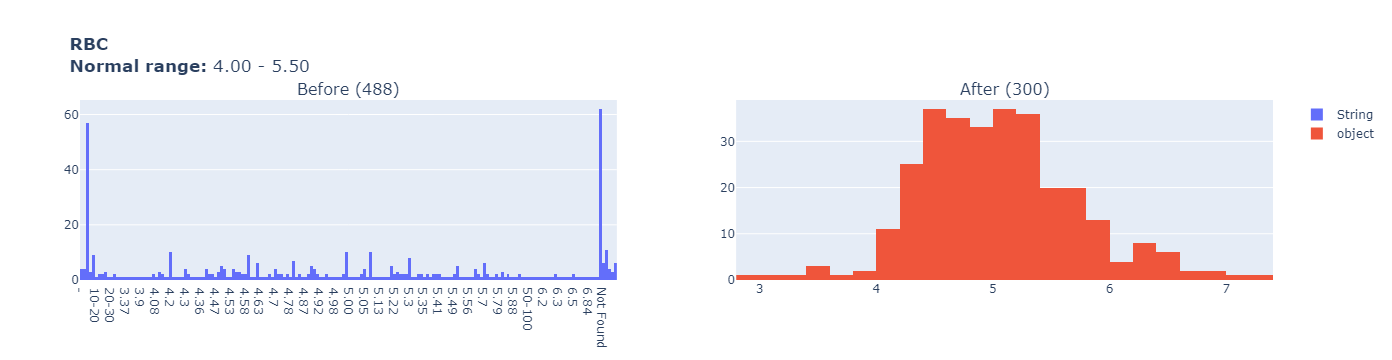

In [370]:
lab_name = 'RBC'
normal_range = '4.00 - 5.50'
before_data = lab_df.loc[lab_df['labItemsNameRef'] == 'RBC']
after_data = selected_lab_df.loc[selected_lab_df['labItemsNameRef'] == 'RBC']

histogram_before_after(lab_name, 
                       normal_range, before_data,after_data)

### WBC

#### Before

In [371]:
unique_labItemsNameRef.loc[unique_labItemsNameRef['labItemsNameRef'] == 'WBC']

,labItemsNameRef,labItemsNormalValueRef,labOrderResult,labItemsUnit,rowID,cid
,,,,,nunique,nunique
2335,WBC,,,%,13,13
2336,WBC,0 - 1,0-1,Cells/HPF,4,4
2337,WBC,0 - 1,1-2,Cells/HPF,1,1
2338,WBC,0 - 1,2 - 3,,1,1
2339,WBC,0 - 1,50 - 100,,1,1
...,...,...,...,...,...,...
2641,WBC,5.00-10.00,3.10,10,1,1
2642,WBC,5.00-10.00,5.76,103/uL,1,1
2643,WBC,5.00-10.00,8.92,103/uL,1,1


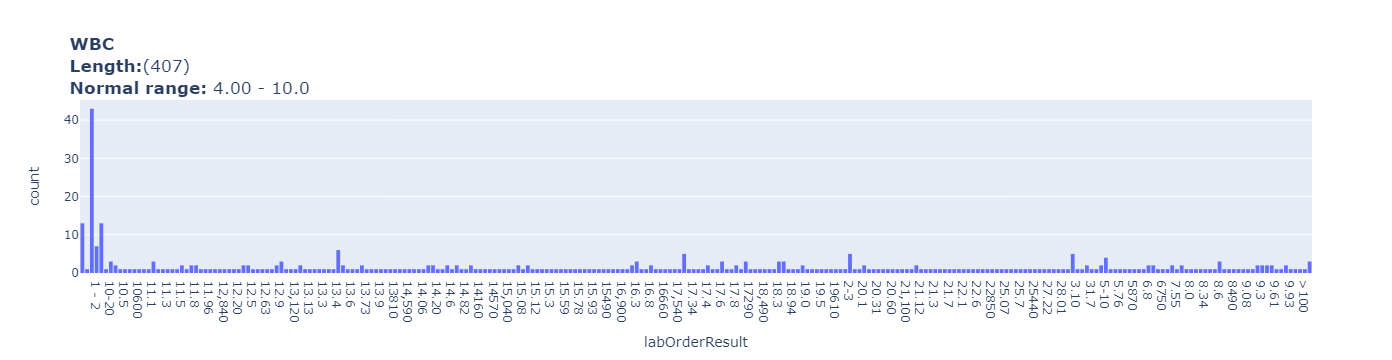

In [372]:
df = selected_lab_df.loc[selected_lab_df['labItemsNameRef'] == 'WBC'].sort_values(by='labOrderResult')
df_len = df.shape[0]
lab_name = 'WBC'
normal_range = '4.00 - 10.0'
fig1 = px.histogram(data_frame = df,x = "labOrderResult",title=f'<b>{lab_name}</b><br><b>Length:</b>({df_len})<br><b>Normal range:</b> {normal_range}')

fig1.show()

In [373]:
selected_lab_df.loc[selected_lab_df['labItemsNameRef'] == 'WBC']

,rowID,cid,labItemsNameRef,labItemsNormalValueRef,labOrderResult,labItemsUnit
7,601443.0,a4d3ae6322bcc001916821c27ea51fc0983e232f8bf6f7...,WBC,4.0 - 11.0,20.0,x 10 *3 /ul
38,601443.0,a4d3ae6322bcc001916821c27ea51fc0983e232f8bf6f7...,WBC,0 - 1,0-1,Cells/HPF
60,2981059.0,8af6c5ce961d556794ddc691089f3887fe0b8167eef188...,WBC,4.00 - 10.00,15.13,103 cell/cu.mm
87,2981059.0,8af6c5ce961d556794ddc691089f3887fe0b8167eef188...,WBC,0-5,1-2,Cell/HPF
92,888917.0,4898d581bde0e3216c15662327cd301286670cd12786f6...,WBC,5.0 - 10.0,8.0,10S3/mm3
...,...,...,...,...,...,...
13505,2146005.0,1d60209df9b0437f25613530f9414481912d14c3de4607...,WBC,0-5,0-1,/HPF Cell/HPF
13519,3873437.0,bafa3aa41b99714d9a92bf444a1771c3116540cab1d238...,WBC,4.00 - 10.00,7.55,103 cell/cu.mm
13554,3873437.0,bafa3aa41b99714d9a92bf444a1771c3116540cab1d238...,WBC,0-5,0-1,Cell/HPF
13558,1466704.0,0d62ccf972e7c7562ebedc8014f7c76c00cbe9908869be...,WBC,5.0 - 10.0,17.6,10S3/mm3


#### labItemsNormalValueRef

In [374]:
selected_lab_df.loc[selected_lab_df['labItemsNameRef'] == 'WBC','labItemsNormalValueRef'].value_counts()

4.00 - 10.00      97
0-5               75
5.0 - 10.0        72
5,000 - 11,000    44
5.00 - 10.00      34
                  13
5.00-10.00        13
5,000 - 10,000    13
4.00 - 12.00      12
0-8               10
4.0 - 11.0         9
0 - 1              7
5 - 10             2
0 - 5              2
4.0-11.0           2
10.00-30.00        1
5000 - 11000       1
Name: labItemsNormalValueRef, dtype: int64

#### labItemsUnit

In [375]:
selected_lab_df.loc[selected_lab_df['labItemsNameRef'] == 'WBC','labItemsUnit'].value_counts()

                   113
 10S3/mm3           72
 103 cell/cu.mm     51
 cu.mm              44
 Cell/HPF           39
 cell/HPF           21
 103/uL             17
%                   13
/HPF Cell/HPF       10
 10                 10
 x 10 *3 /ul         9
 Cells/HPF           5
cells/HPF            3
Name: labItemsUnit, dtype: int64

#### labOrderResult

In [376]:
selected_lab_df.loc[selected_lab_df['labItemsNameRef'] == 'WBC','labOrderResult'].unique()

array(['20.0', '0-1', '15.13', '1-2', '8.0', '14160', '8.34', '17.34',
       '12.3', 'Not Found', '13.31', '38160', '18000', '7.3', '17.2',
       '20.5', '15150', '15790', '9.5', '18660', '25.1', '5-10', '27.58',
       '30-50', '13.73', '16.1', '14.2', '19.3', '18.06', '10-20',
       '13.82', '16520', '2-3', '27.22', '14.9', '16140', '9.06',
       '15,010', '', '1 - 2', '13.0', '13.7', '22.4', '30 - 50', '10,590',
       '16750', '21.82', '19.62', '11.8', '13.4', '15.6', '12.94', '11.6',
       '14.1', '13810', '25.00', '27340', '16.35', '13.8', '17.3', '15.9',
       '21.4', '12,840', '50 - 100', '6.9', '15.31', '11.2', '22300',
       '20.3', '9.08', '11.5', '13.6', '15.3', '20.1', '18.70', '20.25',
       '22850', '12.63', '> 100', '17620', '21.3', '10.6', '16,900',
       '9.6', '6100', '13.5', '5.76', '11.96', '17.39', '12.1', '9.7',
       '11.91', '3-5', '13.24', '15.12', '11710', '20.60', '18,490',
       '3.10', '4.0', '15770', '18.5', '9.8', '16700', '25440', '6.5',
    

#### Drop where 'labOrderResult' == 'Not Found'

In [377]:
selected_lab_df.loc[selected_lab_df['labItemsNameRef'] == 'WBC'].shape[0]

407

In [378]:
selected_lab_df.loc[(selected_lab_df['labItemsNameRef']=='WBC') & (selected_lab_df['labOrderResult']=='Not Found')]

,rowID,cid,labItemsNameRef,labItemsNormalValueRef,labOrderResult,labItemsUnit
307,135663.0,ab1b3e37fefa842f7c0845835d243911cbd56b79e6447a...,WBC,0-5,Not Found,cells/HPF
5994,137776.0,e778a7989e7e07d8cfc312d73e4531c4dd974ae714af99...,WBC,0-5,Not Found,cells/HPF
7366,127236.0,7ce3b258ebd03a5b0b1ba850085871104ca739ae26488c...,WBC,0-5,Not Found,cells/HPF


In [379]:
selected_lab_df.loc[selected_lab_df['labItemsNameRef']=='WBC'] = selected_lab_df.drop(index=selected_lab_df.loc[(selected_lab_df['labItemsNameRef']=='WBC') & (selected_lab_df['labOrderResult']=='Not Found')].index)

In [380]:
selected_lab_df.loc[selected_lab_df['labItemsNameRef'] == 'WBC'].shape[0]

404

In [381]:
def clean_wbc_labOrderResult(x):
    x = str(x).replace(' ','')
    x = x.replace(',','')
    if re.search(r'\d+.*\d+',x):
        return float(re.search(r'\d+',x).group())
    elif re.search(r'>|<.*\d+',x):
        return float(re.search(r'\d+',x).group())
    else:
        if x == '' or x is None:
            return np.nan
        else:
            return float(x)

In [382]:
selected_lab_df.loc[selected_lab_df['labItemsNameRef'] == 'WBC','labOrderResult'] = selected_lab_df.loc[selected_lab_df['labItemsNameRef'] == 'WBC','labOrderResult'].apply(clean_wbc_labOrderResult)

In [383]:
selected_lab_df.loc[selected_lab_df['labItemsNameRef'] == 'WBC']

,rowID,cid,labItemsNameRef,labItemsNormalValueRef,labOrderResult,labItemsUnit
7,601443.0,a4d3ae6322bcc001916821c27ea51fc0983e232f8bf6f7...,WBC,4.0 - 11.0,20.0,x 10 *3 /ul
38,601443.0,a4d3ae6322bcc001916821c27ea51fc0983e232f8bf6f7...,WBC,0 - 1,0.0,Cells/HPF
60,2981059.0,8af6c5ce961d556794ddc691089f3887fe0b8167eef188...,WBC,4.00 - 10.00,15.0,103 cell/cu.mm
87,2981059.0,8af6c5ce961d556794ddc691089f3887fe0b8167eef188...,WBC,0-5,1.0,Cell/HPF
92,888917.0,4898d581bde0e3216c15662327cd301286670cd12786f6...,WBC,5.0 - 10.0,8.0,10S3/mm3
...,...,...,...,...,...,...
13505,2146005.0,1d60209df9b0437f25613530f9414481912d14c3de4607...,WBC,0-5,0.0,/HPF Cell/HPF
13519,3873437.0,bafa3aa41b99714d9a92bf444a1771c3116540cab1d238...,WBC,4.00 - 10.00,7.0,103 cell/cu.mm
13554,3873437.0,bafa3aa41b99714d9a92bf444a1771c3116540cab1d238...,WBC,0-5,0.0,Cell/HPF
13558,1466704.0,0d62ccf972e7c7562ebedc8014f7c76c00cbe9908869be...,WBC,5.0 - 10.0,17.0,10S3/mm3


In [384]:
selected_lab_df.loc[(selected_lab_df['labItemsNameRef'] == 'WBC') & (selected_lab_df['labOrderResult'].isnull() | selected_lab_df['labOrderResult'].isna())]

,rowID,cid,labItemsNameRef,labItemsNormalValueRef,labOrderResult,labItemsUnit
1354,3519460.0,3ed01761668230ce0abdc0020ff5af04b7b504fd50b6f6...,WBC,,NaN,%
1590,959952.0,20298e2d56e2d0463037b7b3e524584a03c3d28807a76b...,WBC,,NaN,%
2510,1995641.0,e6a0c9e3461a5e399f8811891237d8447adc3e01adefab...,WBC,,NaN,%
3375,1924631.0,befd94d9968fd3ddbe7298ab4f19c08be40e540e884c49...,WBC,,NaN,%
4138,3547006.0,8a757814b7aa83c047b398e2111229666553889760007e...,WBC,,NaN,%
4794,2771169.0,6eff7b259a7905b716ad52a12be56ac9df47e49d516135...,WBC,,NaN,%
7616,958768.0,d22a965a3b7907afc58b77313e15697b929f36376c213b...,WBC,,NaN,%
7673,3814780.0,58ea1a6108b5c047ef1602b26def8b09aaf50a91cd0432...,WBC,,NaN,%
8099,2280366.0,a64860453208101e4309a8eeec4a09b876856d4dbcfdac...,WBC,,NaN,%
9015,2306085.0,44ec5e8a73a2a669294b4a56e46da7260576765d81f9f1...,WBC,,NaN,%


In [385]:
selected_lab_df.loc[(selected_lab_df['labItemsNameRef'] == 'WBC') & (selected_lab_df['labOrderResult'].isnull() | selected_lab_df['labOrderResult'].isna())].shape[0]

13

#### Drop labOrderResult == Nan

In [386]:
selected_lab_df.loc[selected_lab_df['labItemsNameRef'] == 'WBC'].shape[0]

404

In [387]:
selected_lab_df.loc[selected_lab_df['labItemsNameRef'] == 'WBC'] = selected_lab_df.drop(index= selected_lab_df.loc[(selected_lab_df['labItemsNameRef'] == 'WBC') & (selected_lab_df['labOrderResult'].isnull() | selected_lab_df['labOrderResult'].isna())].index)

In [388]:
selected_lab_df.loc[selected_lab_df['labItemsNameRef'] == 'WBC'].shape[0]

391

#### Convert
##### <span style="color:green"> labOrderResult </span>  where labItemsUnit (cu.mm) to (10S3/mm3)
by (labOrderResult / 10^3)

In [389]:
selected_lab_df.loc[(selected_lab_df['labItemsNameRef'] == 'WBC'),'labOrderResult'].unique()

array([20.0, 0.0, 15.0, 1.0, 8.0, 14160.0, 17.0, 12.0, 13.0, 38160.0,
       18000.0, 7.0, 15150.0, 15790.0, 9.0, 18660.0, 25.0, 5.0, 27.0,
       30.0, 16.0, 14.0, 19.0, 18.0, 10.0, 16520.0, 2.0, 16140.0, 15010.0,
       22.0, 10590.0, 16750.0, 21.0, 11.0, 13810.0, 27340.0, 12840.0,
       50.0, 6.0, 22300.0, 22850.0, 100.0, 17620.0, 16900.0, 6100.0, 3.0,
       11710.0, 18490.0, 4.0, 15770.0, 16700.0, 25440.0, 15090.0, 23.0,
       5870.0, 9820.0, 26.0, 31.0, 6750.0, 16660.0, 21100.0, 14410.0,
       13120.0, 10600.0, 12930.0, 17290.0, 14650.0, 14570.0, 15040.0,
       15490.0, 17540.0, 19700.0, 14790.0, 8490.0, 22290.0, 11370.0,
       20500.0, 19610.0, 17770.0, 14590.0, 14200.0, 28.0, 25390.0, 7030.0,
       10020.0, 14290.0, 13270.0, 14530.0], dtype=object)

In [390]:
selected_lab_df.loc[(selected_lab_df['labItemsNameRef'] == 'WBC') & 
                    (selected_lab_df["labItemsNormalValueRef"].isin(['5000 - 11000', '5,000 - 11,000','5,000 - 10,000'])) & 
                    (selected_lab_df['labOrderResult'].notna()),'labOrderResult'] = selected_lab_df.loc[(selected_lab_df['labItemsNameRef'] == 'WBC') & 
                    (selected_lab_df["labItemsNormalValueRef"].isin(['5000 - 11000', '5,000 - 11,000','5,000 - 10,000'])) & 
                    (selected_lab_df['labOrderResult'].notna()),'labOrderResult'].astype(float) / 1000

In [391]:
selected_lab_df.loc[(selected_lab_df['labItemsNameRef'] == 'WBC'),'labOrderResult'].unique()

array([20.0, 0.0, 15.0, 1.0, 8.0, 14.16, 17.0, 12.0, 13.0, 38.16, 18.0,
       7.0, 15.15, 15.79, 9.0, 18.66, 25.0, 5.0, 27.0, 30.0, 16.0, 14.0,
       19.0, 10.0, 16.52, 2.0, 16.14, 15.01, 22.0, 10.59, 16.75, 21.0,
       11.0, 13.81, 27.34, 12.84, 50.0, 6.0, 22.3, 22.85, 100.0, 17.62,
       16.9, 6.1, 3.0, 11.71, 18.49, 4.0, 15.77, 16.7, 25.44, 15.09, 23.0,
       5.87, 9.82, 26.0, 31.0, 6.75, 16.66, 21.1, 14.41, 13.12, 10.6,
       12.93, 17.29, 14.65, 14.57, 15.04, 15.49, 17.54, 19.7, 14.79, 8.49,
       22.29, 11.37, 20.5, 19.61, 17.77, 14.59, 14.2, 28.0, 25.39, 7.03,
       10.02, 14.29, 13.27, 14.53], dtype=object)

#### Transform
##### <span style="color:green"> labItemsUnit </span> (cu.mm) to (10S3/mm3)

In [392]:
selected_lab_df.loc[(selected_lab_df['labItemsNameRef'] == 'WBC'),'labItemsUnit'].unique()

array([' x 10 *3 /ul', ' Cells/HPF', ' 103 cell/cu.mm', ' Cell/HPF',
       ' 10S3/mm3', ' cu.mm', '/HPF Cell/HPF', '', ' 10', ' 103/uL',
       ' cell/HPF'], dtype=object)

In [393]:
selected_lab_df.loc[(selected_lab_df['labItemsNameRef'] == 'WBC') & (selected_lab_df['labItemsUnit'].str.contains(r'10')),'labItemsUnit'] = selected_lab_df.loc[(selected_lab_df['labItemsNameRef'] == 'WBC') & (selected_lab_df['labItemsUnit'].str.contains(r'10')),'labItemsUnit'] = "10S3/mm3"

Unit cu.mm is gone

In [394]:
selected_lab_df.loc[(selected_lab_df['labItemsNameRef'] == 'WBC'),'labItemsUnit'].unique()

array(['10S3/mm3', ' Cells/HPF', ' Cell/HPF', ' cu.mm', '/HPF Cell/HPF',
       '', ' cell/HPF'], dtype=object)

#### Transform
##### <span style="color:green"> labItemsNormalValueRef </span> (5,000 - 11,000) to (5.0 - 10.0)

In [395]:
selected_lab_df.loc[(selected_lab_df['labItemsNameRef'] == 'WBC') & 
                    (selected_lab_df["labItemsNormalValueRef"].isin(['5000 - 11000', '5,000 - 11,000','5,000 - 10,000'])) & 
                    (selected_lab_df['labOrderResult'].notna()),'labItemsNormalValueRef'] = selected_lab_df.loc[(selected_lab_df['labItemsNameRef'] == 'WBC') & 
                    (selected_lab_df["labItemsNormalValueRef"].isin(['5000 - 11000', '5,000 - 11,000','5,000 - 10,000'])) & 
                    (selected_lab_df['labOrderResult'].notna()),'labItemsNormalValueRef'] =  "5.0 - 10.0"

In [396]:
selected_lab_df.loc[(selected_lab_df['labItemsNameRef'] == 'WBC') & 
                    (selected_lab_df["labItemsNormalValueRef"] == '5.0 - 10.0') & 
                    (selected_lab_df['labOrderResult'].notna()),['labItemsNormalValueRef','labOrderResult','labItemsUnit']]

,labItemsNormalValueRef,labOrderResult,labItemsUnit
92,5.0 - 10.0,8.0,10S3/mm3
150,5.0 - 10.0,14.16,cu.mm
341,5.0 - 10.0,38.16,cu.mm
385,5.0 - 10.0,18.0,cu.mm
466,5.0 - 10.0,17.0,10S3/mm3
...,...,...,...
13076,5.0 - 10.0,13.27,cu.mm
13309,5.0 - 10.0,14.53,
13388,5.0 - 10.0,17.0,10S3/mm3
13558,5.0 - 10.0,17.0,10S3/mm3


In [397]:
selected_lab_df.loc[(selected_lab_df['labItemsNameRef'] == 'WBC'),'labItemsNormalValueRef'].unique()

array(['4.0 - 11.0', '0 - 1', '4.00 - 10.00', '0-5', '5.0 - 10.0',
       '5.00 - 10.00', '10.00-30.00', '4.00 - 12.00', '0-8', '5 - 10',
       '0 - 5', '5.00-10.00', '4.0-11.0'], dtype=object)

In [398]:
selected_lab_df.loc[(selected_lab_df['labItemsNameRef'] == 'WBC'),'labItemsNormalValueRef'] = '4.00 - 10.00'

In [399]:
selected_lab_df.loc[(selected_lab_df['labItemsNameRef'] == 'WBC'),'labItemsNormalValueRef'].unique()

array(['4.00 - 10.00'], dtype=object)

#### Drop
##### <span style="color:green"> labItemsUnit </span> = [Cells/HPF]

In [400]:
selected_lab_df.loc[(selected_lab_df['labItemsNameRef'] == 'WBC'),'labItemsUnit'].unique()

array(['10S3/mm3', ' Cells/HPF', ' Cell/HPF', ' cu.mm', '/HPF Cell/HPF',
       '', ' cell/HPF'], dtype=object)

In [401]:
selected_lab_df.loc[selected_lab_df['labItemsNameRef']=='WBC'].shape[0]

391

In [402]:
selected_lab_df.loc[selected_lab_df['labItemsNameRef']=='WBC'] = selected_lab_df.drop(index=selected_lab_df.loc[(selected_lab_df['labItemsNameRef']=='WBC') & 
                    (selected_lab_df['labItemsUnit'].str.contains(r'HPF'))].index)

In [403]:
selected_lab_df.loc[selected_lab_df['labItemsNameRef']=='WBC'].shape[0]

316

In [404]:
selected_lab_df.loc[(selected_lab_df['labItemsNameRef'] == 'WBC'),'labItemsUnit'].unique()

array(['10S3/mm3', ' cu.mm', ''], dtype=object)

#### After

In [405]:
selected_lab_df.loc[selected_lab_df['labItemsNameRef']=='WBC']

,rowID,cid,labItemsNameRef,labItemsNormalValueRef,labOrderResult,labItemsUnit
7,601443.0,a4d3ae6322bcc001916821c27ea51fc0983e232f8bf6f7...,WBC,4.00 - 10.00,20.0,10S3/mm3
60,2981059.0,8af6c5ce961d556794ddc691089f3887fe0b8167eef188...,WBC,4.00 - 10.00,15.0,10S3/mm3
92,888917.0,4898d581bde0e3216c15662327cd301286670cd12786f6...,WBC,4.00 - 10.00,8.0,10S3/mm3
150,4680522.0,9fb79d9d7c7e0d536213f063a061707fb599d775fa6087...,WBC,4.00 - 10.00,14.16,cu.mm
197,4232190.0,4afad1a7d8762d31af4ee806869a2838a7644b2155e0be...,WBC,4.00 - 10.00,8.0,10S3/mm3
...,...,...,...,...,...,...
13437,2431873.0,b6c83a611fbe7e2b69c13b09108bfecbc9924700f99278...,WBC,4.00 - 10.00,4.0,
13478,2146005.0,1d60209df9b0437f25613530f9414481912d14c3de4607...,WBC,4.00 - 10.00,21.0,10S3/mm3
13519,3873437.0,bafa3aa41b99714d9a92bf444a1771c3116540cab1d238...,WBC,4.00 - 10.00,7.0,10S3/mm3
13558,1466704.0,0d62ccf972e7c7562ebedc8014f7c76c00cbe9908869be...,WBC,4.00 - 10.00,17.0,10S3/mm3


In [406]:
selected_lab_df.loc[selected_lab_df['labItemsNameRef'] == 'WBC','labOrderResult'] = selected_lab_df.loc[selected_lab_df['labItemsNameRef'] == 'WBC','labOrderResult'].astype(float)

In [407]:
selected_lab_df.loc[selected_lab_df['labItemsNameRef'] == 'WBC'].shape[0]

316

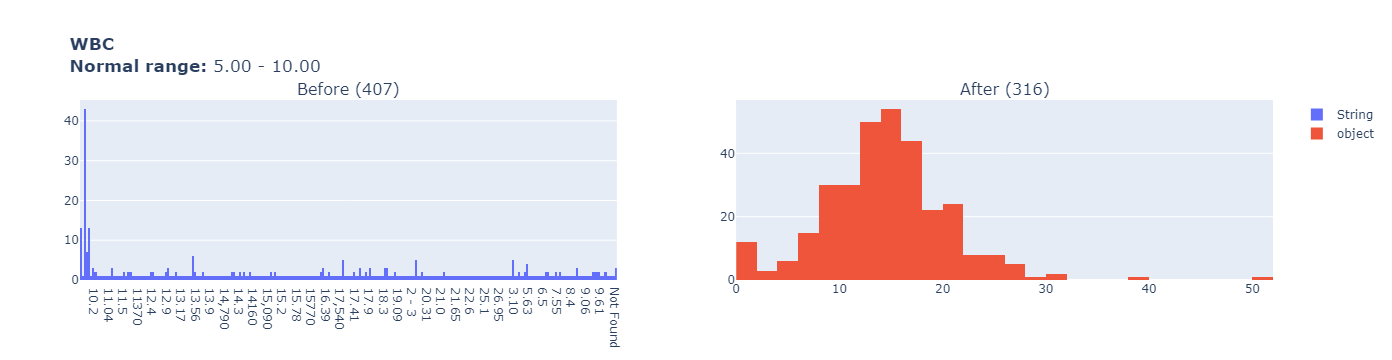

In [408]:
lab_name = 'WBC'
normal_range = '5.00 - 10.00'
before_data = lab_df.loc[lab_df['labItemsNameRef'] == 'WBC']
after_data = selected_lab_df.loc[selected_lab_df['labItemsNameRef'] == 'WBC']

histogram_before_after(lab_name, 
                       normal_range, before_data,after_data)

### Urine RBC

#### Before

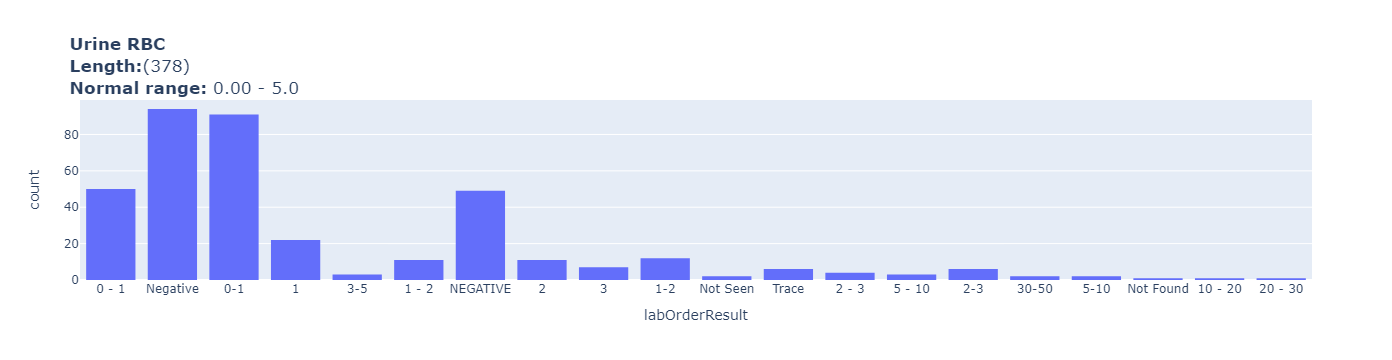

In [409]:
df = selected_lab_df.loc[selected_lab_df['labItemsNameRef'] == 'Urine RBC']
df_len = df.shape[0]
lab_name = 'Urine RBC'
normal_range = '0.00 - 5.0'
fig1 = px.histogram(data_frame = df,x = "labOrderResult",title=f'<b>{lab_name}</b><br><b>Length:</b>({df_len})<br><b>Normal range:</b> {normal_range}')

fig1.show()

In [410]:
selected_lab_df.loc[selected_lab_df['labItemsNameRef'] == 'Urine RBC']

,rowID,cid,labItemsNameRef,labItemsNormalValueRef,labOrderResult,labItemsUnit
106,888917.0,4898d581bde0e3216c15662327cd301286670cd12786f6...,Urine RBC,0 - 5,0 - 1,cells/HPF
129,888917.0,4898d581bde0e3216c15662327cd301286670cd12786f6...,Urine RBC,,Negative,
169,4680522.0,9fb79d9d7c7e0d536213f063a061707fb599d775fa6087...,Urine RBC,/HPF,0-1,
175,4680522.0,9fb79d9d7c7e0d536213f063a061707fb599d775fa6087...,Urine RBC,,Negative,
270,312651.0,4772ebad086869522b97f1a5ce290b066e8e464e538fc0...,Urine RBC,0.00 - 0.00,1,+
...,...,...,...,...,...,...
13449,2431873.0,b6c83a611fbe7e2b69c13b09108bfecbc9924700f99278...,Urine RBC,0 - 5,0-1,
13572,1466704.0,0d62ccf972e7c7562ebedc8014f7c76c00cbe9908869be...,Urine RBC,0 - 5,0 - 1,cells/HPF
13581,1466704.0,0d62ccf972e7c7562ebedc8014f7c76c00cbe9908869be...,Urine RBC,,Negative,
13603,1845430.0,15485864aca2d753ef1e4f1db274ea670e9e317d8f9a63...,Urine RBC,0 - 5,0 - 1,cells/HPF


In [411]:
selected_lab_df.loc[(selected_lab_df['labItemsNameRef'] == 'Urine RBC') & (selected_lab_df['labOrderResult'] == '20 - 30')]

,rowID,cid,labItemsNameRef,labItemsNormalValueRef,labOrderResult,labItemsUnit
12491,913063.0,c2a5018173414957aa1299d1d93bb1db2bb5f75372a4b4...,Urine RBC,0 - 5,20 - 30,cells/HPF


#### labItemsNormalValueRef

In [412]:
selected_lab_df.loc[selected_lab_df['labItemsNameRef'] == 'Urine RBC','labItemsNormalValueRef'].value_counts()

0 - 5          138
               113
Negative        74
/HPF            41
0.00 - 5.00     10
0.00 - 0.00      2
Name: labItemsNormalValueRef, dtype: int64

#### labItemsUnit

In [413]:
selected_lab_df.loc[selected_lab_df['labItemsNameRef'] == 'Urine RBC','labItemsUnit'].value_counts()

              265
 cells/HPF     70
+              40
Cells/HPF       2
cells/HPF       1
Name: labItemsUnit, dtype: int64

#### labOrderResult

In [414]:
selected_lab_df.loc[selected_lab_df['labItemsNameRef'] == 'Urine RBC','labOrderResult'].value_counts()

Negative     94
0-1          91
0 - 1        50
NEGATIVE     49
1            22
1-2          12
1 - 2        11
2            11
3             7
Trace         6
2-3           6
2 - 3         4
3-5           3
5 - 10        3
5-10          2
Not Seen      2
30-50         2
Not Found     1
10 - 20       1
20 - 30       1
Name: labOrderResult, dtype: int64

In [415]:
selected_lab_df.loc[(selected_lab_df['labItemsNameRef'] == lab_name) & (selected_lab_df['labOrderResult'] == '5 - 10')]

,rowID,cid,labItemsNameRef,labItemsNormalValueRef,labOrderResult,labItemsUnit
6993,2461577.0,91416d2893729596a05b26780080d34d559e8ce291c27b...,Urine RBC,0 - 5,5 - 10,cells/HPF
10242,79038.0,282a8080c8b2f1ae6a3a775a04762a31c309213db94e9b...,Urine RBC,0 - 5,5 - 10,cells/HPF
11805,6086909.0,2ee84b136b7e6d4cd0563da0cd0773d5f1ff95683950ed...,Urine RBC,0 - 5,5 - 10,cells/HPF


In [416]:
selected_lab_df.loc[(selected_lab_df['labItemsNameRef'] == lab_name) & (selected_lab_df['labOrderResult'] == '10 - 20')]

,rowID,cid,labItemsNameRef,labItemsNormalValueRef,labOrderResult,labItemsUnit
10551,905685.0,169f0fa0c9f7999f2a4ef356f828de42cdae1ed5e82302...,Urine RBC,0 - 5,10 - 20,cells/HPF


In [417]:
selected_lab_df.loc[(selected_lab_df['labItemsNameRef'] == lab_name) & (selected_lab_df['labOrderResult'] == '20 - 30')]

,rowID,cid,labItemsNameRef,labItemsNormalValueRef,labOrderResult,labItemsUnit
12491,913063.0,c2a5018173414957aa1299d1d93bb1db2bb5f75372a4b4...,Urine RBC,0 - 5,20 - 30,cells/HPF


In [418]:
selected_lab_df.loc[(selected_lab_df['labItemsNameRef'] == lab_name) & (selected_lab_df['labOrderResult'] == '30-50')]

,rowID,cid,labItemsNameRef,labItemsNormalValueRef,labOrderResult,labItemsUnit
8006,490.0,56e4a304ff02b7200044e019358adf60f07c77973aeb68...,Urine RBC,0 - 5,30-50,
9369,1756784.0,3cfc219bdb91773d12f29474efec2f12ceb177c4d058f7...,Urine RBC,0.00 - 5.00,30-50,


In [419]:
def clean_Urine_RBC_labOrderResult(x):
    negs = ['negative','not seen','not found']
    
    if re.search(r'\d+.*\d+',x):
        x = x.replace(' ','')
        # more than normal range (0-5)
        if re.search(r'[5-9]-\d+|[1-9]0-\d+',x):
            return 'positive'
        else:
            return 'negative'
    
    elif x.isnumeric():
        # more than normal range (0-5)
        if int(x) >=5:
            return 'positive'
        else:
            return 'negative'
    elif x.lower() == 'trace':
        return 'trace'
    elif x.lower() in negs:
        return 'negative'
    else:
        return x.lower()

In [420]:
selected_lab_df.loc[selected_lab_df['labItemsNameRef'] == 'Urine RBC','labOrderResult'] = selected_lab_df.loc[selected_lab_df['labItemsNameRef'] == 'Urine RBC','labOrderResult'].apply(clean_Urine_RBC_labOrderResult)

In [421]:
selected_lab_df.loc[selected_lab_df['labItemsNameRef'] == 'Urine RBC','labOrderResult'].value_counts()

negative    363
positive      9
trace         6
Name: labOrderResult, dtype: int64

In [422]:
selected_lab_df.loc[selected_lab_df['labItemsNameRef'] == 'Urine RBC']

,rowID,cid,labItemsNameRef,labItemsNormalValueRef,labOrderResult,labItemsUnit
106,888917.0,4898d581bde0e3216c15662327cd301286670cd12786f6...,Urine RBC,0 - 5,negative,cells/HPF
129,888917.0,4898d581bde0e3216c15662327cd301286670cd12786f6...,Urine RBC,,negative,
169,4680522.0,9fb79d9d7c7e0d536213f063a061707fb599d775fa6087...,Urine RBC,/HPF,negative,
175,4680522.0,9fb79d9d7c7e0d536213f063a061707fb599d775fa6087...,Urine RBC,,negative,
270,312651.0,4772ebad086869522b97f1a5ce290b066e8e464e538fc0...,Urine RBC,0.00 - 0.00,negative,+
...,...,...,...,...,...,...
13449,2431873.0,b6c83a611fbe7e2b69c13b09108bfecbc9924700f99278...,Urine RBC,0 - 5,negative,
13572,1466704.0,0d62ccf972e7c7562ebedc8014f7c76c00cbe9908869be...,Urine RBC,0 - 5,negative,cells/HPF
13581,1466704.0,0d62ccf972e7c7562ebedc8014f7c76c00cbe9908869be...,Urine RBC,,negative,
13603,1845430.0,15485864aca2d753ef1e4f1db274ea670e9e317d8f9a63...,Urine RBC,0 - 5,negative,cells/HPF


In [423]:
selected_lab_df.loc[selected_lab_df['labItemsNameRef'] == 'Urine RBC','labItemsUnit'] = '+'

In [424]:
selected_lab_df.loc[selected_lab_df['labItemsNameRef'] == 'Urine RBC']

,rowID,cid,labItemsNameRef,labItemsNormalValueRef,labOrderResult,labItemsUnit
106,888917.0,4898d581bde0e3216c15662327cd301286670cd12786f6...,Urine RBC,0 - 5,negative,+
129,888917.0,4898d581bde0e3216c15662327cd301286670cd12786f6...,Urine RBC,,negative,+
169,4680522.0,9fb79d9d7c7e0d536213f063a061707fb599d775fa6087...,Urine RBC,/HPF,negative,+
175,4680522.0,9fb79d9d7c7e0d536213f063a061707fb599d775fa6087...,Urine RBC,,negative,+
270,312651.0,4772ebad086869522b97f1a5ce290b066e8e464e538fc0...,Urine RBC,0.00 - 0.00,negative,+
...,...,...,...,...,...,...
13449,2431873.0,b6c83a611fbe7e2b69c13b09108bfecbc9924700f99278...,Urine RBC,0 - 5,negative,+
13572,1466704.0,0d62ccf972e7c7562ebedc8014f7c76c00cbe9908869be...,Urine RBC,0 - 5,negative,+
13581,1466704.0,0d62ccf972e7c7562ebedc8014f7c76c00cbe9908869be...,Urine RBC,,negative,+
13603,1845430.0,15485864aca2d753ef1e4f1db274ea670e9e317d8f9a63...,Urine RBC,0 - 5,negative,+


In [425]:
selected_lab_df.loc[selected_lab_df['labItemsNameRef'] == 'Urine RBC','labItemsNormalValueRef'] = '0-5'

In [426]:
selected_lab_df.loc[selected_lab_df['labItemsNameRef'] == 'Urine RBC']

,rowID,cid,labItemsNameRef,labItemsNormalValueRef,labOrderResult,labItemsUnit
106,888917.0,4898d581bde0e3216c15662327cd301286670cd12786f6...,Urine RBC,0-5,negative,+
129,888917.0,4898d581bde0e3216c15662327cd301286670cd12786f6...,Urine RBC,0-5,negative,+
169,4680522.0,9fb79d9d7c7e0d536213f063a061707fb599d775fa6087...,Urine RBC,0-5,negative,+
175,4680522.0,9fb79d9d7c7e0d536213f063a061707fb599d775fa6087...,Urine RBC,0-5,negative,+
270,312651.0,4772ebad086869522b97f1a5ce290b066e8e464e538fc0...,Urine RBC,0-5,negative,+
...,...,...,...,...,...,...
13449,2431873.0,b6c83a611fbe7e2b69c13b09108bfecbc9924700f99278...,Urine RBC,0-5,negative,+
13572,1466704.0,0d62ccf972e7c7562ebedc8014f7c76c00cbe9908869be...,Urine RBC,0-5,negative,+
13581,1466704.0,0d62ccf972e7c7562ebedc8014f7c76c00cbe9908869be...,Urine RBC,0-5,negative,+
13603,1845430.0,15485864aca2d753ef1e4f1db274ea670e9e317d8f9a63...,Urine RBC,0-5,negative,+


#### After

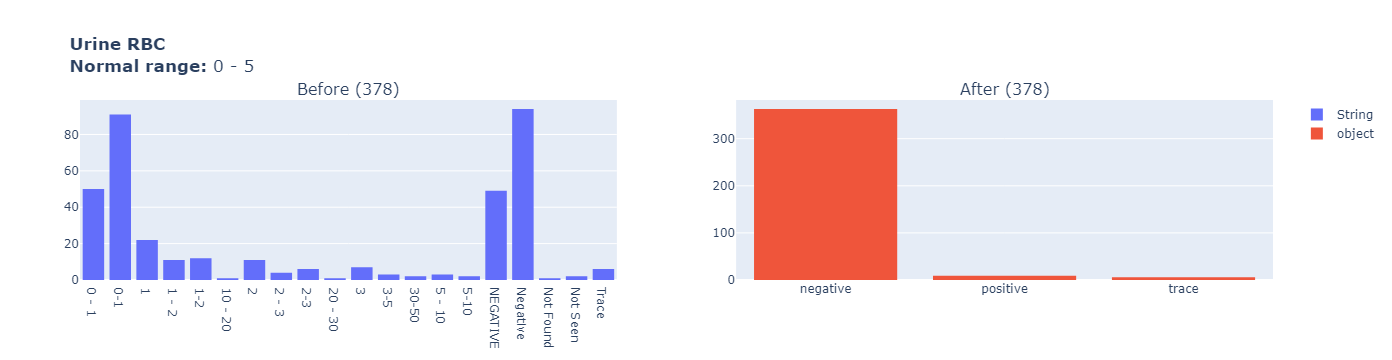

In [427]:
lab_name = 'Urine RBC'
normal_range = '0 - 5'
before_data = lab_df.loc[lab_df['labItemsNameRef'] == lab_name]
after_data = selected_lab_df.loc[selected_lab_df['labItemsNameRef'] == lab_name]

histogram_before_after(lab_name, 
                       normal_range, before_data,after_data)

### HCT

#### Before

In [428]:
selected_lab_df.loc[selected_lab_df['labItemsNameRef'] == 'HCT']

,rowID,cid,labItemsNameRef,labItemsNormalValueRef,labOrderResult,labItemsUnit
6,601443.0,a4d3ae6322bcc001916821c27ea51fc0983e232f8bf6f7...,HCT,34.0 - 50.0,36.4,%
50,2981059.0,8af6c5ce961d556794ddc691089f3887fe0b8167eef188...,HCT,40 - 54,47.4,%
91,888917.0,4898d581bde0e3216c15662327cd301286670cd12786f6...,HCT,36 - 46,41,%
149,4680522.0,9fb79d9d7c7e0d536213f063a061707fb599d775fa6087...,HCT,37 - 47,36.9,%
187,4232190.0,4afad1a7d8762d31af4ee806869a2838a7644b2155e0be...,HCT,37 - 47,37.2,%
...,...,...,...,...,...,...
13428,2431873.0,b6c83a611fbe7e2b69c13b09108bfecbc9924700f99278...,HCT,33.00 - 51.00,44.2,
13468,2146005.0,1d60209df9b0437f25613530f9414481912d14c3de4607...,HCT,40 - 54,37.2,%
13509,3873437.0,bafa3aa41b99714d9a92bf444a1771c3116540cab1d238...,HCT,37 - 47,38.0,%
13557,1466704.0,0d62ccf972e7c7562ebedc8014f7c76c00cbe9908869be...,HCT,36 - 46,39,%


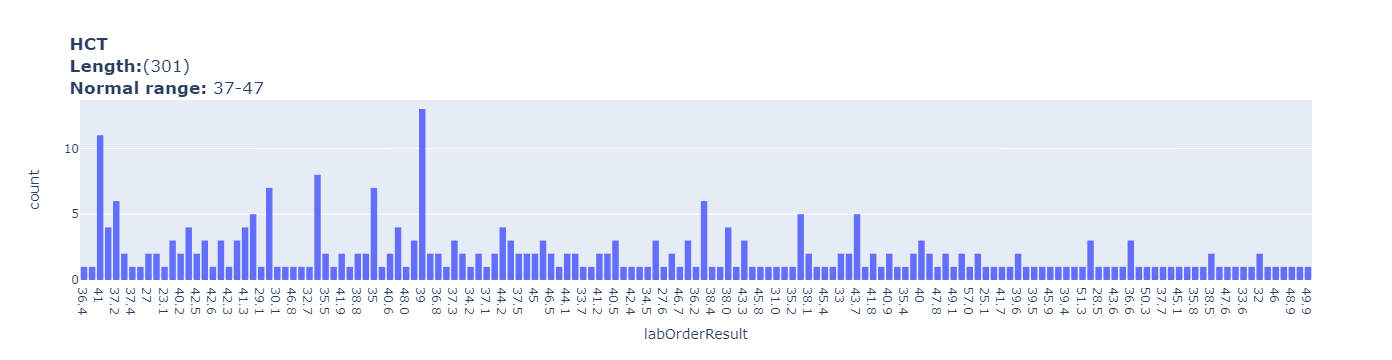

In [429]:
lab_name = 'HCT'
df = selected_lab_df.loc[selected_lab_df['labItemsNameRef'] == lab_name]
df_len = df.shape[0]

normal_range = '37-47'
fig1 = px.histogram(data_frame = df,x = "labOrderResult",title=f'<b>{lab_name}</b><br><b>Length:</b>({df_len})<br><b>Normal range:</b> {normal_range}')

fig1.show()

#### labItemsNormalValueRef

In [430]:
selected_lab_df.loc[selected_lab_df['labItemsNameRef'] == 'HCT','labItemsNormalValueRef'].value_counts()

37 - 47          43
40 - 50          39
36 - 46          33
37.00 - 47.00    24
41 - 51          23
34.0 - 50.0      22
40 - 54          22
40.00 - 54.00    22
33.00 - 51.00    21
34.0-50.0        18
37.0 - 54.0      13
35.00 - 49.00    12
38.0 - 68.0       8
36.0 - 48.0       1
Name: labItemsNormalValueRef, dtype: int64

#### labItemsUnit

In [431]:
selected_lab_df.loc[selected_lab_df['labItemsNameRef'] == 'HCT','labItemsUnit'].value_counts()

 %    204
       97
Name: labItemsUnit, dtype: int64

#### labOrderResult

In [432]:
selected_lab_df.loc[selected_lab_df['labItemsNameRef'] == 'HCT','labOrderResult'].unique()

array(['36.4', '47.4', '41', '36.9', '37.2', '47.0', '37.4', '32.5', '27',
       '38.2', '23.1', '42.2', '40.2', '39.2', '42.5', '38.9', '42.6',
       '38.3', '42.3', '40.7', '41.3', '43', '29.1', '36', '30.1', '34.7',
       '46.8', '46.1', '32.7', '38', '35.5', '34.8', '41.9', '48.2',
       '38.8', '36.3', '35', '44.6', '40.6', '40.4', '48.0', '41.1', '39',
       '31', '36.8', '33.8', '37.3', '41.4', '34.2', '45.5', '37.1',
       '48.6', '44.2', '41.6', '37.5', '43.2', '45', '39.8', '46.5',
       '44.8', '44.1', '43.4', '33.7', '35.6', '41.2', '44', '40.5',
       '26.0', '42.4', '32.6', '34.5', '41.5', '27.6', '49.5', '46.7',
       '40.0', '36.2', '37', '38.4', '25.4', '38.0', '43.1', '43.3',
       '26.3', '45.8', '50.8', '31.0', '54.4', '35.2', '42', '38.1',
       '52.4', '45.4', '37.0', '33', '35.9', '43.7', '39.9', '41.8',
       '36.7', '40.9', '34.3', '35.4', '37.9', '40', '45.6', '47.8',
       '37.6', '49.1', '45.3', '57.0', '26.4', '25.1', '47.2', '41.7',
       '50

In [433]:
selected_lab_df.loc[selected_lab_df['labItemsNameRef'] == 'HCT','labOrderResult'] = selected_lab_df.loc[selected_lab_df['labItemsNameRef'] == 'HCT','labOrderResult'].astype(float)

#### After

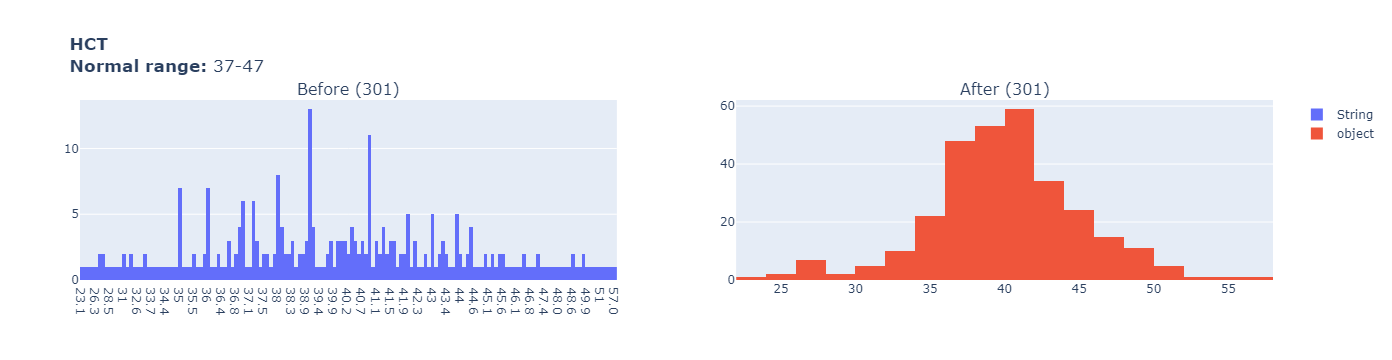

In [434]:
lab_name = 'HCT'
normal_range = '37-47'
before_data = lab_df.loc[lab_df['labItemsNameRef'] == lab_name]
after_data = selected_lab_df.loc[selected_lab_df['labItemsNameRef'] == lab_name]

histogram_before_after(lab_name, 
                       normal_range, before_data,after_data)

### MCV

#### Before

In [435]:
selected_lab_df.loc[selected_lab_df['labItemsNameRef'] == 'MCV']

,rowID,cid,labItemsNameRef,labItemsNormalValueRef,labOrderResult,labItemsUnit
17,601443.0,a4d3ae6322bcc001916821c27ea51fc0983e232f8bf6f7...,MCV,78.0 - 98.0,78.8,fl
51,2981059.0,8af6c5ce961d556794ddc691089f3887fe0b8167eef188...,MCV,80.0 - 100.0,76.3,fl
94,888917.0,4898d581bde0e3216c15662327cd301286670cd12786f6...,MCV,85.0 - 95.0,85.6,fl
159,4680522.0,9fb79d9d7c7e0d536213f063a061707fb599d775fa6087...,MCV,80.1 - 98.1,82.4,fl
188,4232190.0,4afad1a7d8762d31af4ee806869a2838a7644b2155e0be...,MCV,80.0 - 100.0,58.1,fl
...,...,...,...,...,...,...
13429,2431873.0,b6c83a611fbe7e2b69c13b09108bfecbc9924700f99278...,MCV,80.00 - 100.00,97.3,
13469,2146005.0,1d60209df9b0437f25613530f9414481912d14c3de4607...,MCV,80.0 - 100.0,60.3,fl
13510,3873437.0,bafa3aa41b99714d9a92bf444a1771c3116540cab1d238...,MCV,80.0 - 100.0,83.6,fl
13560,1466704.0,0d62ccf972e7c7562ebedc8014f7c76c00cbe9908869be...,MCV,85.0 - 95.0,76.5,fl


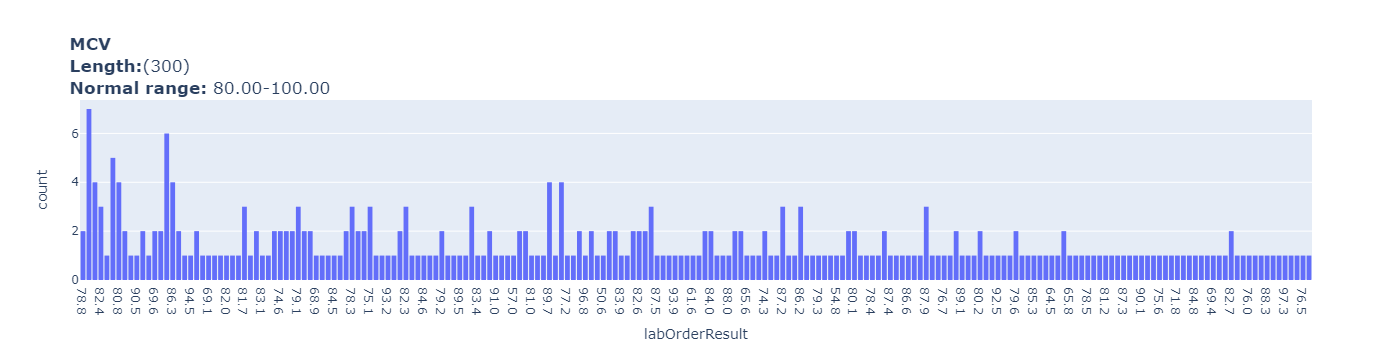

In [436]:
lab_name = 'MCV'
df = selected_lab_df.loc[selected_lab_df['labItemsNameRef'] == lab_name]
df_len = df.shape[0]

normal_range = '80.00-100.00'
fig1 = px.histogram(data_frame = df,x = "labOrderResult",title=f'<b>{lab_name}</b><br><b>Length:</b>({df_len})<br><b>Normal range:</b> {normal_range}')
fig1.show()

#### labItemsNormalValueRef

In [437]:
selected_lab_df.loc[selected_lab_df['labItemsNameRef'] == 'MCV','labItemsNormalValueRef'].value_counts()

80.00 - 100.00    79
85.0 - 95.0       72
80.0 - 100.0      64
80.1 - 98.1       45
80.0-100.0        14
82.0 - 98.0       13
78.0 - 98.0        9
78.0-98.0          2
80 - 100           2
Name: labItemsNormalValueRef, dtype: int64

#### labItemsUnit

In [438]:
selected_lab_df.loc[selected_lab_df['labItemsNameRef'] == 'MCV','labItemsUnit'].value_counts()

 fl    203
        97
Name: labItemsUnit, dtype: int64

In [439]:
selected_lab_df.loc[(selected_lab_df['labItemsNameRef'] == 'MCV') & (selected_lab_df['labItemsUnit'] == '')]

,rowID,cid,labItemsNameRef,labItemsNormalValueRef,labOrderResult,labItemsUnit
251,312651.0,4772ebad086869522b97f1a5ce290b066e8e464e538fc0...,MCV,80.00 - 100.00,80.8,
425,233681.0,1131a731abf33d7f3400ad39c3675e262e137e0f20bc71...,MCV,80.00 - 100.00,78.0,
637,1761048.0,b33448647b15053f6c4a935349dc36ba37c8be792c48b2...,MCV,80.00 - 100.00,86.3,
697,615063.0,3ac1457c0c846406560a644538594f13bdeb1181223c3c...,MCV,80.00 - 100.00,57.4,
840,1037564.0,d4140c16d748393b0ed317aae693ed2eb8f37c6e0b64fb...,MCV,80.00 - 100.00,78.0,
...,...,...,...,...,...,...
12265,563.0,a84f3e687fa695e10e885b6f8b73d528c763f27fe1df3a...,MCV,80.00 - 100.00,90.0,
12897,716236.0,e7dc2a06e9312a639e2d0cace36d5d92eccf35ac729dcf...,MCV,80.00 - 100.00,84.9,
13237,1265893.0,c8f9a3221febeb643830b04fa92214ed67b5d49877218e...,MCV,80.00 - 100.00,59.2,
13321,1681555.0,5847c94f0238227268ea5502d80316eb01128fa37285b2...,MCV,82.0 - 98.0,60.6,


In [440]:
selected_lab_df.loc[selected_lab_df['labItemsNameRef'] == 'MCV','labItemsUnit'] = 'fl'

In [441]:
selected_lab_df.loc[selected_lab_df['labItemsNameRef'] == 'MCV','labItemsUnit'].value_counts()

fl    300
Name: labItemsUnit, dtype: int64

In [442]:
selected_lab_df.loc[selected_lab_df['labItemsNameRef'] == 'MCV','labItemsNormalValueRef'] = '80.00 - 100.00'

In [443]:
selected_lab_df.loc[selected_lab_df['labItemsNameRef'] == 'MCV','labItemsNormalValueRef'].value_counts()

80.00 - 100.00    300
Name: labItemsNormalValueRef, dtype: int64

In [444]:
selected_lab_df.loc[selected_lab_df['labItemsNameRef'] == 'MCV']

,rowID,cid,labItemsNameRef,labItemsNormalValueRef,labOrderResult,labItemsUnit
17,601443.0,a4d3ae6322bcc001916821c27ea51fc0983e232f8bf6f7...,MCV,80.00 - 100.00,78.8,fl
51,2981059.0,8af6c5ce961d556794ddc691089f3887fe0b8167eef188...,MCV,80.00 - 100.00,76.3,fl
94,888917.0,4898d581bde0e3216c15662327cd301286670cd12786f6...,MCV,80.00 - 100.00,85.6,fl
159,4680522.0,9fb79d9d7c7e0d536213f063a061707fb599d775fa6087...,MCV,80.00 - 100.00,82.4,fl
188,4232190.0,4afad1a7d8762d31af4ee806869a2838a7644b2155e0be...,MCV,80.00 - 100.00,58.1,fl
...,...,...,...,...,...,...
13429,2431873.0,b6c83a611fbe7e2b69c13b09108bfecbc9924700f99278...,MCV,80.00 - 100.00,97.3,fl
13469,2146005.0,1d60209df9b0437f25613530f9414481912d14c3de4607...,MCV,80.00 - 100.00,60.3,fl
13510,3873437.0,bafa3aa41b99714d9a92bf444a1771c3116540cab1d238...,MCV,80.00 - 100.00,83.6,fl
13560,1466704.0,0d62ccf972e7c7562ebedc8014f7c76c00cbe9908869be...,MCV,80.00 - 100.00,76.5,fl


#### labOrderResult

In [445]:
selected_lab_df.loc[selected_lab_df['labItemsNameRef'] == 'MCV','labOrderResult'].unique()

array(['78.8', '76.3', '85.6', '82.4', '58.1', '80.6', '80.8', '73.5',
       '54.0', '90.5', '78.0', '82.5', '69.6', '86.8', '81.4', '86.3',
       '72.2', '57.4', '94.5', '89.0', '67.2', '69.1', '70.7', '80.4',
       '82.0', '61.1', '80.3', '81.7', '88.7', '85.9', '83.1', '92.4',
       '82.8', '74.6', '85.5', '91.5', '79.1', '89.3', '81.3', '68.9',
       '89.8', '67.4', '84.5', '82.9', '84.2', '78.3', '95.3', '90.4',
       '75.1', '53.9', '73.9', '93.2', '98.6', '64.8', '82.3', '79.4',
       '97.0', '84.6', '70.4', '89.4', '79.2', '82.1', '93.6', '89.5',
       '92.3', '84.9', '83.4', '76.1', '76.2', '91.0', '69.8', '86.9',
       '57.0', '92.9', '72.8', '81.0', '77.9', '86.5', '89.7', '81.9',
       '78.6', '77.2', '79.0', '86.4', '96.8', '84.7', '59.9', '50.6',
       '71.7', '78.9', '83.9', '74.5', '87.7', '82.6', '75.0', '85.0',
       '87.5', '73.4', '88.5', '93.9', '73.0', '95.8', '61.6', '86.0',
       '88.4', '84.0', '95.4', '55.8', '88.0', '83.3', '84.3', '65.6',
      

In [446]:
selected_lab_df.loc[selected_lab_df['labItemsNameRef'] == 'MCV','labOrderResult'] = selected_lab_df.loc[selected_lab_df['labItemsNameRef'] == 'MCV','labOrderResult'].astype(float)

#### After

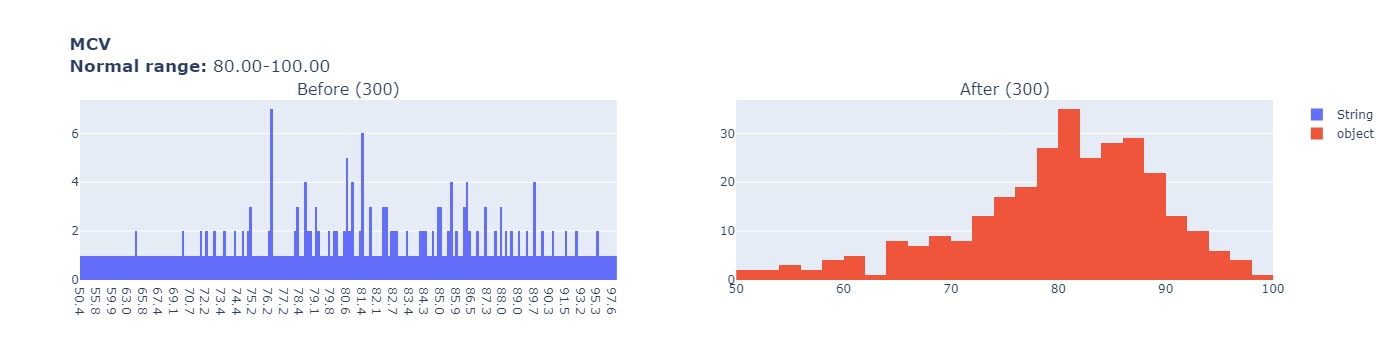

In [447]:
lab_name = 'MCV'
normal_range = '80.00-100.00'
before_data = lab_df.loc[lab_df['labItemsNameRef'] == lab_name]
after_data = selected_lab_df.loc[selected_lab_df['labItemsNameRef'] == lab_name]

histogram_before_after(lab_name, 
                       normal_range, before_data,after_data)

### MCH

#### Before

In [448]:
lab_name = 'MCH'
selected_lab_df.loc[selected_lab_df['labItemsNameRef'] == lab_name]

,rowID,cid,labItemsNameRef,labItemsNormalValueRef,labOrderResult,labItemsUnit
18,601443.0,a4d3ae6322bcc001916821c27ea51fc0983e232f8bf6f7...,MCH,27.0 - 34.0,25.8,pg
61,2981059.0,8af6c5ce961d556794ddc691089f3887fe0b8167eef188...,MCH,27.0 - 34.0,25.0,pg
95,888917.0,4898d581bde0e3216c15662327cd301286670cd12786f6...,MCH,28.0 - 32.0,27.6,pg
160,4680522.0,9fb79d9d7c7e0d536213f063a061707fb599d775fa6087...,MCH,27.1 - 32.1,26.1,pg
198,4232190.0,4afad1a7d8762d31af4ee806869a2838a7644b2155e0be...,MCH,27.0 - 34.0,19.3,pg
...,...,...,...,...,...,...
13438,2431873.0,b6c83a611fbe7e2b69c13b09108bfecbc9924700f99278...,MCH,25.00 - 33.00,29.9,
13479,2146005.0,1d60209df9b0437f25613530f9414481912d14c3de4607...,MCH,27.0 - 34.0,19.7,pg
13520,3873437.0,bafa3aa41b99714d9a92bf444a1771c3116540cab1d238...,MCH,27.0 - 34.0,28.1,pg
13561,1466704.0,0d62ccf972e7c7562ebedc8014f7c76c00cbe9908869be...,MCH,28.0 - 32.0,26.7,pg


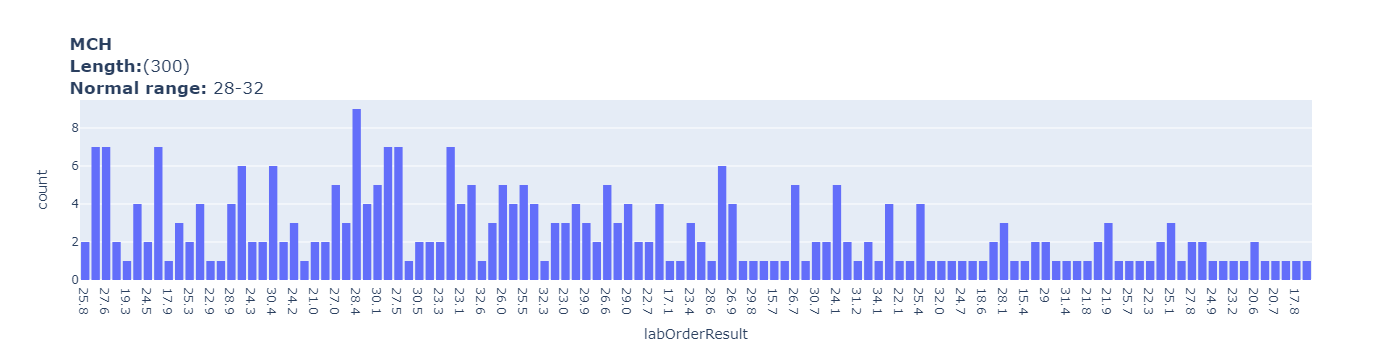

In [449]:
df = selected_lab_df.loc[selected_lab_df['labItemsNameRef'] == lab_name]
df_len = df.shape[0]

normal_range = '28-32'
fig1 = px.histogram(data_frame = df,x = "labOrderResult",title=f'<b>{lab_name}</b><br><b>Length:</b>({df_len})<br><b>Normal range:</b> {normal_range}')
fig1.show()

#### labItemsNormalValueRef

In [450]:
selected_lab_df.loc[selected_lab_df['labItemsNameRef'] == lab_name,'labItemsNormalValueRef'].value_counts()

28.0 - 32.0      72
27.0 - 34.0      60
27.00 - 34.00    58
27.1 - 32.1      44
25.00 - 33.00    21
25.0-33.0        14
25.0 - 33.0      13
27.0 - 33.0      13
25 - 33           4
27.1 - 31.1       1
Name: labItemsNormalValueRef, dtype: int64

#### labItemsUnit

In [451]:
selected_lab_df.loc[selected_lab_df['labItemsNameRef'] == lab_name,'labItemsUnit'].value_counts()

 pg    203
        97
Name: labItemsUnit, dtype: int64

In [452]:
selected_lab_df.loc[(selected_lab_df['labItemsNameRef'] == lab_name) & (selected_lab_df['labItemsUnit'] == '')]

,rowID,cid,labItemsNameRef,labItemsNormalValueRef,labOrderResult,labItemsUnit
260,312651.0,4772ebad086869522b97f1a5ce290b066e8e464e538fc0...,MCH,25.00 - 33.00,24.5,
434,233681.0,1131a731abf33d7f3400ad39c3675e262e137e0f20bc71...,MCH,25.00 - 33.00,25.3,
646,1761048.0,b33448647b15053f6c4a935349dc36ba37c8be792c48b2...,MCH,27.00 - 34.00,26.5,
706,615063.0,3ac1457c0c846406560a644538594f13bdeb1181223c3c...,MCH,27.00 - 34.00,17.6,
849,1037564.0,d4140c16d748393b0ed317aae693ed2eb8f37c6e0b64fb...,MCH,27.00 - 34.00,24.2,
...,...,...,...,...,...,...
12274,563.0,a84f3e687fa695e10e885b6f8b73d528c763f27fe1df3a...,MCH,25.00 - 33.00,28.1,
12906,716236.0,e7dc2a06e9312a639e2d0cace36d5d92eccf35ac729dcf...,MCH,27.00 - 34.00,26.8,
13246,1265893.0,c8f9a3221febeb643830b04fa92214ed67b5d49877218e...,MCH,27.00 - 34.00,17.8,
13322,1681555.0,5847c94f0238227268ea5502d80316eb01128fa37285b2...,MCH,27.0 - 33.0,20.6,


In [453]:
selected_lab_df.loc[selected_lab_df['labItemsNameRef'] == 'MCH','labItemsUnit'] = 'pg'

In [454]:
selected_lab_df.loc[selected_lab_df['labItemsNameRef'] == 'MCH','labItemsUnit'].value_counts()

pg    300
Name: labItemsUnit, dtype: int64

In [455]:
selected_lab_df.loc[selected_lab_df['labItemsNameRef'] == 'MCH','labItemsUnit'].value_counts()

pg    300
Name: labItemsUnit, dtype: int64

In [456]:
selected_lab_df.loc[selected_lab_df['labItemsNameRef'] == 'MCH','labItemsNormalValueRef'] = '28.0 - 32.0'

In [457]:
selected_lab_df.loc[selected_lab_df['labItemsNameRef'] == 'MCH','labItemsNormalValueRef'].value_counts()

28.0 - 32.0    300
Name: labItemsNormalValueRef, dtype: int64

#### labOrderResult

In [458]:
selected_lab_df.loc[selected_lab_df['labItemsNameRef'] == lab_name,'labOrderResult'].unique()

array(['25.8', '25.0', '27.6', '26.1', '19.3', '26.3', '24.5', '25.6',
       '17.9', '29.4', '25.3', '27.4', '22.9', '30.0', '28.9', '26.5',
       '24.3', '17.6', '30.4', '30.3', '24.2', '19.9', '21.0', '24.0',
       '27.0', '19.4', '28.4', '28.2', '30.1', '26.4', '27.5', '31.5',
       '30.5', '26.2', '23.3', '28.8', '23.1', '27.7', '32.6', '29.2',
       '26.0', '27.3', '25.5', '30.6', '32.3', '28.7', '23.0', '28.5',
       '29.9', '31.1', '26.6', '31.6', '29.0', '29.3', '22.7', '28.3',
       '17.1', '31.8', '23.4', '27.1', '28.6', '26.8', '26.9', '31.9',
       '29.8', '19.6', '15.7', '24.6', '26.7', '23.6', '30.7', '28.0',
       '24.1', '30.8', '31.2', '20.1', '34.1', '25.2', '22.1', '29.5',
       '25.4', '23.9', '32.0', '22.2', '24.7', '17.0', '18.6', '22.5',
       '28.1', '27.2', '15.4', '21.4', '29', '20.9', '31.4', '29.1',
       '21.8', '29.6', '21.9', '21.1', '25.7', '15.2', '22.3', '23.8',
       '25.1', '30.9', '27.8', '21.5', '24.9', '18.4', '23.2', '29.7',
       '

In [459]:
selected_lab_df.loc[selected_lab_df['labItemsNameRef'] == lab_name,'labOrderResult'] = selected_lab_df.loc[selected_lab_df['labItemsNameRef'] == lab_name,'labOrderResult'].astype(float)

#### After 

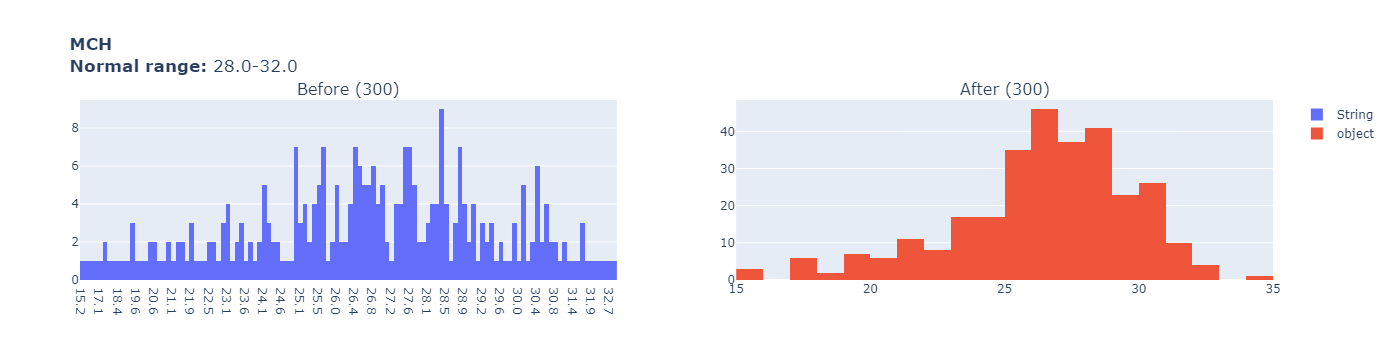

In [460]:
normal_range = '28.0-32.0'
before_data = lab_df.loc[lab_df['labItemsNameRef'] == lab_name]
after_data = selected_lab_df.loc[selected_lab_df['labItemsNameRef'] == lab_name]

histogram_before_after(lab_name, 
                       normal_range, before_data,after_data)
                       

### Urine Ketone

#### Before

In [461]:
lab_name = 'Urine Ketone'
selected_lab_df.loc[selected_lab_df['labItemsNameRef'] == lab_name]

,rowID,cid,labItemsNameRef,labItemsNormalValueRef,labOrderResult,labItemsUnit
84,2981059.0,8af6c5ce961d556794ddc691089f3887fe0b8167eef188...,Urine Ketone,Negative,Negative,
104,888917.0,4898d581bde0e3216c15662327cd301286670cd12786f6...,Urine Ketone,,Negative,Test
179,4680522.0,9fb79d9d7c7e0d536213f063a061707fb599d775fa6087...,Urine Ketone,,3,+
242,2269053.0,ccc731dacaa44da723a1c9f863091e53de77b9891b0e17...,Urine Ketone,Negative,Negative,
282,312651.0,4772ebad086869522b97f1a5ce290b066e8e464e538fc0...,Urine Ketone,0.00 - 0.00,Negative,
...,...,...,...,...,...,...
13460,2431873.0,b6c83a611fbe7e2b69c13b09108bfecbc9924700f99278...,Urine Ketone,Negative,NEGATIVE,
13502,2146005.0,1d60209df9b0437f25613530f9414481912d14c3de4607...,Urine Ketone,Negative,Trace,
13551,3873437.0,bafa3aa41b99714d9a92bf444a1771c3116540cab1d238...,Urine Ketone,Negative,Negative,
13570,1466704.0,0d62ccf972e7c7562ebedc8014f7c76c00cbe9908869be...,Urine Ketone,,Negative,Test


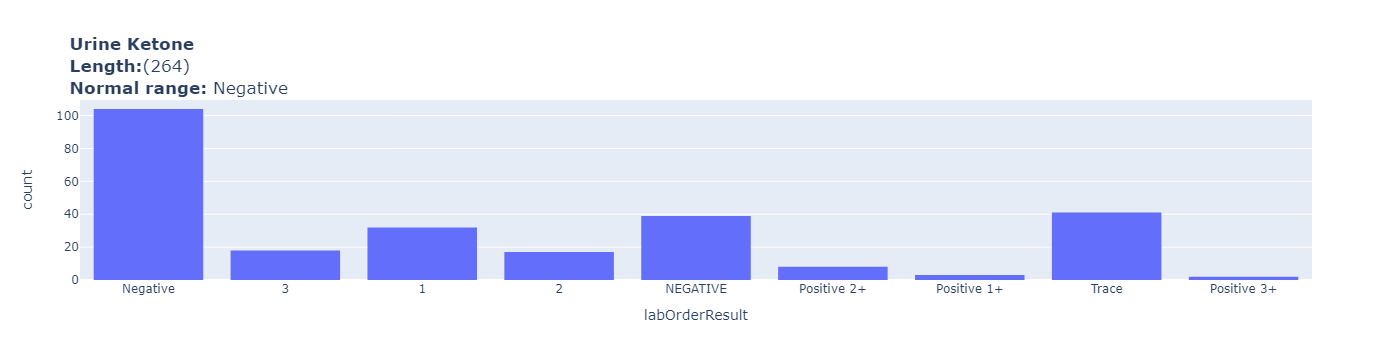

In [462]:
df = selected_lab_df.loc[selected_lab_df['labItemsNameRef'] == lab_name]
df_len = df.shape[0]

normal_range = 'Negative'
fig1 = px.histogram(data_frame = df,x = "labOrderResult",title=f'<b>{lab_name}</b><br><b>Length:</b>({df_len})<br><b>Normal range:</b> {normal_range}')
fig1.show()

#### labItemsNormalValueRef

In [463]:
selected_lab_df.loc[selected_lab_df['labItemsNameRef'] == lab_name,'labItemsNormalValueRef'].value_counts()

Negative       125
               113
Negative -      24
0.00 - 0.00      2
Name: labItemsNormalValueRef, dtype: int64

In [464]:
selected_lab_df.loc[(selected_lab_df['labItemsNameRef'] == lab_name) & (selected_lab_df['labItemsNormalValueRef'] == '')]

,rowID,cid,labItemsNameRef,labItemsNormalValueRef,labOrderResult,labItemsUnit
104,888917.0,4898d581bde0e3216c15662327cd301286670cd12786f6...,Urine Ketone,,Negative,Test
179,4680522.0,9fb79d9d7c7e0d536213f063a061707fb599d775fa6087...,Urine Ketone,,3,+
414,5470047.0,7e56863e5edfb511962c64dda46fb0547f1fdf26120f08...,Urine Ketone,,Negative,
478,900014.0,5a43fd97483508f29394031872ec22890bccf0ac6e7542...,Urine Ketone,,Negative,Test
514,3932619.0,ea58e1f3633dca15e59f24d7c1448f3c693939f36407ec...,Urine Ketone,,1,+
...,...,...,...,...,...,...
13069,3954025.0,020b8aa0ec834b3b7fa2b6880297652896b633b0f91097...,Urine Ketone,,Negative,
13104,5444507.0,1bd32910c8ec0ac96f4d23eb4d406e0d0fb41b84086fae...,Urine Ketone,,Negative,
13400,4382661.0,3f3701e8bcda639e00bee3966b726182cdd8cfb37b0883...,Urine Ketone,,Negative,Test
13570,1466704.0,0d62ccf972e7c7562ebedc8014f7c76c00cbe9908869be...,Urine Ketone,,Negative,Test


#### labItemsUnit

In [465]:
selected_lab_df.loc[selected_lab_df['labItemsNameRef'] == lab_name,'labItemsUnit'].value_counts()

        145
+        67
Test     52
Name: labItemsUnit, dtype: int64

In [466]:
selected_lab_df.loc[(selected_lab_df['labItemsNameRef'] == lab_name) & (selected_lab_df['labItemsUnit'] == '')]

,rowID,cid,labItemsNameRef,labItemsNormalValueRef,labOrderResult,labItemsUnit
84,2981059.0,8af6c5ce961d556794ddc691089f3887fe0b8167eef188...,Urine Ketone,Negative,Negative,
242,2269053.0,ccc731dacaa44da723a1c9f863091e53de77b9891b0e17...,Urine Ketone,Negative,Negative,
282,312651.0,4772ebad086869522b97f1a5ce290b066e8e464e538fc0...,Urine Ketone,0.00 - 0.00,Negative,
304,135663.0,ab1b3e37fefa842f7c0845835d243911cbd56b79e6447a...,Urine Ketone,Negative -,Negative,
414,5470047.0,7e56863e5edfb511962c64dda46fb0547f1fdf26120f08...,Urine Ketone,,Negative,
...,...,...,...,...,...,...
13069,3954025.0,020b8aa0ec834b3b7fa2b6880297652896b633b0f91097...,Urine Ketone,,Negative,
13104,5444507.0,1bd32910c8ec0ac96f4d23eb4d406e0d0fb41b84086fae...,Urine Ketone,,Negative,
13460,2431873.0,b6c83a611fbe7e2b69c13b09108bfecbc9924700f99278...,Urine Ketone,Negative,NEGATIVE,
13502,2146005.0,1d60209df9b0437f25613530f9414481912d14c3de4607...,Urine Ketone,Negative,Trace,


In [467]:
selected_lab_df.loc[(selected_lab_df['labItemsNameRef'] == lab_name) & (selected_lab_df['labItemsUnit'] == '+')]

,rowID,cid,labItemsNameRef,labItemsNormalValueRef,labOrderResult,labItemsUnit
179,4680522.0,9fb79d9d7c7e0d536213f063a061707fb599d775fa6087...,Urine Ketone,,3,+
514,3932619.0,ea58e1f3633dca15e59f24d7c1448f3c693939f36407ec...,Urine Ketone,,1,+
603,3728449.0,31281278b18132f1c0c0dbe13748103ec8d0a1869bac38...,Urine Ketone,,2,+
622,1761048.0,b33448647b15053f6c4a935349dc36ba37c8be792c48b2...,Urine Ketone,Negative,1,+
1484,461396.0,ceabc5dab74ec4a5652f738b5d76cbe1bdc3505657a7c5...,Urine Ketone,Negative,1,+
...,...,...,...,...,...,...
13004,3161202.0,b7c79ddc1d62111a8772e7d5212c6a5dbe8af5b224fb86...,Urine Ketone,,2,+
13035,621218.0,bc7e7610bc60769976ae6df2ec336a36d1d5031c7c2b2a...,Urine Ketone,,1,+
13215,915342.0,82dc1fbf1cae6b8c7839a06a16ea4c7aa42b5e08ffe9e0...,Urine Ketone,Negative -,2,+
13268,1265893.0,c8f9a3221febeb643830b04fa92214ed67b5d49877218e...,Urine Ketone,Negative,1,+


In [468]:
selected_lab_df.loc[(selected_lab_df['labItemsNameRef'] == lab_name) & (selected_lab_df['labItemsUnit'] == 'Test')]

,rowID,cid,labItemsNameRef,labItemsNormalValueRef,labOrderResult,labItemsUnit
104,888917.0,4898d581bde0e3216c15662327cd301286670cd12786f6...,Urine Ketone,,Negative,Test
478,900014.0,5a43fd97483508f29394031872ec22890bccf0ac6e7542...,Urine Ketone,,Negative,Test
1218,1782647.0,28374e7b0a9b7505d53004cee95d1c893c60f0270421c5...,Urine Ketone,,Negative,Test
1414,5128922.0,346a4f00a2b1b026f22925d83e7eda1f35e148f0c9110c...,Urine Ketone,,Negative,Test
1627,4194081.0,5acc4b2f137b01bb6cb8cdd21d13c0b12be5a58c191be7...,Urine Ketone,,Negative,Test
1863,53683.0,6416dfdf18c3ab81772e97f93cf9eba08a7466f079a831...,Urine Ketone,,Negative,Test
2340,1809531.0,c88aeaf0f31466fd95747c4e1fdfeda11c191ebabc9d0b...,Urine Ketone,,Trace,Test
2373,5558026.0,706a1c84aaad981230229bce34333ba56e6101086e6946...,Urine Ketone,,Negative,Test
2573,5144820.0,384b3dc5f668226e6112e616d861f226de5f201b3c26d9...,Urine Ketone,,Negative,Test
2651,3771679.0,b69c8b33b2ac767c440e9f3b812c5c2e33e4c65bed9ce7...,Urine Ketone,,Negative,Test


#### labOrderResult

In [469]:
selected_lab_df.loc[selected_lab_df['labItemsNameRef'] == lab_name,'labOrderResult'].value_counts()

Negative       104
Trace           41
NEGATIVE        39
1               32
3               18
2               17
Positive 2+      8
Positive 1+      3
Positive 3+      2
Name: labOrderResult, dtype: int64

In [470]:
def clean_Urine_Ketone_labOrderResult(x):
    negs = ['negative','not seen','not found']
    if x.lower() in negs:
        return 'Negative'
    elif x.lower() == 'trace':
        return 'trace'
    elif x.isnumeric():
        a = re.search(r'\d+', x).group()
        return f'Positive {a}+'
    else:
        return x

In [471]:
selected_lab_df.loc[selected_lab_df['labItemsNameRef'] == lab_name,'labOrderResult'].value_counts()

Negative       104
Trace           41
NEGATIVE        39
1               32
3               18
2               17
Positive 2+      8
Positive 1+      3
Positive 3+      2
Name: labOrderResult, dtype: int64

In [472]:
selected_lab_df.loc[selected_lab_df['labItemsNameRef'] == 'Urine Ketone','labOrderResult'] = selected_lab_df.loc[selected_lab_df['labItemsNameRef'] == 'Urine Ketone','labOrderResult'].apply(clean_Urine_Ketone_labOrderResult)

In [473]:
selected_lab_df.loc[selected_lab_df['labItemsNameRef'] == lab_name,'labOrderResult'].value_counts()

Negative       143
trace           41
Positive 1+     35
Positive 2+     25
Positive 3+     20
Name: labOrderResult, dtype: int64

In [474]:
selected_lab_df.loc[selected_lab_df['labItemsNameRef'] == lab_name,'labItemsUnit'].value_counts()

        145
+        67
Test     52
Name: labItemsUnit, dtype: int64

In [475]:
selected_lab_df.loc[selected_lab_df['labItemsNameRef'] == 'Urine Ketone','labItemsUnit'] = '+'

In [476]:
selected_lab_df.loc[selected_lab_df['labItemsNameRef'] == lab_name,'labItemsUnit'].value_counts()

+    264
Name: labItemsUnit, dtype: int64

In [477]:
selected_lab_df.loc[selected_lab_df['labItemsNameRef'] == lab_name,'labItemsNormalValueRef'].value_counts()

Negative       125
               113
Negative -      24
0.00 - 0.00      2
Name: labItemsNormalValueRef, dtype: int64

In [478]:
selected_lab_df.loc[selected_lab_df['labItemsNameRef'] == 'Urine Ketone','labItemsNormalValueRef'] = 'Negative'

In [479]:
selected_lab_df.loc[selected_lab_df['labItemsNameRef'] == lab_name,'labItemsNormalValueRef'].value_counts()

Negative    264
Name: labItemsNormalValueRef, dtype: int64

#### After 

In [480]:
selected_lab_df.loc[selected_lab_df['labItemsNameRef'] == 'Urine Ketone']

,rowID,cid,labItemsNameRef,labItemsNormalValueRef,labOrderResult,labItemsUnit
84,2981059.0,8af6c5ce961d556794ddc691089f3887fe0b8167eef188...,Urine Ketone,Negative,Negative,+
104,888917.0,4898d581bde0e3216c15662327cd301286670cd12786f6...,Urine Ketone,Negative,Negative,+
179,4680522.0,9fb79d9d7c7e0d536213f063a061707fb599d775fa6087...,Urine Ketone,Negative,Positive 3+,+
242,2269053.0,ccc731dacaa44da723a1c9f863091e53de77b9891b0e17...,Urine Ketone,Negative,Negative,+
282,312651.0,4772ebad086869522b97f1a5ce290b066e8e464e538fc0...,Urine Ketone,Negative,Negative,+
...,...,...,...,...,...,...
13460,2431873.0,b6c83a611fbe7e2b69c13b09108bfecbc9924700f99278...,Urine Ketone,Negative,Negative,+
13502,2146005.0,1d60209df9b0437f25613530f9414481912d14c3de4607...,Urine Ketone,Negative,trace,+
13551,3873437.0,bafa3aa41b99714d9a92bf444a1771c3116540cab1d238...,Urine Ketone,Negative,Negative,+
13570,1466704.0,0d62ccf972e7c7562ebedc8014f7c76c00cbe9908869be...,Urine Ketone,Negative,Negative,+


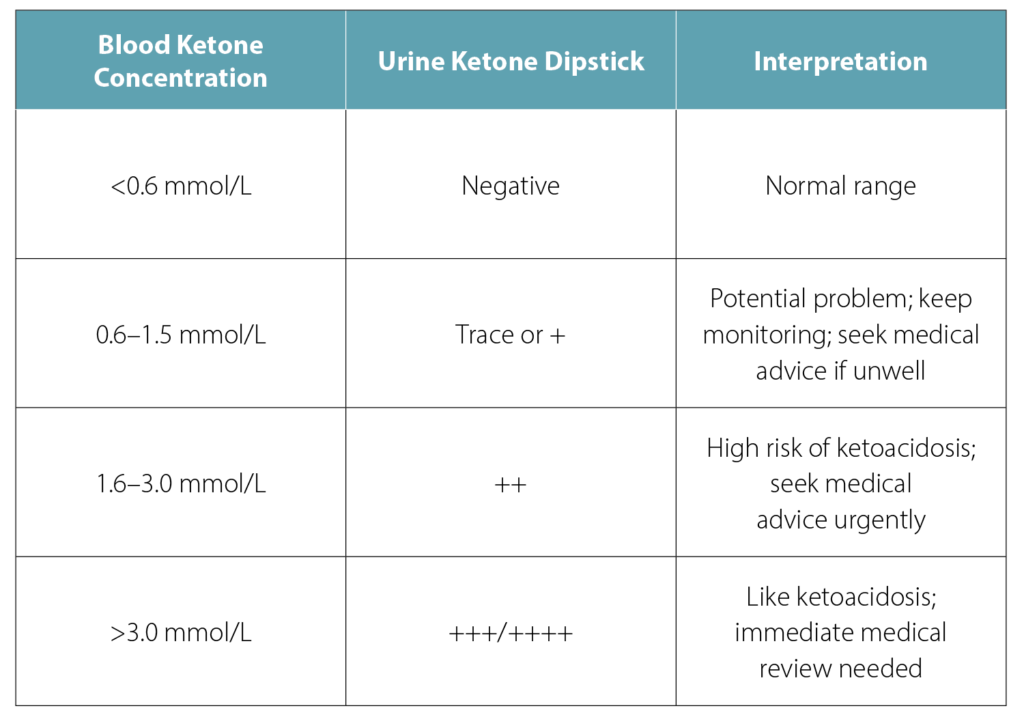
> https://childrenwithdiabetes.com/clinical-director/monitoring-and-treating-ketones-with-t1d/
- Negative
- Trace
- Positive 1+ (1, Positive 1+)
- Positive 2+ (2, Positive 2+)
- Positive 3+ (3, Positive 3+)

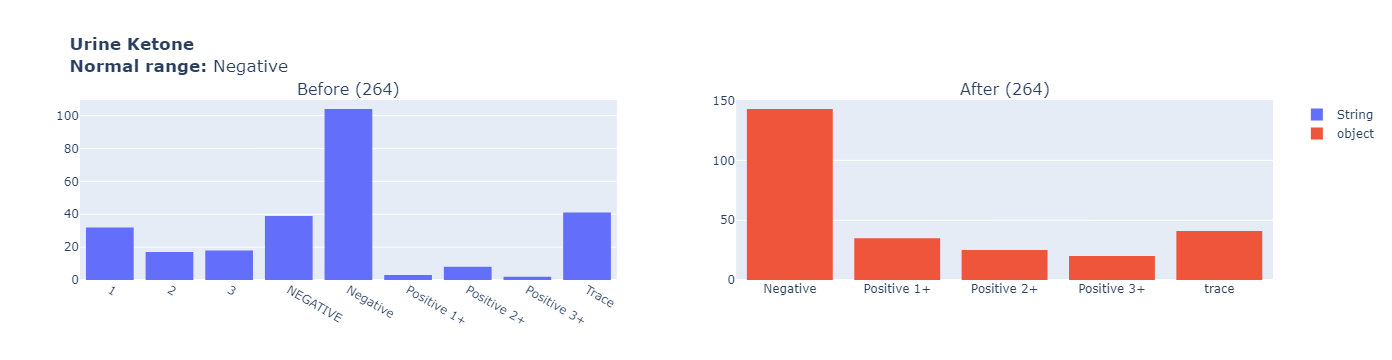

In [481]:
normal_range = 'Negative'
before_data = lab_df.loc[lab_df['labItemsNameRef'] == 'Urine Ketone']
after_data = selected_lab_df.loc[selected_lab_df['labItemsNameRef'] == 'Urine Ketone']

histogram_before_after('Urine Ketone', 
                       normal_range, before_data,after_data)

### MCHC

#### Before

In [482]:
lab_name = 'MCHC'
selected_lab_df.loc[selected_lab_df['labItemsNameRef'] == lab_name]

,rowID,cid,labItemsNameRef,labItemsNormalValueRef,labOrderResult,labItemsUnit
19,601443.0,a4d3ae6322bcc001916821c27ea51fc0983e232f8bf6f7...,MCHC,32.0 - 36.0,32.7,g/dL
62,2981059.0,8af6c5ce961d556794ddc691089f3887fe0b8167eef188...,MCHC,32.0 - 36.0,32.8,g/dl
161,4680522.0,9fb79d9d7c7e0d536213f063a061707fb599d775fa6087...,MCHC,32.1 - 35.1,31.7,g/dL
199,4232190.0,4afad1a7d8762d31af4ee806869a2838a7644b2155e0be...,MCHC,32.0 - 36.0,33.2,g/dl
220,2269053.0,ccc731dacaa44da723a1c9f863091e53de77b9891b0e17...,MCHC,32.0 - 36.0,32.6,g/dl
...,...,...,...,...,...,...
13297,5837249.0,70b964b86cd1f919d587af16dc1958f2bccf4f7449bd9a...,MCHC,32.0 - 36.0,32.6,g/dl
13323,1681555.0,5847c94f0238227268ea5502d80316eb01128fa37285b2...,MCHC,32.0 - 36.0,34.0,
13439,2431873.0,b6c83a611fbe7e2b69c13b09108bfecbc9924700f99278...,MCHC,31.00 - 35.00,30.8,
13480,2146005.0,1d60209df9b0437f25613530f9414481912d14c3de4607...,MCHC,32.0 - 36.0,32.7,g/dl


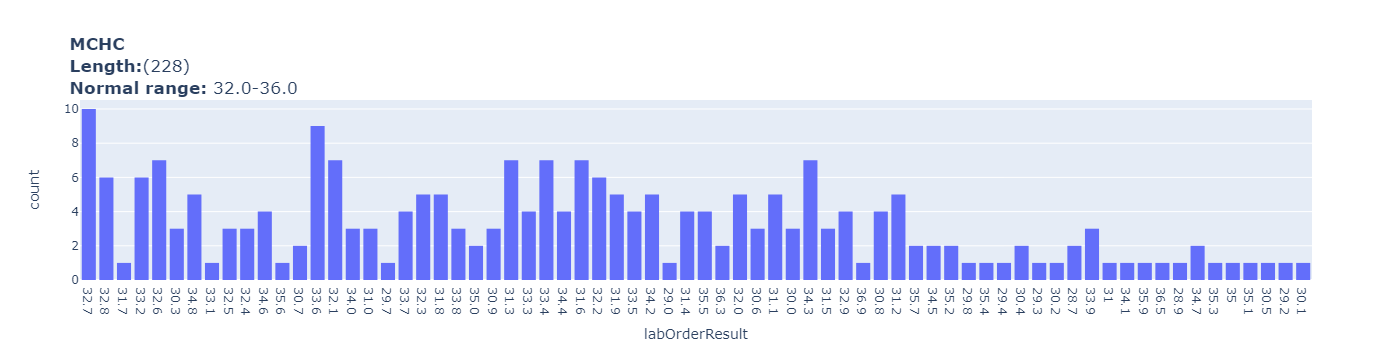

In [483]:
df = selected_lab_df.loc[selected_lab_df['labItemsNameRef'] == lab_name]
df_len = df.shape[0]

normal_range = '32.0-36.0'
fig1 = px.histogram(data_frame = df,x = "labOrderResult",title=f'<b>{lab_name}</b><br><b>Length:</b>({df_len})<br><b>Normal range:</b> {normal_range}')
fig1.show()

#### labItemsNormalValueRef

In [484]:
selected_lab_df.loc[selected_lab_df['labItemsNameRef'] == 'MCHC','labItemsNormalValueRef'].value_counts()

32.0 - 36.0      65
32.00 - 36.00    46
32.1 - 35.1      45
31.00 - 35.00    21
31.0-35.0        14
31.0 - 35.0      13
31.00 - 37.00    12
31.0 - 37.0       8
31 - 35           4
Name: labItemsNormalValueRef, dtype: int64

#### labItemsUnit

In [485]:
selected_lab_df.loc[selected_lab_df['labItemsNameRef'] == 'MCHC','labItemsUnit'].value_counts()

         97
 g/dL    80
 g/dl    51
Name: labItemsUnit, dtype: int64

In [486]:
selected_lab_df.loc[selected_lab_df['labItemsNameRef'] == 'MCHC','labItemsUnit'] = 'g/dL'

In [487]:
selected_lab_df.loc[selected_lab_df['labItemsNameRef'] == 'MCHC','labItemsUnit'].value_counts()

g/dL    228
Name: labItemsUnit, dtype: int64

#### labOrderResult

In [488]:
selected_lab_df.loc[selected_lab_df['labItemsNameRef'] == 'MCHC','labOrderResult'].unique()

array(['32.7', '32.8', '31.7', '33.2', '32.6', '30.3', '34.8', '33.1',
       '32.5', '32.4', '34.6', '35.6', '30.7', '33.6', '32.1', '34.0',
       '31.0', '29.7', '33.7', '32.3', '31.8', '33.8', '35.0', '30.9',
       '31.3', '33.3', '33.4', '34.4', '31.6', '32.2', '31.9', '33.5',
       '34.2', '29.0', '31.4', '35.5', '36.3', '32.0', '30.6', '31.1',
       '30.0', '34.3', '31.5', '32.9', '36.9', '30.8', '31.2', '35.7',
       '34.5', '35.2', '29.8', '35.4', '29.4', '30.4', '29.3', '30.2',
       '28.7', '33.9', '31', '34.1', '35.9', '36.5', '28.9', '34.7',
       '35.3', '35', '35.1', '30.5', '29.2', '30.1'], dtype=object)

In [489]:
selected_lab_df.loc[selected_lab_df['labItemsNameRef'] == 'MCHC','labOrderResult'] = selected_lab_df.loc[selected_lab_df['labItemsNameRef'] == 'MCHC','labOrderResult'].astype(float)

#### After 

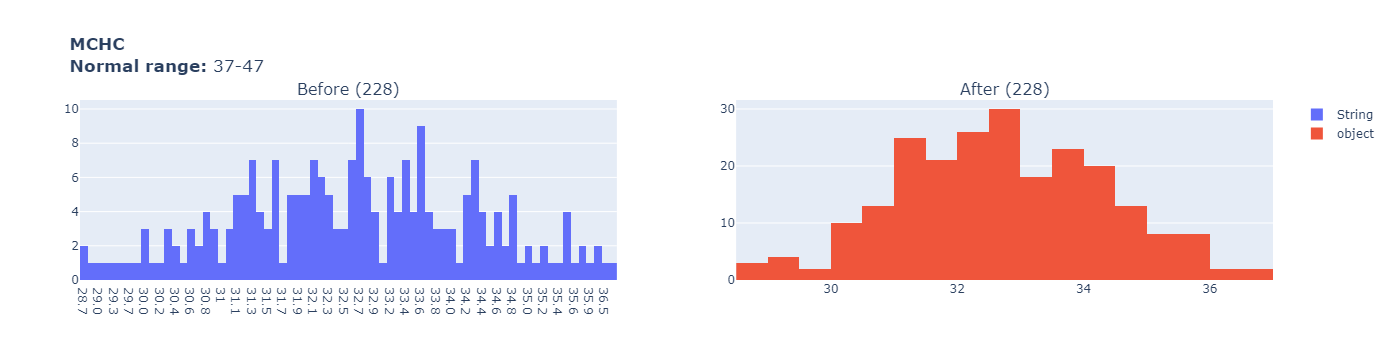

In [490]:
normal_range = '37-47'
before_data = lab_df.loc[lab_df['labItemsNameRef'] == lab_name]
after_data = selected_lab_df.loc[selected_lab_df['labItemsNameRef'] == lab_name]

histogram_before_after(lab_name, 
                       normal_range, before_data,after_data)

### Urine Bilirubin

In [491]:
lab_name = 'Urine Bilirubin'
selected_lab_df.loc[selected_lab_df['labItemsNameRef'] == lab_name]

,rowID,cid,labItemsNameRef,labItemsNormalValueRef,labOrderResult,labItemsUnit
83,2981059.0,8af6c5ce961d556794ddc691089f3887fe0b8167eef188...,Urine Bilirubin,Negative,Negative,
105,888917.0,4898d581bde0e3216c15662327cd301286670cd12786f6...,Urine Bilirubin,,Negative,
241,2269053.0,ccc731dacaa44da723a1c9f863091e53de77b9891b0e17...,Urine Bilirubin,Negative,Negative,
281,312651.0,4772ebad086869522b97f1a5ce290b066e8e464e538fc0...,Urine Bilirubin,0.00 - 0.00,Negative,
303,135663.0,ab1b3e37fefa842f7c0845835d243911cbd56b79e6447a...,Urine Bilirubin,Negative -,Negative,
...,...,...,...,...,...,...
13459,2431873.0,b6c83a611fbe7e2b69c13b09108bfecbc9924700f99278...,Urine Bilirubin,Negative,NEGATIVE,
13501,2146005.0,1d60209df9b0437f25613530f9414481912d14c3de4607...,Urine Bilirubin,Negative,Negative,
13550,3873437.0,bafa3aa41b99714d9a92bf444a1771c3116540cab1d238...,Urine Bilirubin,Negative,Negative,
13571,1466704.0,0d62ccf972e7c7562ebedc8014f7c76c00cbe9908869be...,Urine Bilirubin,,Negative,


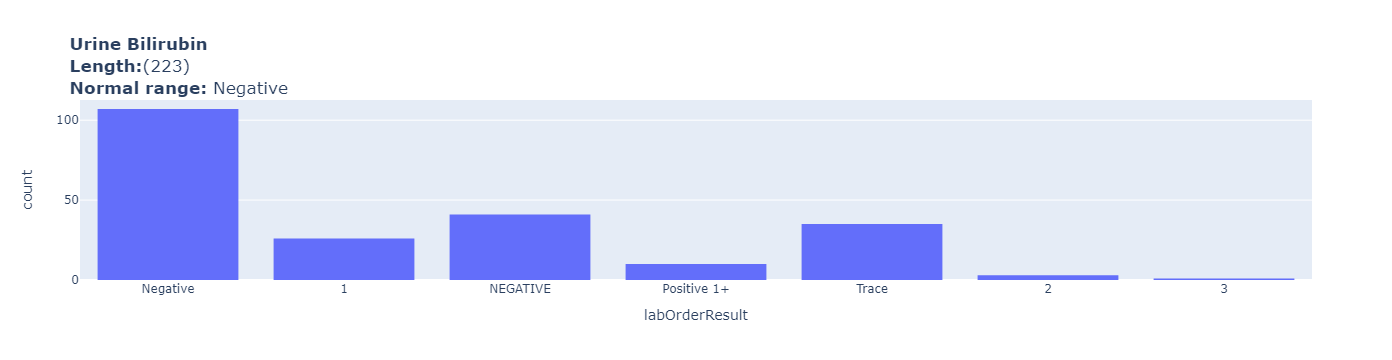

In [492]:
df = selected_lab_df.loc[selected_lab_df['labItemsNameRef'] == lab_name]
df_len = df.shape[0]

normal_range = 'Negative'
fig1 = px.histogram(data_frame = df,x = "labOrderResult",title=f'<b>{lab_name}</b><br><b>Length:</b>({df_len})<br><b>Normal range:</b> {normal_range}')
fig1.show()

#### labItemsNormalValueRef

In [493]:
selected_lab_df.loc[selected_lab_df['labItemsNameRef'] == 'Urine Bilirubin','labItemsNormalValueRef'].value_counts()

Negative       125
                72
Negative -      24
0.00 - 0.00      2
Name: labItemsNormalValueRef, dtype: int64

#### labItemsUnit

In [494]:
selected_lab_df.loc[selected_lab_df['labItemsNameRef'] == 'Urine Bilirubin','labItemsUnit'].value_counts()

     193
+     30
Name: labItemsUnit, dtype: int64

#### labOrderResult

In [495]:
selected_lab_df.loc[selected_lab_df['labItemsNameRef'] == 'Urine Bilirubin','labOrderResult'].value_counts()

Negative       107
NEGATIVE        41
Trace           35
1               26
Positive 1+     10
2                3
3                1
Name: labOrderResult, dtype: int64

In [496]:
def clean_Urine_Bilirubin_labOrderResult(x):
    negs = ['negative','not seen','not found']
    if x.lower() in negs:
        return 'Negative'
    elif x.lower() == 'trace':
        return 'trace'
    elif x.isnumeric():
        a = re.search(r'\d+', x).group()
        return f'Positive {a}+'
    else:
        return x

In [497]:
selected_lab_df.loc[selected_lab_df['labItemsNameRef'] == 'Urine Bilirubin','labOrderResult'] = selected_lab_df.loc[selected_lab_df['labItemsNameRef'] == 'Urine Bilirubin','labOrderResult'].apply(clean_Urine_Bilirubin_labOrderResult)

In [498]:
selected_lab_df.loc[selected_lab_df['labItemsNameRef'] == 'Urine Bilirubin','labOrderResult'].value_counts()

Negative       148
Positive 1+     36
trace           35
Positive 2+      3
Positive 3+      1
Name: labOrderResult, dtype: int64

#### After

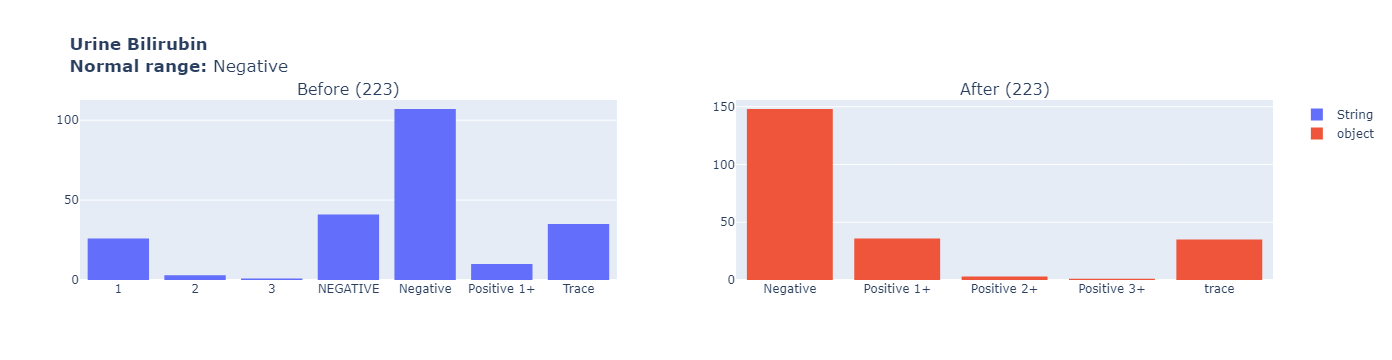

In [499]:
normal_range = 'Negative'
before_data = lab_df.loc[lab_df['labItemsNameRef'] == lab_name]
after_data = selected_lab_df.loc[selected_lab_df['labItemsNameRef'] == lab_name]

histogram_before_after(lab_name, 
                       normal_range, before_data,after_data)

### Neutrophil

In [500]:
lab_name = 'Neutrophil'
selected_lab_df.loc[selected_lab_df['labItemsNameRef'] == lab_name]

,rowID,cid,labItemsNameRef,labItemsNormalValueRef,labOrderResult,labItemsUnit
11,601443.0,a4d3ae6322bcc001916821c27ea51fc0983e232f8bf6f7...,Neutrophil,37.0 - 72.0,88.7,%
53,2981059.0,8af6c5ce961d556794ddc691089f3887fe0b8167eef188...,Neutrophil,50 - 70,75.4,%
97,888917.0,4898d581bde0e3216c15662327cd301286670cd12786f6...,Neutrophil,60 - 75,69.3,%
153,4680522.0,9fb79d9d7c7e0d536213f063a061707fb599d775fa6087...,Neutrophil,45 - 70,85,%
190,4232190.0,4afad1a7d8762d31af4ee806869a2838a7644b2155e0be...,Neutrophil,50 - 70,54.4,%
...,...,...,...,...,...,...
13393,4382661.0,3f3701e8bcda639e00bee3966b726182cdd8cfb37b0883...,Neutrophil,60 - 75,79.7,%
13471,2146005.0,1d60209df9b0437f25613530f9414481912d14c3de4607...,Neutrophil,50 - 70,88.5,%
13512,3873437.0,bafa3aa41b99714d9a92bf444a1771c3116540cab1d238...,Neutrophil,50 - 70,48.9,%
13563,1466704.0,0d62ccf972e7c7562ebedc8014f7c76c00cbe9908869be...,Neutrophil,60 - 75,72.8,%


#### Before

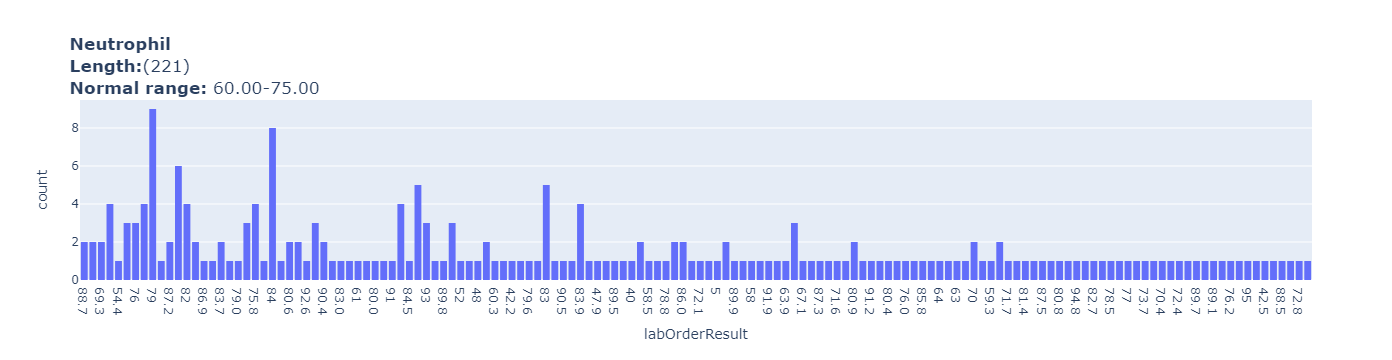

In [501]:
df = selected_lab_df.loc[selected_lab_df['labItemsNameRef'] == lab_name]
df_len = df.shape[0]

normal_range = '60.00-75.00'
fig1 = px.histogram(data_frame = df,x = "labOrderResult",title=f'<b>{lab_name}</b><br><b>Length:</b>({df_len})<br><b>Normal range:</b> {normal_range}')
fig1.show()

#### labItemsNormalValueRef

In [502]:
selected_lab_df.loc[selected_lab_df['labItemsNameRef'] == 'Neutrophil','labItemsNormalValueRef'].value_counts()

60 - 75        72
50 - 70        51
45 - 70        44
40 - 75        15
40-75          14
40 - 70        13
37.0 - 72.0     9
37.0-72.0       2
%               1
Name: labItemsNormalValueRef, dtype: int64

#### labItemsUnit

In [503]:
selected_lab_df.loc[selected_lab_df['labItemsNameRef'] == 'Neutrophil','labItemsUnit'].value_counts()

 %    203
       18
Name: labItemsUnit, dtype: int64

In [504]:
selected_lab_df.loc[(selected_lab_df['labItemsNameRef'] == lab_name) & (selected_lab_df['labItemsUnit'] == '')]

,rowID,cid,labItemsNameRef,labItemsNormalValueRef,labOrderResult,labItemsUnit
1348,3519460.0,3ed01761668230ce0abdc0020ff5af04b7b504fd50b6f6...,Neutrophil,40 - 70,90,
1584,959952.0,20298e2d56e2d0463037b7b3e524584a03c3d28807a76b...,Neutrophil,40 - 70,79,
2504,1995641.0,e6a0c9e3461a5e399f8811891237d8447adc3e01adefab...,Neutrophil,40 - 70,61,
3010,6173503.0,48457248683edcbe159eaff6657c363a3f86d85d9af43c...,Neutrophil,40 - 75,80,
3051,6187473.0,4a7d47ad35d6ab30af9b01875ea6f373fd68fb99b3aba3...,Neutrophil,40 - 75,89,
3369,1924631.0,befd94d9968fd3ddbe7298ab4f19c08be40e540e884c49...,Neutrophil,40 - 70,78,
4132,3547006.0,8a757814b7aa83c047b398e2111229666553889760007e...,Neutrophil,40 - 70,93,
4788,2771169.0,6eff7b259a7905b716ad52a12be56ac9df47e49d516135...,Neutrophil,40 - 70,79,
6221,1957930.0,1d3ef535981787b034891e24bc2165d8b9e051db992d6f...,Neutrophil,%,5,
7610,958768.0,d22a965a3b7907afc58b77313e15697b929f36376c213b...,Neutrophil,40 - 70,83,


In [505]:
selected_lab_df.loc[selected_lab_df['labItemsNameRef'] == 'Neutrophil','labItemsUnit'] = '%'

In [506]:
selected_lab_df.loc[selected_lab_df['labItemsNameRef'] == 'Neutrophil','labItemsUnit'].value_counts()

%    221
Name: labItemsUnit, dtype: int64

In [507]:
selected_lab_df.loc[selected_lab_df['labItemsNameRef'] == 'Neutrophil','labItemsNormalValueRef'].value_counts()

60 - 75        72
50 - 70        51
45 - 70        44
40 - 75        15
40-75          14
40 - 70        13
37.0 - 72.0     9
37.0-72.0       2
%               1
Name: labItemsNormalValueRef, dtype: int64

In [508]:
selected_lab_df.loc[selected_lab_df['labItemsNameRef'] == 'Neutrophil','labItemsNormalValueRef'] = '60.00-75.00'

In [509]:
selected_lab_df.loc[selected_lab_df['labItemsNameRef'] == 'Neutrophil','labItemsNormalValueRef'].value_counts()

60.00-75.00    221
Name: labItemsNormalValueRef, dtype: int64

#### labOrderResult

In [510]:
selected_lab_df.loc[selected_lab_df['labItemsNameRef'] == 'Neutrophil','labOrderResult'].unique()

array(['88.7', '75.4', '69.3', '85', '54.4', '82.1', '76', '89', '79',
       '78.3', '87.2', '88', '82', '89.6', '86.9', '85.7', '83.7', '71',
       '79.0', '90', '75.8', '62.0', '84', '75.5', '80.6', '81.8', '92.6',
       '86', '90.4', '85.4', '83.0', '92.5', '61', '55.2', '80.0', '65.7',
       '91', '81', '84.5', '80', '93', '83.3', '89.8', '78', '52', '81.6',
       '48', '90.1', '60.3', '72.7', '42.2', '89.3', '79.6', '54.3', '83',
       '39.8', '90.5', '78.0', '83.9', '90.2', '47.9', '79.9', '89.5',
       '88.8', '40', '86.3', '58.5', '62', '78.8', '66', '86.0', '87.1',
       '72.1', '71.9', '5', '75', '89.9', '88.6', '58', '51.9', '91.9',
       '84.3', '63.9', '81.1', '67.1', '85.0', '87.3', '84.2', '71.6',
       '57.3', '80.9', '57.6', '91.2', '88.2', '80.4', '81.3', '76.0',
       '74.4', '85.8', '84.4', '64', '79.4', '63', '84.0', '70', '92',
       '59.3', '87', '71.7', '73', '81.4', '61.6', '87.5', '87.6', '80.8',
       '87.7', '94.8', '82.9', '82.7', '84.8', '78.5

In [511]:
selected_lab_df.loc[(selected_lab_df['labItemsNameRef'] == 'Neutrophil') & (selected_lab_df['labOrderResult'] == '5')]

,rowID,cid,labItemsNameRef,labItemsNormalValueRef,labOrderResult,labItemsUnit
6221,1957930.0,1d3ef535981787b034891e24bc2165d8b9e051db992d6f...,Neutrophil,60.00-75.00,5,%


In [512]:
selected_lab_df.loc[selected_lab_df['labItemsNameRef'] == 'Neutrophil','labOrderResult'] = selected_lab_df.loc[selected_lab_df['labItemsNameRef'] == 'Neutrophil','labOrderResult'].astype(float)

labOrderResult less than 10 %

#### After

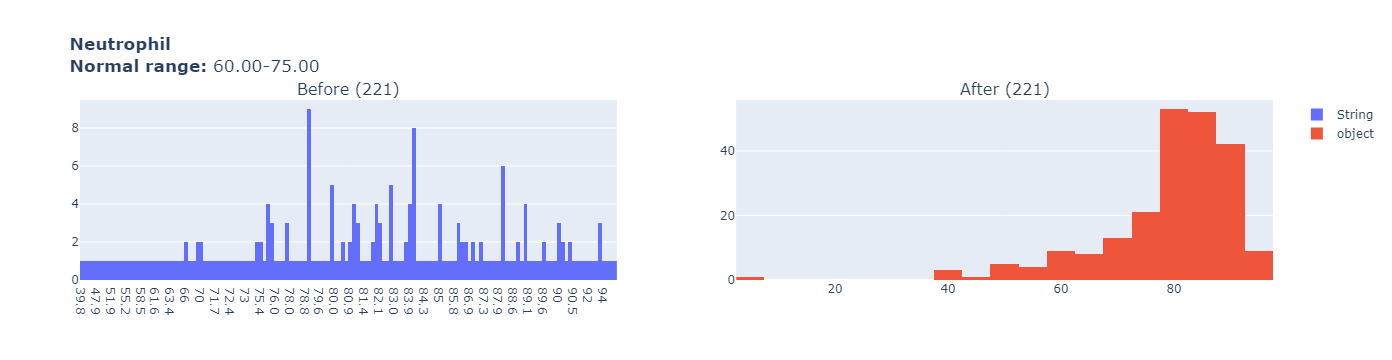

In [513]:

before_data = lab_df.loc[lab_df['labItemsNameRef'] == lab_name]
after_data = selected_lab_df.loc[selected_lab_df['labItemsNameRef'] == lab_name]

histogram_before_after(lab_name, 
                       normal_range, before_data,after_data)

### Lymphocytes

#### Before

In [514]:
selected_lab_df.loc[selected_lab_df['labItemsNameRef'] == 'Lymphocytes']

,rowID,cid,labItemsNameRef,labItemsNormalValueRef,labOrderResult,labItemsUnit
12,601443.0,a4d3ae6322bcc001916821c27ea51fc0983e232f8bf6f7...,Lymphocytes,20.0 - 50.0,6.5,%
54,2981059.0,8af6c5ce961d556794ddc691089f3887fe0b8167eef188...,Lymphocytes,20 - 40,18.2,%
99,888917.0,4898d581bde0e3216c15662327cd301286670cd12786f6...,Lymphocytes,25 - 40,25.3,%
154,4680522.0,9fb79d9d7c7e0d536213f063a061707fb599d775fa6087...,Lymphocytes,20 - 45,12,%
191,4232190.0,4afad1a7d8762d31af4ee806869a2838a7644b2155e0be...,Lymphocytes,20 - 40,39.6,%
...,...,...,...,...,...,...
13395,4382661.0,3f3701e8bcda639e00bee3966b726182cdd8cfb37b0883...,Lymphocytes,25 - 40,14.0,%
13472,2146005.0,1d60209df9b0437f25613530f9414481912d14c3de4607...,Lymphocytes,20 - 40,6.5,%
13513,3873437.0,bafa3aa41b99714d9a92bf444a1771c3116540cab1d238...,Lymphocytes,20 - 40,45.7,%
13565,1466704.0,0d62ccf972e7c7562ebedc8014f7c76c00cbe9908869be...,Lymphocytes,25 - 40,19.4,%


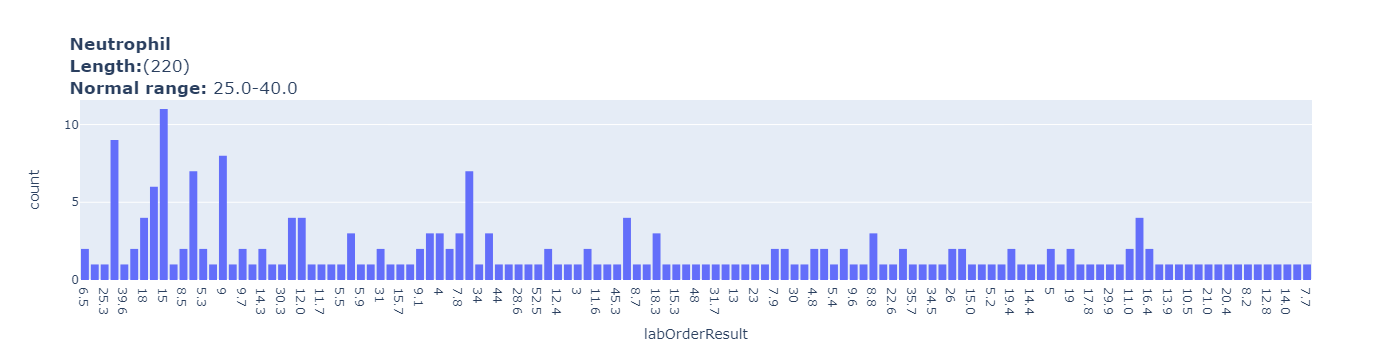

In [515]:
df = selected_lab_df.loc[selected_lab_df['labItemsNameRef'] == 'Lymphocytes']
df_len = df.shape[0]

normal_range = '25.0-40.0'
fig1 = px.histogram(data_frame = df,x = "labOrderResult",title=f'<b>{lab_name}</b><br><b>Length:</b>({df_len})<br><b>Normal range:</b> {normal_range}')
fig1.show()

#### labItemsNormalValueRef

In [516]:
selected_lab_df.loc[selected_lab_df['labItemsNameRef'] == 'Lymphocytes','labItemsNormalValueRef'].value_counts()

25 - 40        72
20 - 40        51
20 - 45        44
20 - 50        15
20-50          14
25 - 55        13
20.0 - 50.0     9
20.0-50.0       2
Name: labItemsNormalValueRef, dtype: int64

#### labItemsUnit

In [517]:
selected_lab_df.loc[selected_lab_df['labItemsNameRef'] == 'Lymphocytes','labItemsUnit'].value_counts()

 %    203
       17
Name: labItemsUnit, dtype: int64

In [518]:
selected_lab_df.loc[(selected_lab_df['labItemsNameRef'] == 'Lymphocytes') & (selected_lab_df['labItemsUnit'] == '')]

,rowID,cid,labItemsNameRef,labItemsNormalValueRef,labOrderResult,labItemsUnit
1349,3519460.0,3ed01761668230ce0abdc0020ff5af04b7b504fd50b6f6...,Lymphocytes,25 - 55,6,
1585,959952.0,20298e2d56e2d0463037b7b3e524584a03c3d28807a76b...,Lymphocytes,25 - 55,15,
2505,1995641.0,e6a0c9e3461a5e399f8811891237d8447adc3e01adefab...,Lymphocytes,25 - 55,31,
3021,6173503.0,48457248683edcbe159eaff6657c363a3f86d85d9af43c...,Lymphocytes,20 - 50,17,
3062,6187473.0,4a7d47ad35d6ab30af9b01875ea6f373fd68fb99b3aba3...,Lymphocytes,20 - 50,6,
3370,1924631.0,befd94d9968fd3ddbe7298ab4f19c08be40e540e884c49...,Lymphocytes,25 - 55,14,
4133,3547006.0,8a757814b7aa83c047b398e2111229666553889760007e...,Lymphocytes,25 - 55,3,
4789,2771169.0,6eff7b259a7905b716ad52a12be56ac9df47e49d516135...,Lymphocytes,25 - 55,9,
7611,958768.0,d22a965a3b7907afc58b77313e15697b929f36376c213b...,Lymphocytes,25 - 55,10,
7668,3814780.0,58ea1a6108b5c047ef1602b26def8b09aaf50a91cd0432...,Lymphocytes,25 - 55,14,


In [519]:
selected_lab_df.loc[selected_lab_df['labItemsNameRef'] == 'Lymphocytes','labItemsUnit'] = '%'

In [520]:
selected_lab_df.loc[selected_lab_df['labItemsNameRef'] == 'Lymphocytes','labItemsUnit'].value_counts()

%    220
Name: labItemsUnit, dtype: int64

In [521]:
selected_lab_df.loc[selected_lab_df['labItemsNameRef'] == 'Lymphocytes','labItemsNormalValueRef'].value_counts()

25 - 40        72
20 - 40        51
20 - 45        44
20 - 50        15
20-50          14
25 - 55        13
20.0 - 50.0     9
20.0-50.0       2
Name: labItemsNormalValueRef, dtype: int64

In [522]:
selected_lab_df.loc[selected_lab_df['labItemsNameRef'] == 'Lymphocytes','labItemsNormalValueRef'] = '25.0-40.0'

In [523]:
selected_lab_df.loc[selected_lab_df['labItemsNameRef'] == 'Lymphocytes','labItemsNormalValueRef'].value_counts()

25.0-40.0    220
Name: labItemsNormalValueRef, dtype: int64

#### labOrderResult

In [524]:
selected_lab_df.loc[selected_lab_df['labItemsNameRef'] == 'Lymphocytes','labOrderResult'].unique()

array(['6.5', '18.2', '25.3', '12', '39.6', '13.3', '18', '7', '15',
       '13.7', '8.5', '6', '5.3', '10.0', '9', '6.4', '9.7', '24', '14.3',
       '18.1', '30.3', '10', '12.0', '15.1', '11.7', '4.7', '5.5', '9.4',
       '5.9', '20.9', '31', '36.5', '15.7', '27.7', '9.1', '17', '4',
       '11.8', '7.8', '14', '34', '13.1', '44', '6.7', '28.6', '20.3',
       '52.5', '7.0', '12.4', '6.2', '3', '8', '11.6', '35.6', '45.3',
       '6.0', '8.7', '11.9', '18.3', '46.1', '15.3', '14.6', '48', '11.4',
       '31.7', '33', '13', '15.6', '23', '8.0', '7.9', '5.0', '30',
       '40.0', '4.8', '12.7', '5.4', '28.2', '9.6', '24.4', '8.8', '10.6',
       '22.6', '21.9', '35.7', '13.5', '34.5', '5.8', '26', '19.6',
       '15.0', '16.7', '5.2', '16', '19.4', '12.6', '14.4', '35', '5',
       '15.4', '19', '25.8', '17.8', '13.8', '29.9', '15.8', '11.0', '11',
       '16.4', '4.9', '13.9', '9.9', '10.5', '22.0', '21.0', '6.1',
       '20.4', '16.0', '8.2', '8.9', '12.8', '47.3', '14.0', '45.7',
 

In [525]:
selected_lab_df.loc[selected_lab_df['labItemsNameRef'] == 'Lymphocytes','labOrderResult'] = selected_lab_df.loc[selected_lab_df['labItemsNameRef'] == 'Lymphocytes','labOrderResult'].astype(float)

In [526]:
selected_lab_df.loc[selected_lab_df['labItemsNameRef'] == 'Lymphocytes']

,rowID,cid,labItemsNameRef,labItemsNormalValueRef,labOrderResult,labItemsUnit
12,601443.0,a4d3ae6322bcc001916821c27ea51fc0983e232f8bf6f7...,Lymphocytes,25.0-40.0,6.5,%
54,2981059.0,8af6c5ce961d556794ddc691089f3887fe0b8167eef188...,Lymphocytes,25.0-40.0,18.2,%
99,888917.0,4898d581bde0e3216c15662327cd301286670cd12786f6...,Lymphocytes,25.0-40.0,25.3,%
154,4680522.0,9fb79d9d7c7e0d536213f063a061707fb599d775fa6087...,Lymphocytes,25.0-40.0,12.0,%
191,4232190.0,4afad1a7d8762d31af4ee806869a2838a7644b2155e0be...,Lymphocytes,25.0-40.0,39.6,%
...,...,...,...,...,...,...
13395,4382661.0,3f3701e8bcda639e00bee3966b726182cdd8cfb37b0883...,Lymphocytes,25.0-40.0,14.0,%
13472,2146005.0,1d60209df9b0437f25613530f9414481912d14c3de4607...,Lymphocytes,25.0-40.0,6.5,%
13513,3873437.0,bafa3aa41b99714d9a92bf444a1771c3116540cab1d238...,Lymphocytes,25.0-40.0,45.7,%
13565,1466704.0,0d62ccf972e7c7562ebedc8014f7c76c00cbe9908869be...,Lymphocytes,25.0-40.0,19.4,%


#### After 

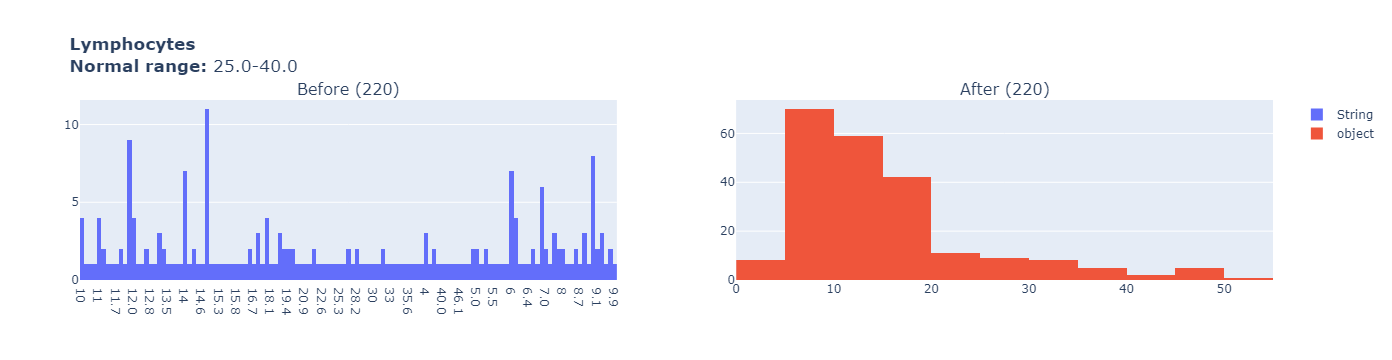

In [527]:

before_data = lab_df.loc[lab_df['labItemsNameRef'] == 'Lymphocytes']
after_data = selected_lab_df.loc[selected_lab_df['labItemsNameRef'] == 'Lymphocytes']

histogram_before_after('Lymphocytes', 
                       normal_range, before_data,after_data)

### Bacteria

#### Before

In [528]:
selected_lab_df.loc[selected_lab_df['labItemsNameRef'] == 'v']

,rowID,cid,labItemsNameRef,labItemsNormalValueRef,labOrderResult,labItemsUnit


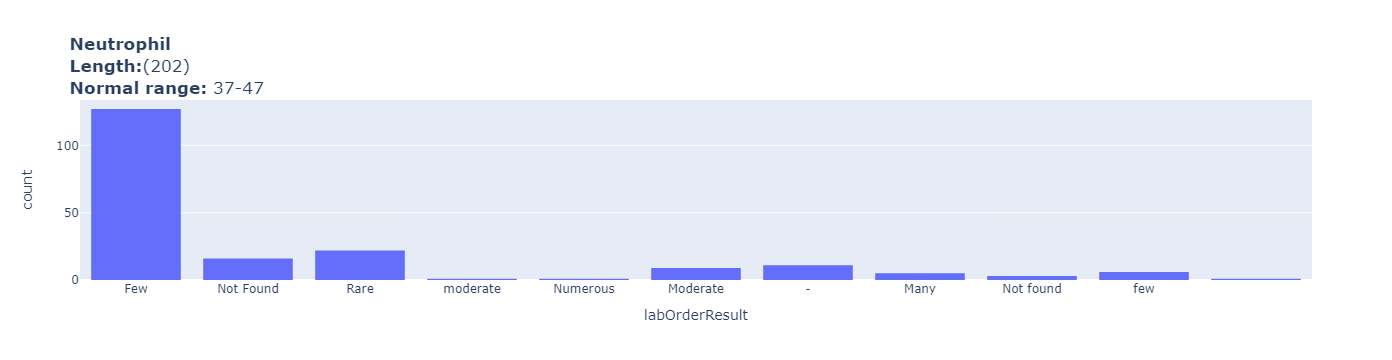

In [529]:
df = selected_lab_df.loc[selected_lab_df['labItemsNameRef'] == 'Bacteria']
df_len = df.shape[0]

normal_range = '37-47'
fig1 = px.histogram(data_frame = df,x = "labOrderResult",title=f'<b>{lab_name}</b><br><b>Length:</b>({df_len})<br><b>Normal range:</b> {normal_range}')
fig1.show()

#### labItemsNormalValueRef

In [530]:
selected_lab_df.loc[selected_lab_df['labItemsNameRef'] == 'Bacteria','labItemsNormalValueRef'].value_counts()

               113
Not found       59
Not Found -     24
Not found -      2
not found        2
Not-Found        2
Name: labItemsNormalValueRef, dtype: int64

In [531]:
selected_lab_df.loc[(selected_lab_df['labItemsNameRef'] == 'Bacteria') & (selected_lab_df['labItemsNormalValueRef'] == '')]

,rowID,cid,labItemsNameRef,labItemsNormalValueRef,labOrderResult,labItemsUnit
108,888917.0,4898d581bde0e3216c15662327cd301286670cd12786f6...,Bacteria,,Few,
171,4680522.0,9fb79d9d7c7e0d536213f063a061707fb599d775fa6087...,Bacteria,,Few,
406,5470047.0,7e56863e5edfb511962c64dda46fb0547f1fdf26120f08...,Bacteria,,Few,
482,900014.0,5a43fd97483508f29394031872ec22890bccf0ac6e7542...,Bacteria,,Few,
518,3932619.0,ea58e1f3633dca15e59f24d7c1448f3c693939f36407ec...,Bacteria,,Few,
...,...,...,...,...,...,...
13062,3954025.0,020b8aa0ec834b3b7fa2b6880297652896b633b0f91097...,Bacteria,,Rare,
13097,5444507.0,1bd32910c8ec0ac96f4d23eb4d406e0d0fb41b84086fae...,Bacteria,,Few,
13405,4382661.0,3f3701e8bcda639e00bee3966b726182cdd8cfb37b0883...,Bacteria,,Few,
13574,1466704.0,0d62ccf972e7c7562ebedc8014f7c76c00cbe9908869be...,Bacteria,,Rare,


#### labItemsUnit

In [532]:
selected_lab_df.loc[selected_lab_df['labItemsNameRef'] == 'Bacteria','labItemsUnit'].value_counts()

            125
/HPF         75
cells/HP      2
Name: labItemsUnit, dtype: int64

In [533]:
selected_lab_df.loc[(selected_lab_df['labItemsNameRef'] == 'Bacteria') & (selected_lab_df['labItemsUnit'] == '')]

,rowID,cid,labItemsNameRef,labItemsNormalValueRef,labOrderResult,labItemsUnit
108,888917.0,4898d581bde0e3216c15662327cd301286670cd12786f6...,Bacteria,,Few,
171,4680522.0,9fb79d9d7c7e0d536213f063a061707fb599d775fa6087...,Bacteria,,Few,
406,5470047.0,7e56863e5edfb511962c64dda46fb0547f1fdf26120f08...,Bacteria,,Few,
482,900014.0,5a43fd97483508f29394031872ec22890bccf0ac6e7542...,Bacteria,,Few,
518,3932619.0,ea58e1f3633dca15e59f24d7c1448f3c693939f36407ec...,Bacteria,,Few,
...,...,...,...,...,...,...
13097,5444507.0,1bd32910c8ec0ac96f4d23eb4d406e0d0fb41b84086fae...,Bacteria,,Few,
13368,1681555.0,5847c94f0238227268ea5502d80316eb01128fa37285b2...,Bacteria,Not found,Rare,
13405,4382661.0,3f3701e8bcda639e00bee3966b726182cdd8cfb37b0883...,Bacteria,,Few,
13574,1466704.0,0d62ccf972e7c7562ebedc8014f7c76c00cbe9908869be...,Bacteria,,Rare,


#### labOrderResult

In [534]:
selected_lab_df.loc[selected_lab_df['labItemsNameRef'] == 'Bacteria','labOrderResult'].value_counts()

Few          127
Rare          22
Not Found     16
-             11
Moderate       9
few            6
Many           5
Not found      3
moderate       1
Numerous       1
               1
Name: labOrderResult, dtype: int64

In [535]:
def clean_Bacteria_labOrderResult(x):
    x = str(x).lower()
    if x in ['not found', '-']:
        return 'not found'
    elif x == 'rare':
        return 'rare'
    elif x == 'few':
        return 'few'
    elif x == 'moderate':
        return 'moderate'
    elif x == 'many':
        return 'many'
    elif x == 'numerous':
        return 'numerous'
    # (Empty value) or (Sth else) or (number)
    else:
        return x

In [536]:
selected_lab_df.loc[selected_lab_df['labItemsNameRef'] == 'Bacteria','labOrderResult'] = selected_lab_df.loc[selected_lab_df['labItemsNameRef'] == 'Bacteria','labOrderResult'].apply(clean_Bacteria_labOrderResult)

In [537]:
selected_lab_df.loc[selected_lab_df['labItemsNameRef'] == 'Bacteria','labOrderResult'].value_counts()

few          133
not found     30
rare          22
moderate      10
many           5
numerous       1
               1
Name: labOrderResult, dtype: int64

In [538]:
selected_lab_df.loc[(selected_lab_df['labItemsNameRef'] == 'Bacteria') & (selected_lab_df['labOrderResult'] == '')]

,rowID,cid,labItemsNameRef,labItemsNormalValueRef,labOrderResult,labItemsUnit
7716,3814780.0,58ea1a6108b5c047ef1602b26def8b09aaf50a91cd0432...,Bacteria,Not found -,,


#### Drop

In [539]:
selected_lab_df.loc[selected_lab_df['labItemsNameRef'] == 'Bacteria'].shape[0]

202

In [540]:
selected_lab_df.loc[selected_lab_df['labItemsNameRef'] == 'Bacteria'] = selected_lab_df.drop(index=selected_lab_df.loc[(selected_lab_df['labItemsNameRef'] == 'Bacteria') & (selected_lab_df['labOrderResult'] == '')].index)

In [541]:
selected_lab_df.loc[selected_lab_df['labItemsNameRef'] == 'Bacteria'].shape[0]

201

#### After 

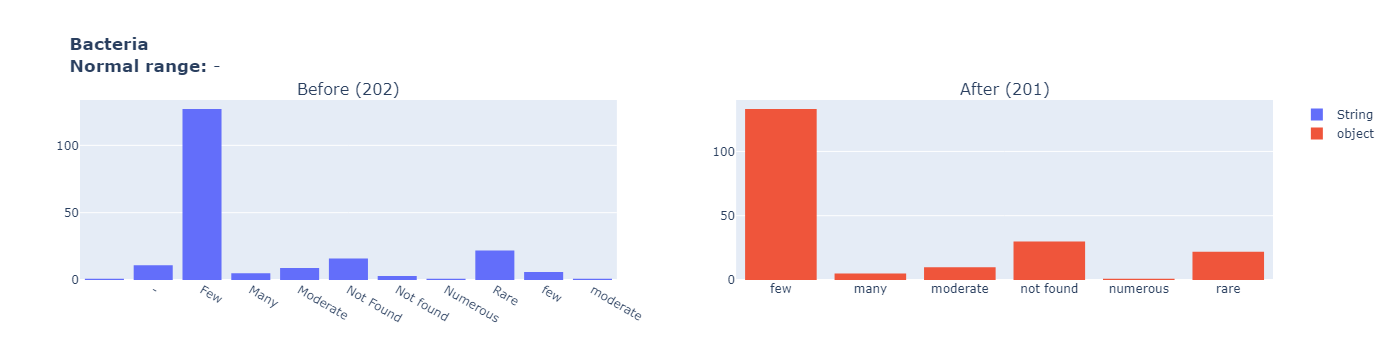

In [542]:
before_data = lab_df.loc[lab_df['labItemsNameRef'] == 'Bacteria']
after_data = selected_lab_df.loc[selected_lab_df['labItemsNameRef'] == 'Bacteria']

histogram_before_after('Bacteria', 
                       '-', before_data,after_data)

### Urine Color

#### Before

In [543]:
selected_lab_df.loc[selected_lab_df['labItemsNameRef'] == 'Urine Color']

,rowID,cid,labItemsNameRef,labItemsNormalValueRef,labOrderResult,labItemsUnit
125,888917.0,4898d581bde0e3216c15662327cd301286670cd12786f6...,Urine Color,,Yellow,Test
162,4680522.0,9fb79d9d7c7e0d536213f063a061707fb599d775fa6087...,Urine Color,,Yellow,
279,312651.0,4772ebad086869522b97f1a5ce290b066e8e464e538fc0...,Urine Color,0.00 - 0.00,Yellow,
397,5470047.0,7e56863e5edfb511962c64dda46fb0547f1fdf26120f08...,Urine Color,,Yellow,
488,900014.0,5a43fd97483508f29394031872ec22890bccf0ac6e7542...,Urine Color,,Yellow,Test
...,...,...,...,...,...,...
13349,1681555.0,5847c94f0238227268ea5502d80316eb01128fa37285b2...,Urine Color,Yellow,Yellow,
13407,4382661.0,3f3701e8bcda639e00bee3966b726182cdd8cfb37b0883...,Urine Color,,Yellow,Test
13457,2431873.0,b6c83a611fbe7e2b69c13b09108bfecbc9924700f99278...,Urine Color,Yellow,Yellow,
13577,1466704.0,0d62ccf972e7c7562ebedc8014f7c76c00cbe9908869be...,Urine Color,,Yellow,Test


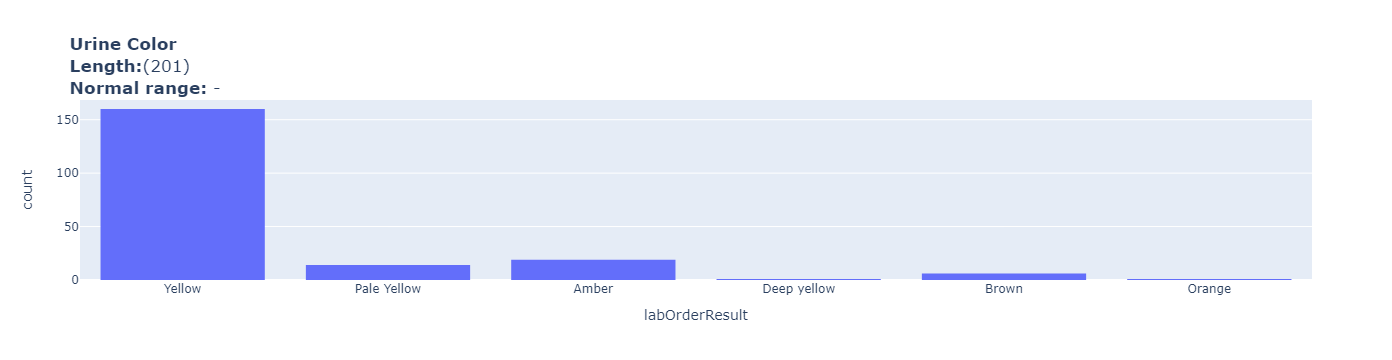

In [544]:
df = selected_lab_df.loc[selected_lab_df['labItemsNameRef'] == 'Urine Color']
df_len = df.shape[0]
lab_name = 'Urine Color'
normal_range = '-'
fig1 = px.histogram(data_frame = df,x = "labOrderResult",title=f'<b>{lab_name}</b><br><b>Length:</b>({df_len})<br><b>Normal range:</b> {normal_range}')
fig1.show()

#### labItemsNormalValueRef

In [545]:
selected_lab_df.loc[selected_lab_df['labItemsNameRef'] == 'Urine Color','labItemsNormalValueRef'].value_counts()

               113
Yellow          79
0.00 - 0.00      7
Yellow -         2
Name: labItemsNormalValueRef, dtype: int64

#### labItemsUnit

In [546]:
selected_lab_df.loc[selected_lab_df['labItemsNameRef'] == 'Urine Color','labItemsUnit'].value_counts()

        129
Test     72
Name: labItemsUnit, dtype: int64

#### labOrderResult

In [547]:
selected_lab_df.loc[selected_lab_df['labItemsNameRef'] == 'Urine Color','labOrderResult'].value_counts()

Yellow         160
Amber           19
Pale Yellow     14
Brown            6
Deep yellow      1
Orange           1
Name: labOrderResult, dtype: int64

#### After

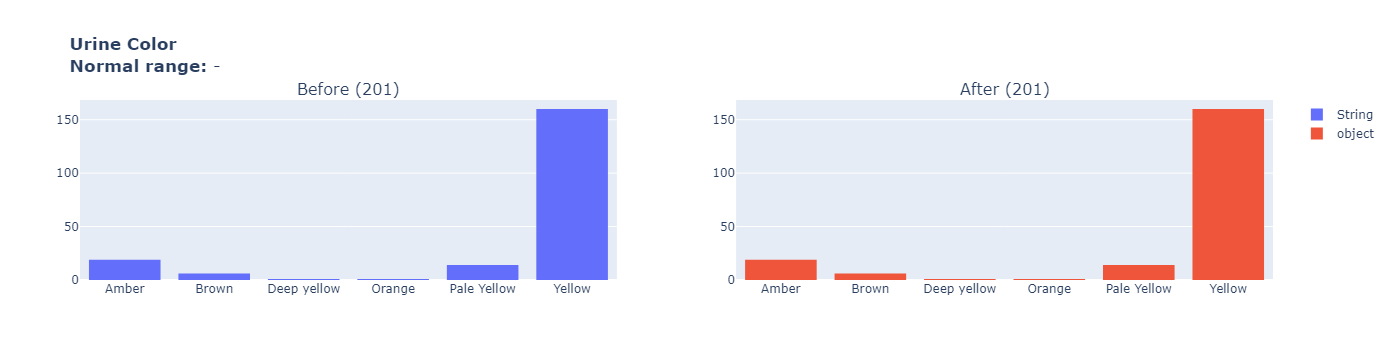

In [548]:
lab_name = 'Urine Color'
normal_range = '-'
before_data = lab_df.loc[lab_df['labItemsNameRef'] == lab_name]
after_data = selected_lab_df.loc[selected_lab_df['labItemsNameRef'] == lab_name]

histogram_before_after(lab_name, 
                       normal_range, before_data,after_data)
                       

### Urine pH

In [549]:
selected_lab_df.loc[selected_lab_df['labItemsNameRef'] == 'Urine pH']

,rowID,cid,labItemsNameRef,labItemsNormalValueRef,labOrderResult,labItemsUnit
126,888917.0,4898d581bde0e3216c15662327cd301286670cd12786f6...,Urine pH,5.0 - 8.0,6.5,
164,4680522.0,9fb79d9d7c7e0d536213f063a061707fb599d775fa6087...,Urine pH,,5.5,
268,312651.0,4772ebad086869522b97f1a5ce290b066e8e464e538fc0...,Urine pH,0.00 - 0.00,8.0,
399,5470047.0,7e56863e5edfb511962c64dda46fb0547f1fdf26120f08...,Urine pH,,5.0,
489,900014.0,5a43fd97483508f29394031872ec22890bccf0ac6e7542...,Urine pH,5.0 - 8.0,6.5,
...,...,...,...,...,...,...
13352,1681555.0,5847c94f0238227268ea5502d80316eb01128fa37285b2...,Urine pH,6.0 - 7.0,9.0,
13409,4382661.0,3f3701e8bcda639e00bee3966b726182cdd8cfb37b0883...,Urine pH,5.0 - 8.0,5.5,
13446,2431873.0,b6c83a611fbe7e2b69c13b09108bfecbc9924700f99278...,Urine pH,5.0 - 8.0,5,
13578,1466704.0,0d62ccf972e7c7562ebedc8014f7c76c00cbe9908869be...,Urine pH,5.0 - 8.0,7.0,


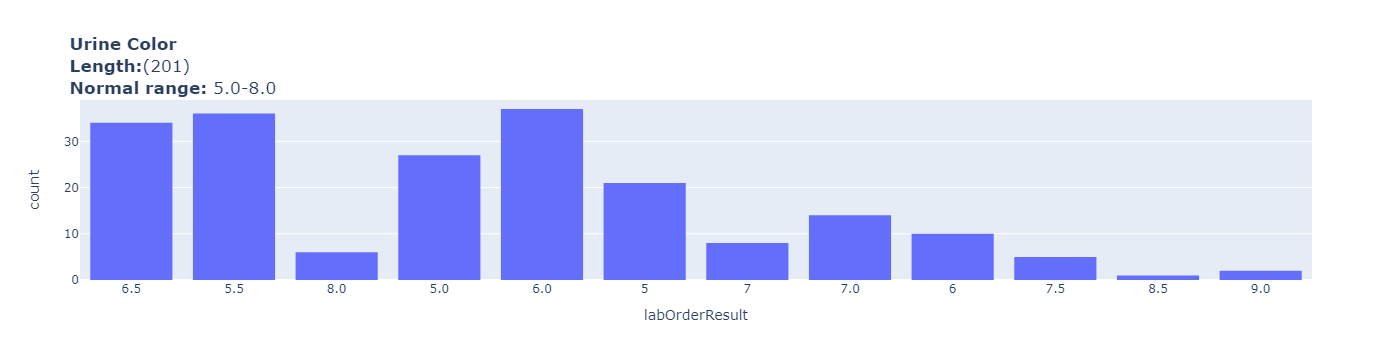

In [550]:
df = selected_lab_df.loc[selected_lab_df['labItemsNameRef'] == 'Urine pH']
df_len = df.shape[0]

normal_range = '5.0-8.0'
fig1 = px.histogram(data_frame = df,x = "labOrderResult",title=f'<b>{lab_name}</b><br><b>Length:</b>({df_len})<br><b>Normal range:</b> {normal_range}')
fig1.show()

#### labItemsNormalValueRef

In [551]:
selected_lab_df.loc[selected_lab_df['labItemsNameRef'] == 'Urine pH','labItemsNormalValueRef'].value_counts()

5.0 - 8.0      146
                41
6.0 - 7.0       12
0.00 - 0.00      1
5.00 - 8.00      1
Name: labItemsNormalValueRef, dtype: int64

#### labItemsUnit

In [552]:
selected_lab_df.loc[selected_lab_df['labItemsNameRef'] == 'Urine pH','labItemsUnit'].value_counts()

    201
Name: labItemsUnit, dtype: int64

#### labOrderResult

In [553]:
selected_lab_df.loc[selected_lab_df['labItemsNameRef'] == 'Urine pH','labOrderResult'].value_counts()

6.0    37
5.5    36
6.5    34
5.0    27
5      21
7.0    14
6      10
7       8
8.0     6
7.5     5
9.0     2
8.5     1
Name: labOrderResult, dtype: int64

#### After

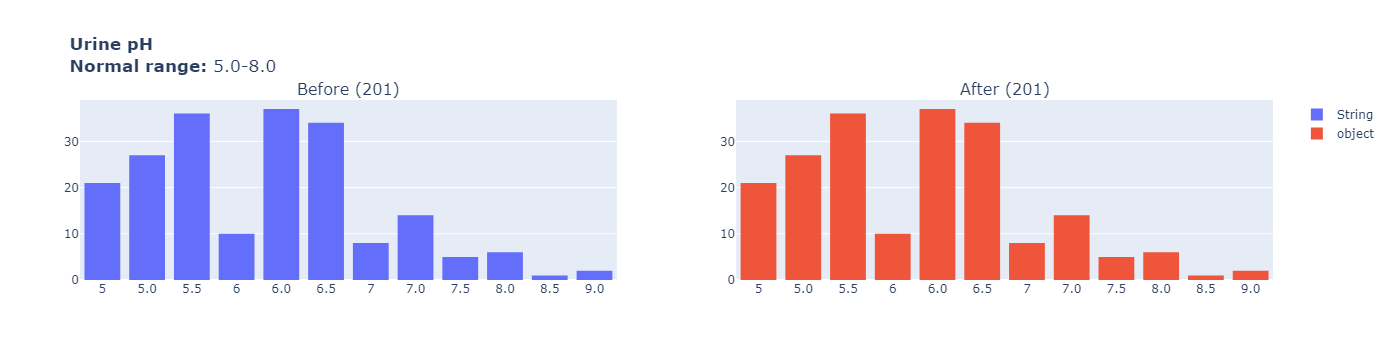

In [554]:
before_data = lab_df.loc[lab_df['labItemsNameRef'] == 'Urine pH']
after_data = selected_lab_df.loc[selected_lab_df['labItemsNameRef'] == 'Urine pH']

histogram_before_after('Urine pH', 
                       normal_range, before_data,after_data)

### Urine WBC

#### Before

In [555]:
selected_lab_df.loc[selected_lab_df['labItemsNameRef'] == 'Urine WBC']

,rowID,cid,labItemsNameRef,labItemsNormalValueRef,labOrderResult,labItemsUnit
124,888917.0,4898d581bde0e3216c15662327cd301286670cd12786f6...,Urine WBC,0 - 5,1 - 2,cells/HPF
168,4680522.0,9fb79d9d7c7e0d536213f063a061707fb599d775fa6087...,Urine WBC,/HPF,0-1,
285,312651.0,4772ebad086869522b97f1a5ce290b066e8e464e538fc0...,Urine WBC,0.00 - 5.00,5-10,
403,5470047.0,7e56863e5edfb511962c64dda46fb0547f1fdf26120f08...,Urine WBC,/HPF,0-1,
487,900014.0,5a43fd97483508f29394031872ec22890bccf0ac6e7542...,Urine WBC,0 - 5,1 - 2,cells/HPF
...,...,...,...,...,...,...
13271,1265893.0,c8f9a3221febeb643830b04fa92214ed67b5d49877218e...,Urine WBC,0 - 5,0-1,
13406,4382661.0,3f3701e8bcda639e00bee3966b726182cdd8cfb37b0883...,Urine WBC,0 - 5,1 - 2,cells/HPF
13463,2431873.0,b6c83a611fbe7e2b69c13b09108bfecbc9924700f99278...,Urine WBC,0 - 5,5-10,
13576,1466704.0,0d62ccf972e7c7562ebedc8014f7c76c00cbe9908869be...,Urine WBC,0 - 5,0 - 1,cells/HPF


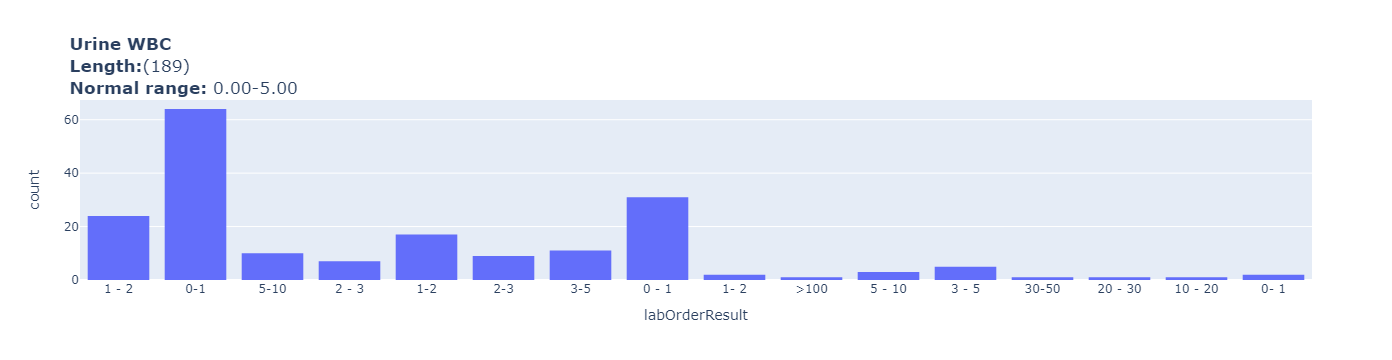

In [556]:
lab_name = 'Urine WBC'
df = selected_lab_df.loc[selected_lab_df['labItemsNameRef'] == 'Urine WBC']
df_len = df.shape[0]

normal_range = '0.00-5.00'
fig1 = px.histogram(data_frame = df,x = "labOrderResult",title=f'<b>{lab_name}</b><br><b>Length:</b>({df_len})<br><b>Normal range:</b> {normal_range}')
fig1.show()

In [557]:
selected_lab_df.loc[(selected_lab_df['labItemsNameRef'] == lab_name) & (selected_lab_df['labOrderResult'] == '>100')]

,rowID,cid,labItemsNameRef,labItemsNormalValueRef,labOrderResult,labItemsUnit
1533,1258425.0,3cf50b1dbeb6cc370ebce6b2bf50587d2dd5724c7c793f...,Urine WBC,0.00 - 5.00,>100,


In [558]:
selected_lab_df.loc[selected_lab_df['labItemsNameRef'] == 'Urine WBC'].shape[0]

189

In [559]:
selected_lab_df.loc[selected_lab_df['labItemsNameRef'] == 'Urine WBC'] = selected_lab_df.drop(index=selected_lab_df.loc[(selected_lab_df['labItemsNameRef'] == 'Urine WBC') & (selected_lab_df['labOrderResult'] == '>100')].index)

In [560]:
selected_lab_df.loc[selected_lab_df['labItemsNameRef'] == 'Urine WBC'].shape[0]

188

#### labItemsNormalValueRef

In [561]:
selected_lab_df.loc[selected_lab_df['labItemsNameRef'] == 'Urine WBC','labItemsNormalValueRef'].value_counts()

0 - 5          138
/HPF            41
0.00 - 5.00      9
Name: labItemsNormalValueRef, dtype: int64

In [562]:
selected_lab_df.loc[(selected_lab_df['labItemsNameRef'] == 'Urine WBC') & (selected_lab_df['labItemsNormalValueRef'] == '0 - 5')]

,rowID,cid,labItemsNameRef,labItemsNormalValueRef,labOrderResult,labItemsUnit
124,888917.0,4898d581bde0e3216c15662327cd301286670cd12786f6...,Urine WBC,0 - 5,1 - 2,cells/HPF
487,900014.0,5a43fd97483508f29394031872ec22890bccf0ac6e7542...,Urine WBC,0 - 5,1 - 2,cells/HPF
519,3932619.0,ea58e1f3633dca15e59f24d7c1448f3c693939f36407ec...,Urine WBC,0 - 5,2 - 3,cells/HPF
625,1761048.0,b33448647b15053f6c4a935349dc36ba37c8be792c48b2...,Urine WBC,0 - 5,0-1,
731,615063.0,3ac1457c0c846406560a644538594f13bdeb1181223c3c...,Urine WBC,0 - 5,0-1,
...,...,...,...,...,...,...
13271,1265893.0,c8f9a3221febeb643830b04fa92214ed67b5d49877218e...,Urine WBC,0 - 5,0-1,
13406,4382661.0,3f3701e8bcda639e00bee3966b726182cdd8cfb37b0883...,Urine WBC,0 - 5,1 - 2,cells/HPF
13463,2431873.0,b6c83a611fbe7e2b69c13b09108bfecbc9924700f99278...,Urine WBC,0 - 5,5-10,
13576,1466704.0,0d62ccf972e7c7562ebedc8014f7c76c00cbe9908869be...,Urine WBC,0 - 5,0 - 1,cells/HPF


In [563]:
selected_lab_df.loc[(selected_lab_df['labItemsNameRef'] == 'Urine WBC') & (selected_lab_df['labItemsNormalValueRef'] == '/HPF')]

,rowID,cid,labItemsNameRef,labItemsNormalValueRef,labOrderResult,labItemsUnit
168,4680522.0,9fb79d9d7c7e0d536213f063a061707fb599d775fa6087...,Urine WBC,/HPF,0-1,
403,5470047.0,7e56863e5edfb511962c64dda46fb0547f1fdf26120f08...,Urine WBC,/HPF,0-1,
557,1555265.0,9e405c7d72ec3c36170eec4b13326b60fa3b180d54b775...,Urine WBC,/HPF,0-1,
593,3728449.0,31281278b18132f1c0c0dbe13748103ec8d0a1869bac38...,Urine WBC,/HPF,0-1,
681,1328705.0,d774d1587eecba9415309b98d343159b064090556bfb50...,Urine WBC,/HPF,0-1,
1127,763358.0,e7bb46b8837f83fc28293c9b7c09f6fbbaeeb5d7708eff...,Urine WBC,/HPF,0-1,
1273,741493.0,57a52ed466fa4e25dc021bd2f3849d39e4a2a5958fcf2f...,Urine WBC,/HPF,3-5,
1674,6034848.0,87db246b66092226be2181f042e5f05f263f27556df38d...,Urine WBC,/HPF,1-2,
2082,5411984.0,2942dfeecb91c3094ebba9557dd3310370da562ac988f0...,Urine WBC,/HPF,0-1,
2207,5976759.0,0f46697fe01d53a0032f8b3a265a6d0bd7a1074a69c08e...,Urine WBC,/HPF,0-1,


In [564]:
selected_lab_df.loc[(selected_lab_df['labItemsNameRef'] == 'Urine WBC') & (selected_lab_df['labItemsNormalValueRef'] == '0.00 - 5.00')]

,rowID,cid,labItemsNameRef,labItemsNormalValueRef,labOrderResult,labItemsUnit
285,312651.0,4772ebad086869522b97f1a5ce290b066e8e464e538fc0...,Urine WBC,0.00 - 5.00,5-10,
1487,461396.0,ceabc5dab74ec4a5652f738b5d76cbe1bdc3505657a7c5...,Urine WBC,0.00 - 5.00,1-\n2,
1554,1258425.0,3cf50b1dbeb6cc370ebce6b2bf50587d2dd5724c7c793f...,Urine WBC,0.00 - 5.00,5-10,
3935,604428.0,ad948b83c04185042337ec275034366b0ffeb7b1718726...,Urine WBC,0.00 - 5.00,3-5,
9204,416.0,1e0da36533bea9103715409de5b27eabd12c570555fe84...,Urine WBC,0.00 - 5.00,0-\n1,
9383,1756784.0,3cfc219bdb91773d12f29474efec2f12ceb177c4d058f7...,Urine WBC,0.00 - 5.00,3-5,
10438,1341953.0,43057a6d050d873b275f5c29d7b294cd9ecbec94066018...,Urine WBC,0.00 - 5.00,3-5,
12241,1692765.0,97923446b34b1a65b55112303826fdeff5aef6d6b1b34f...,Urine WBC,0.00 - 5.00,1-\n2,
12299,563.0,a84f3e687fa695e10e885b6f8b73d528c763f27fe1df3a...,Urine WBC,0.00 - 5.00,0-\n1,


#### labItemsUnit

In [565]:
selected_lab_df.loc[selected_lab_df['labItemsNameRef'] == 'Urine WBC','labItemsUnit'].value_counts()

              116
 cells/HPF     72
Name: labItemsUnit, dtype: int64

In [566]:
selected_lab_df.loc[(selected_lab_df['labItemsNameRef'] == 'Urine WBC') & (selected_lab_df['labItemsUnit'] == '')]

,rowID,cid,labItemsNameRef,labItemsNormalValueRef,labOrderResult,labItemsUnit
168,4680522.0,9fb79d9d7c7e0d536213f063a061707fb599d775fa6087...,Urine WBC,/HPF,0-1,
285,312651.0,4772ebad086869522b97f1a5ce290b066e8e464e538fc0...,Urine WBC,0.00 - 5.00,5-10,
403,5470047.0,7e56863e5edfb511962c64dda46fb0547f1fdf26120f08...,Urine WBC,/HPF,0-1,
557,1555265.0,9e405c7d72ec3c36170eec4b13326b60fa3b180d54b775...,Urine WBC,/HPF,0-1,
593,3728449.0,31281278b18132f1c0c0dbe13748103ec8d0a1869bac38...,Urine WBC,/HPF,0-1,
...,...,...,...,...,...,...
13026,621218.0,bc7e7610bc60769976ae6df2ec336a36d1d5031c7c2b2a...,Urine WBC,/HPF,2-3,
13059,3954025.0,020b8aa0ec834b3b7fa2b6880297652896b633b0f91097...,Urine WBC,/HPF,0-1,
13094,5444507.0,1bd32910c8ec0ac96f4d23eb4d406e0d0fb41b84086fae...,Urine WBC,/HPF,0-1,
13271,1265893.0,c8f9a3221febeb643830b04fa92214ed67b5d49877218e...,Urine WBC,0 - 5,0-1,


#### labOrderResult

In [567]:
selected_lab_df.loc[selected_lab_df['labItemsNameRef'] == 'Urine WBC','labOrderResult'].value_counts()

0-1        64
0 - 1      31
1 - 2      24
1-2        17
3-5        11
5-10       10
2-3         9
2 - 3       7
3 - 5       5
5 - 10      3
1-\n2       2
0-\n1       2
30-50       1
20 - 30     1
10 - 20     1
Name: labOrderResult, dtype: int64

In [568]:
def clean_Urine_WBC_labOrderResult(x):
    # 0-1, 0-1, 0-1, 1-2 ,0-1, 100, 30-50, 20-30, 10-20
    x = re.sub(r'|>| ','',x)
    # more then normal range (0-5
    if re.search(r'[5-9]-\d+|[1-9][0-9]-\d+',x):
        return 'positive'
    else:
        return 'negative'

In [569]:
selected_lab_df.loc[selected_lab_df['labItemsNameRef'] == 'Urine WBC','labOrderResult'] = selected_lab_df.loc[selected_lab_df['labItemsNameRef'] == 'Urine WBC','labOrderResult'].apply(clean_Urine_WBC_labOrderResult)

In [570]:
selected_lab_df.loc[selected_lab_df['labItemsNameRef'] == 'Urine WBC','labOrderResult'].value_counts()

negative    172
positive     16
Name: labOrderResult, dtype: int64

#### After

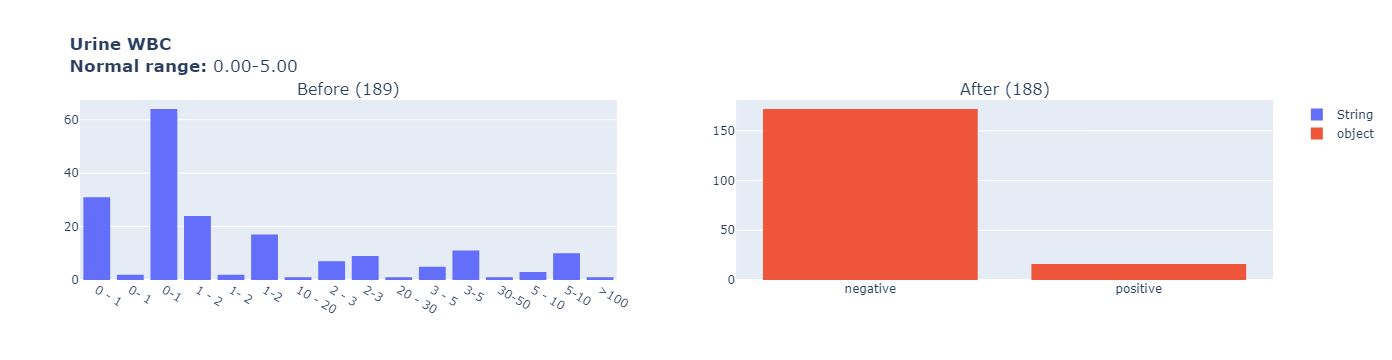

In [571]:
before_data = lab_df.loc[lab_df['labItemsNameRef'] == lab_name]
after_data = selected_lab_df.loc[selected_lab_df['labItemsNameRef'] == lab_name]

histogram_before_after(lab_name, 
                       normal_range, before_data,after_data)

### Urine Sugar

#### Before

In [572]:
selected_lab_df.loc[selected_lab_df['labItemsNameRef'] == 'Urine Sugar']

,rowID,cid,labItemsNameRef,labItemsNormalValueRef,labOrderResult,labItemsUnit
127,888917.0,4898d581bde0e3216c15662327cd301286670cd12786f6...,Urine Sugar,,Negative,
166,4680522.0,9fb79d9d7c7e0d536213f063a061707fb599d775fa6087...,Urine Sugar,,Negative,
267,312651.0,4772ebad086869522b97f1a5ce290b066e8e464e538fc0...,Urine Sugar,0.00 - 0.00,1.010,
401,5470047.0,7e56863e5edfb511962c64dda46fb0547f1fdf26120f08...,Urine Sugar,,Negative,
490,900014.0,5a43fd97483508f29394031872ec22890bccf0ac6e7542...,Urine Sugar,,Negative,
...,...,...,...,...,...,...
13253,1265893.0,c8f9a3221febeb643830b04fa92214ed67b5d49877218e...,Urine Sugar,1.003-1.030,1.037,
13410,4382661.0,3f3701e8bcda639e00bee3966b726182cdd8cfb37b0883...,Urine Sugar,,Negative,
13445,2431873.0,b6c83a611fbe7e2b69c13b09108bfecbc9924700f99278...,Urine Sugar,1.003-1.030,1.018,
13579,1466704.0,0d62ccf972e7c7562ebedc8014f7c76c00cbe9908869be...,Urine Sugar,,Negative,


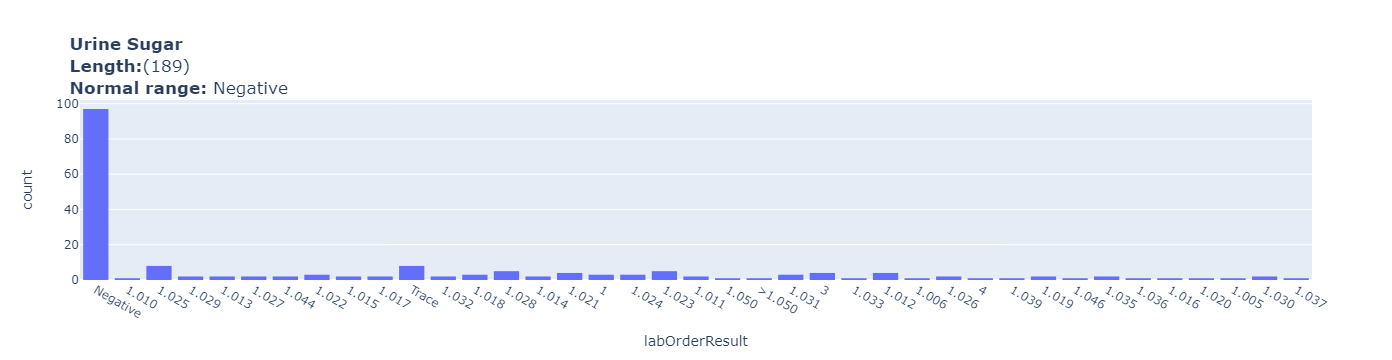

In [573]:
lab_name = 'Urine Sugar'
normal_range = 'Negative'
df = selected_lab_df.loc[selected_lab_df['labItemsNameRef'] == lab_name]
df_len = df.shape[0]

normal_range = 'Negative'
fig1 = px.histogram(data_frame = df,x = "labOrderResult",title=f'<b>{lab_name}</b><br><b>Length:</b>({df_len})<br><b>Normal range:</b> {normal_range}')
fig1.show()

#### labItemsNormalValueRef

In [574]:
selected_lab_df.loc[selected_lab_df['labItemsNameRef'] == 'Urine Sugar','labItemsNormalValueRef'].value_counts()

               113
1.003-1.030     73
1.00 - 1.03      2
0.00 - 0.00      1
Name: labItemsNormalValueRef, dtype: int64

In [575]:
selected_lab_df.loc[(selected_lab_df['labItemsNameRef'] == 'Urine Sugar') & (selected_lab_df['labItemsNormalValueRef'] == '')]

,rowID,cid,labItemsNameRef,labItemsNormalValueRef,labOrderResult,labItemsUnit
127,888917.0,4898d581bde0e3216c15662327cd301286670cd12786f6...,Urine Sugar,,Negative,
166,4680522.0,9fb79d9d7c7e0d536213f063a061707fb599d775fa6087...,Urine Sugar,,Negative,
401,5470047.0,7e56863e5edfb511962c64dda46fb0547f1fdf26120f08...,Urine Sugar,,Negative,
490,900014.0,5a43fd97483508f29394031872ec22890bccf0ac6e7542...,Urine Sugar,,Negative,
522,3932619.0,ea58e1f3633dca15e59f24d7c1448f3c693939f36407ec...,Urine Sugar,,Negative,
...,...,...,...,...,...,...
13057,3954025.0,020b8aa0ec834b3b7fa2b6880297652896b633b0f91097...,Urine Sugar,,Negative,
13092,5444507.0,1bd32910c8ec0ac96f4d23eb4d406e0d0fb41b84086fae...,Urine Sugar,,Negative,
13410,4382661.0,3f3701e8bcda639e00bee3966b726182cdd8cfb37b0883...,Urine Sugar,,Negative,
13579,1466704.0,0d62ccf972e7c7562ebedc8014f7c76c00cbe9908869be...,Urine Sugar,,Negative,


In [576]:
selected_lab_df.loc[(selected_lab_df['labItemsNameRef'] == 'Urine Sugar') & (selected_lab_df['labItemsNormalValueRef'] == '1.003-1.030')]

,rowID,cid,labItemsNameRef,labItemsNormalValueRef,labOrderResult,labItemsUnit
607,1761048.0,b33448647b15053f6c4a935349dc36ba37c8be792c48b2...,Urine Sugar,1.003-1.030,1.025,
713,615063.0,3ac1457c0c846406560a644538594f13bdeb1181223c3c...,Urine Sugar,1.003-1.030,1.029,
864,1037564.0,d4140c16d748393b0ed317aae693ed2eb8f37c6e0b64fb...,Urine Sugar,1.003-1.030,1.013,
903,825.0,482f04e5bf1703204737654e6a1938f19425ee065c79c6...,Urine Sugar,1.003-1.030,1.027,
980,896834.0,55937566406f8a1102088a4e4b93e6650888c99b2349c3...,Urine Sugar,1.003-1.030,1.025,
...,...,...,...,...,...,...
12223,1692765.0,97923446b34b1a65b55112303826fdeff5aef6d6b1b34f...,Urine Sugar,1.003-1.030,1.021,
12281,563.0,a84f3e687fa695e10e885b6f8b73d528c763f27fe1df3a...,Urine Sugar,1.003-1.030,1.031,
12913,716236.0,e7dc2a06e9312a639e2d0cace36d5d92eccf35ac729dcf...,Urine Sugar,1.003-1.030,1.031,
13253,1265893.0,c8f9a3221febeb643830b04fa92214ed67b5d49877218e...,Urine Sugar,1.003-1.030,1.037,


Drop 

In [577]:
selected_lab_df.loc[selected_lab_df['labItemsNameRef'] == 'Urine Sugar'].shape[0]

189

In [578]:
selected_lab_df.loc[selected_lab_df['labItemsNameRef'] == 'Urine Sugar'] = selected_lab_df.drop(index=selected_lab_df.loc[(selected_lab_df['labItemsNameRef'] == 'Urine Sugar') & (selected_lab_df['labItemsNormalValueRef'] == '1.003-1.030')].index)

In [579]:
selected_lab_df.loc[selected_lab_df['labItemsNameRef'] == 'Urine Sugar'].shape[0]

116

In [580]:
selected_lab_df.loc[(selected_lab_df['labItemsNameRef'] == 'Urine Sugar') & (selected_lab_df['labItemsNormalValueRef'] == '1.00 - 1.03')]

,rowID,cid,labItemsNameRef,labItemsNormalValueRef,labOrderResult,labItemsUnit
1515,1258425.0,3cf50b1dbeb6cc370ebce6b2bf50587d2dd5724c7c793f...,Urine Sugar,1.00 - 1.03,1.025,
5776,1309234.0,e44dff4d57a004c9c5c883f18a8c09c48bc45cdc4c0848...,Urine Sugar,1.00 - 1.03,>1.050,


In [581]:
selected_lab_df.loc[selected_lab_df['labItemsNameRef'] == 'Urine Sugar'] = selected_lab_df.drop(index=selected_lab_df.loc[(selected_lab_df['labItemsNameRef'] == 'Urine Sugar') & (selected_lab_df['labItemsNormalValueRef'] == '1.00 - 1.03')].index)

In [582]:
selected_lab_df.loc[(selected_lab_df['labItemsNameRef'] == 'Urine Sugar') & (selected_lab_df['labItemsNormalValueRef'] == '0.00 - 0.00')]

,rowID,cid,labItemsNameRef,labItemsNormalValueRef,labOrderResult,labItemsUnit
267,312651.0,4772ebad086869522b97f1a5ce290b066e8e464e538fc0...,Urine Sugar,0.00 - 0.00,1.010,


In [583]:
selected_lab_df.loc[selected_lab_df['labItemsNameRef'] == 'Urine Sugar'] = selected_lab_df.drop(index=selected_lab_df.loc[(selected_lab_df['labItemsNameRef'] == 'Urine Sugar') & (selected_lab_df['labItemsNormalValueRef'] == '0.00 - 0.00')].index)

In [584]:
selected_lab_df.loc[selected_lab_df['labItemsNameRef'] == 'Urine Sugar'].shape[0]

113

#### labItemsUnit

In [585]:
selected_lab_df.loc[selected_lab_df['labItemsNameRef'] == 'Urine Sugar','labItemsUnit'].value_counts()

     105
+      8
Name: labItemsUnit, dtype: int64

In [586]:
selected_lab_df.loc[(selected_lab_df['labItemsNameRef'] == 'Urine Sugar') & (selected_lab_df['labItemsUnit'] == '')]

,rowID,cid,labItemsNameRef,labItemsNormalValueRef,labOrderResult,labItemsUnit
127,888917.0,4898d581bde0e3216c15662327cd301286670cd12786f6...,Urine Sugar,,Negative,
166,4680522.0,9fb79d9d7c7e0d536213f063a061707fb599d775fa6087...,Urine Sugar,,Negative,
401,5470047.0,7e56863e5edfb511962c64dda46fb0547f1fdf26120f08...,Urine Sugar,,Negative,
490,900014.0,5a43fd97483508f29394031872ec22890bccf0ac6e7542...,Urine Sugar,,Negative,
522,3932619.0,ea58e1f3633dca15e59f24d7c1448f3c693939f36407ec...,Urine Sugar,,Negative,
...,...,...,...,...,...,...
13057,3954025.0,020b8aa0ec834b3b7fa2b6880297652896b633b0f91097...,Urine Sugar,,Negative,
13092,5444507.0,1bd32910c8ec0ac96f4d23eb4d406e0d0fb41b84086fae...,Urine Sugar,,Negative,
13410,4382661.0,3f3701e8bcda639e00bee3966b726182cdd8cfb37b0883...,Urine Sugar,,Negative,
13579,1466704.0,0d62ccf972e7c7562ebedc8014f7c76c00cbe9908869be...,Urine Sugar,,Negative,


In [587]:
selected_lab_df.loc[(selected_lab_df['labItemsNameRef'] == 'Urine Sugar') & (selected_lab_df['labItemsUnit'] == '+')]

,rowID,cid,labItemsNameRef,labItemsNormalValueRef,labOrderResult,labItemsUnit
3307,2354917.0,57167908e51a96d268291215151c655dc49f3a8fb24e8e...,Urine Sugar,,1,+
4860,3440672.0,208162086583b541ec352eb8c96176e12acd44a2c72570...,Urine Sugar,,1,+
6160,570474.0,2846241a72c8cc032962d8575f80f35315dc862fc40a23...,Urine Sugar,,3,+
6404,2229698.0,4d84f423b96eb0ea6d43fbf1f60499a6a0c86bfd54f668...,Urine Sugar,,3,+
6567,5650988.0,2aced1e056244edc65be9ea8dc1f57af990c393c7b1e59...,Urine Sugar,,3,+
8511,6213562.0,74863d68f32fe525eab07f55da18eaf7765ee0dc64a14b...,Urine Sugar,,3,+
9166,6182869.0,0ababfbde4fda3b5446166b1f94cb54e8559311268f36a...,Urine Sugar,,4,+
11993,1664721.0,230a91ec09dec0f7eee6d177b45d000bf5bd4ed0fb7277...,Urine Sugar,,1,+


#### labOrderResult

In [588]:
selected_lab_df.loc[selected_lab_df['labItemsNameRef'] == 'Urine Sugar','labOrderResult'].unique()

array(['Negative', 'Trace', '1', '3', '4'], dtype=object)

In [589]:
selected_lab_df.loc[selected_lab_df['labItemsNameRef'] == 'Urine Sugar','labOrderResult'].value_counts()

Negative    97
Trace        8
3            4
1            3
4            1
Name: labOrderResult, dtype: int64

#### After

Urine Sugar โดยปกติแล้วมีการตรวจสองแบบ
1. การตรวจเชิงปริมาณ โดยการวัดค่าออกมาเป็นตัวเลขจริงๆ
2. การตรวจเชิงคุณภาพ จะตรวจหาน้ำตาลในปัสสาวะออกมาเป็น Ordinal Scale คือ
    - Negative
    - Trace
    - 1+
    - 2+
    - 3+
    - 4+

Urine Specific gravity (Urine SpGr)
- Normal range 1.005 to 1.030

- 1.000-1.100

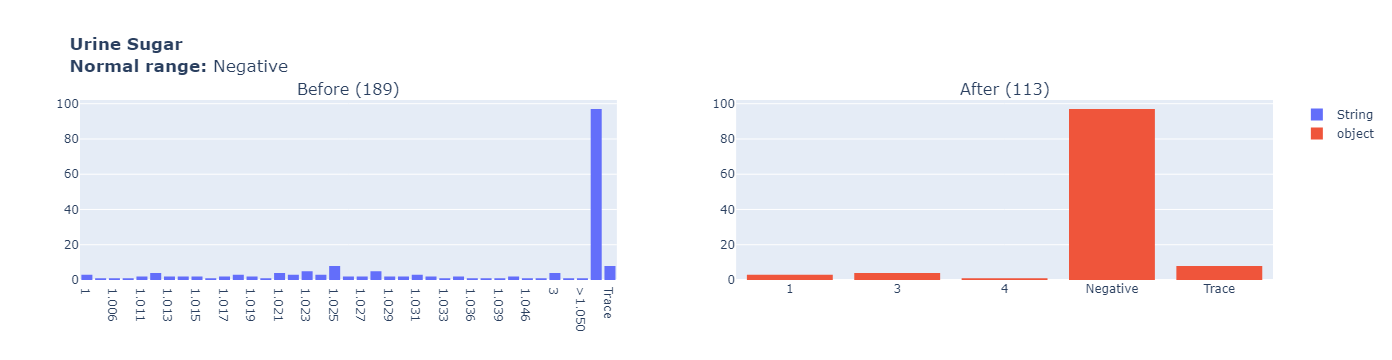

In [590]:
before_data = lab_df.loc[lab_df['labItemsNameRef'] == 'Urine Sugar']
after_data = selected_lab_df.loc[selected_lab_df['labItemsNameRef'] == 'Urine Sugar']

histogram_before_after('Urine Sugar', 
                       'Negative', before_data,after_data)

### Creatinine

#### Before

In [591]:
selected_lab_df.loc[selected_lab_df['labItemsNameRef'] == 'Creatinine']

,rowID,cid,labItemsNameRef,labItemsNormalValueRef,labOrderResult,labItemsUnit
22,601443.0,a4d3ae6322bcc001916821c27ea51fc0983e232f8bf6f7...,Creatinine,0.70 - 1.20,0.37,mg/dL
111,888917.0,4898d581bde0e3216c15662327cd301286670cd12786f6...,Creatinine,0.51-0.95,0.55,mg/dL
143,4680522.0,9fb79d9d7c7e0d536213f063a061707fb599d775fa6087...,Creatinine,0.51 - 0.95,0.45,mg/dL
329,297773.0,6d277cbe0628489674113c6b1f255112849ddafdb0f9e5...,Creatinine,0.7 - 1.2,0.70,mg/dL
335,3498952.0,3c2eebb51bf29cbf191e54fb00a64a6ce8f863822b35d1...,Creatinine,0.7 - 1.2,0.73,mg/dL
...,...,...,...,...,...,...
13167,5497511.0,61a5b7f4309755e11ac8e648533b4b0e2e061f92ba58dd...,Creatinine,0.66 - 1.25,0.82,mg/dl
13227,915342.0,82dc1fbf1cae6b8c7839a06a16ea4c7aa42b5e08ffe9e0...,Creatinine,0.40-1.10,0.90,mg/dL
13275,1265893.0,c8f9a3221febeb643830b04fa92214ed67b5d49877218e...,Creatinine,0.66 - 1.25,0.52,
13338,1681555.0,5847c94f0238227268ea5502d80316eb01128fa37285b2...,Creatinine,0.60 - 1.10,0.85,


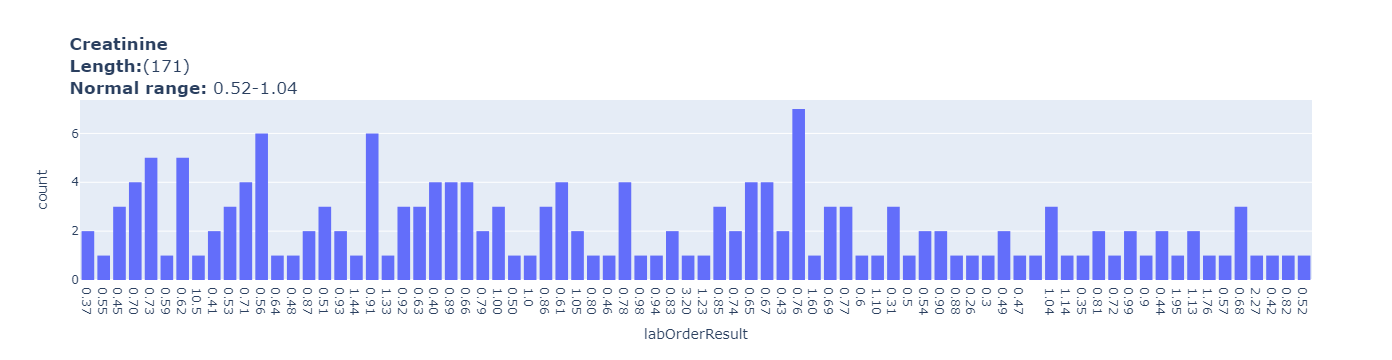

In [592]:
lab_name = 'Creatinine'
df = selected_lab_df.loc[selected_lab_df['labItemsNameRef'] == lab_name]
df_len = df.shape[0]

normal_range = '0.52-1.04'
fig1 = px.histogram(data_frame = df,x = "labOrderResult",title=f'<b>{lab_name}</b><br><b>Length:</b>({df_len})<br><b>Normal range:</b> {normal_range}')
fig1.show()

#### labItemsNormalValueRef

In [593]:
selected_lab_df.loc[selected_lab_df['labItemsNameRef'] == 'Creatinine','labItemsNormalValueRef'].value_counts()

0.52 - 1.04    44
0.66 - 1.25    43
0.51 - 0.95    12
0.40 - 1.10    11
0.40-1.10      11
0.7 - 1.2      10
0.67 - 1.17    10
0.67-1.17       8
0.51-0.95       6
0.70 - 1.10     6
0.60 - 1.10     4
0.4-1.1         3
0.70 - 1.20     1
0.5 - 0.8       1
0.6 - 1.1       1
Name: labItemsNormalValueRef, dtype: int64

#### labItemsUnit

In [594]:
selected_lab_df.loc[selected_lab_df['labItemsNameRef'] == 'Creatinine','labItemsUnit'].value_counts()

 mg/dL     69
           59
 mg/dl     42
mg/dlFF     1
Name: labItemsUnit, dtype: int64

In [595]:
selected_lab_df.loc[(selected_lab_df['labItemsNameRef'] == lab_name) & (selected_lab_df['labItemsUnit'] == '')]

,rowID,cid,labItemsNameRef,labItemsNormalValueRef,labOrderResult,labItemsUnit
442,233681.0,1131a731abf33d7f3400ad39c3675e262e137e0f20bc71...,Creatinine,0.70 - 1.10,10.5,
629,1761048.0,b33448647b15053f6c4a935349dc36ba37c8be792c48b2...,Creatinine,0.66 - 1.25,0.41,
858,1037564.0,d4140c16d748393b0ed317aae693ed2eb8f37c6e0b64fb...,Creatinine,0.66 - 1.25,0.56,
974,896834.0,55937566406f8a1102088a4e4b93e6650888c99b2349c3...,Creatinine,0.52 - 1.04,0.64,
1463,461396.0,ceabc5dab74ec4a5652f738b5d76cbe1bdc3505657a7c5...,Creatinine,0.66 - 1.25,0.91,
1490,1258425.0,3cf50b1dbeb6cc370ebce6b2bf50587d2dd5724c7c793f...,Creatinine,0.52 - 1.04,1.33,
1888,844099.0,c04a2fee075b20a9dc253a2a49f44102477bde30698112...,Creatinine,0.66 - 1.25,0.40,
2311,534716.0,e08aebfde15e0d3b9cc0b4caba4e2dbe680cba9f239e68...,Creatinine,0.66 - 1.25,0.66,
2771,1558372.0,925a36f4d08cf7d216af677d2ceb04e54d7773f3df7a0a...,Creatinine,0.66 - 1.25,0.91,
2877,787629.0,6736827e5b930eb1387e36a2f1d788fd764ade8ac16c5f...,Creatinine,0.52 - 1.04,0.50,


In [596]:
selected_lab_df.loc[(selected_lab_df['labItemsNameRef'] == lab_name) & (selected_lab_df['labItemsUnit'] == 'mg/dlFF')]

,rowID,cid,labItemsNameRef,labItemsNormalValueRef,labOrderResult,labItemsUnit
8407,128727.0,abefa375d418b452c06a015e1b2dc5645220df01b6cf5a...,Creatinine,0.4-1.1,,mg/dlFF


In [597]:
selected_lab_df.loc[selected_lab_df['labItemsNameRef'] == 'Creatinine'].shape[0]

171

In [598]:
selected_lab_df.loc[selected_lab_df['labItemsNameRef'] == 'Creatinine'] = selected_lab_df.drop(index=selected_lab_df.loc[(selected_lab_df['labItemsNameRef'] == 'Creatinine') & (selected_lab_df['labItemsUnit'] == 'mg/dlFF')].index)

In [599]:
selected_lab_df.loc[selected_lab_df['labItemsNameRef'] == 'Creatinine'].shape[0]

170

In [600]:
selected_lab_df.loc[selected_lab_df['labItemsNameRef'] == 'Creatinine','labItemsNormalValueRef'].value_counts()

0.52 - 1.04    44
0.66 - 1.25    43
0.51 - 0.95    12
0.40 - 1.10    11
0.40-1.10      11
0.7 - 1.2      10
0.67 - 1.17    10
0.67-1.17       8
0.51-0.95       6
0.70 - 1.10     6
0.60 - 1.10     4
0.4-1.1         2
0.70 - 1.20     1
0.5 - 0.8       1
0.6 - 1.1       1
Name: labItemsNormalValueRef, dtype: int64

In [601]:
selected_lab_df.loc[selected_lab_df['labItemsNameRef'] == 'Creatinine','labItemsNormalValueRef'] = '0.52 - 1.04'

In [602]:
selected_lab_df.loc[selected_lab_df['labItemsNameRef'] == 'Creatinine','labItemsNormalValueRef'].value_counts()

0.52 - 1.04    170
Name: labItemsNormalValueRef, dtype: int64

#### labOrderResult

In [603]:
selected_lab_df.loc[selected_lab_df['labItemsNameRef'] == 'Creatinine','labOrderResult'].unique()

array(['0.37', '0.55', '0.45', '0.70', '0.73', '0.59', '0.62', '10.5',
       '0.41', '0.53', '0.71', '0.56', '0.64', '0.48', '0.87', '0.51',
       '0.93', '1.44', '0.91', '1.33', '0.92', '0.63', '0.40', '0.89',
       '0.66', '0.79', '1.00', '0.50', '1.0', '0.86', '0.61', '1.05',
       '0.80', '0.46', '0.78', '0.98', '0.94', '0.83', '3.20', '1.23',
       '0.85', '0.74', '0.65', '0.67', '0.43', '0.76', '1.60', '0.69',
       '0.77', '0.6', '1.10', '0.31', '0.5', '0.54', '0.90', '0.88',
       '0.26', '0.3', '0.49', '0.47', '1.04', '1.14', '0.35', '0.81',
       '0.72', '0.99', '0.9', '0.44', '1.95', '1.13', '1.76', '0.57',
       '0.68', '2.27', '0.42', '0.82', '0.52'], dtype=object)

In [604]:
selected_lab_df.loc[(selected_lab_df['labItemsNameRef'] == lab_name) & (selected_lab_df['labOrderResult'] == '10.5')]


,rowID,cid,labItemsNameRef,labItemsNormalValueRef,labOrderResult,labItemsUnit
442,233681.0,1131a731abf33d7f3400ad39c3675e262e137e0f20bc71...,Creatinine,0.52 - 1.04,10.5,


In [605]:
selected_lab_df.loc[selected_lab_df['labItemsNameRef'] == 'Creatinine','labOrderResult'] = selected_lab_df.loc[selected_lab_df['labItemsNameRef'] == 'Creatinine','labOrderResult'].astype(float)

#### After

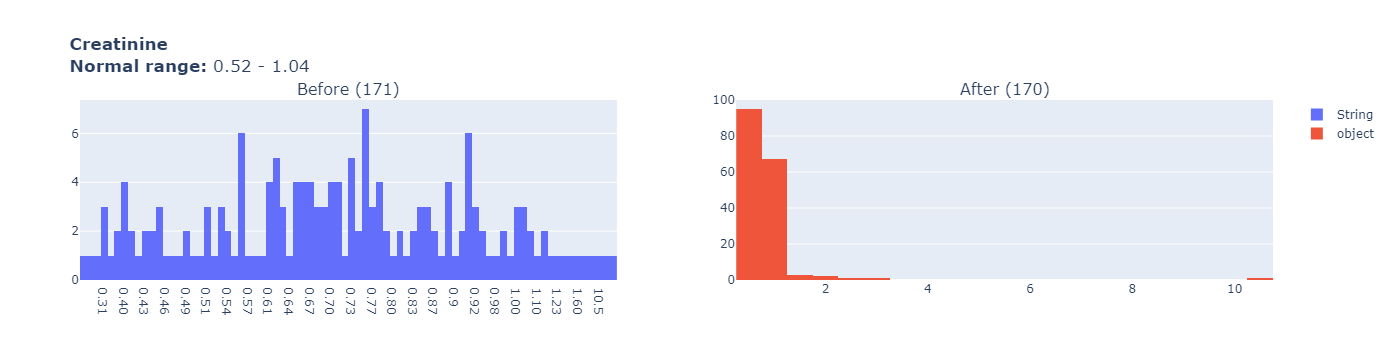

In [606]:
normal_range = '0.52 - 1.04'
before_data = lab_df.loc[lab_df['labItemsNameRef'] == 'Creatinine']
after_data = selected_lab_df.loc[selected_lab_df['labItemsNameRef'] == 'Creatinine']

histogram_before_after('Creatinine', 
                       normal_range, before_data,after_data)
                       

### Urine Albumin

#### Before

In [607]:
lab_name = 'Urine Albumin'
selected_lab_df.loc[selected_lab_df['labItemsNameRef'] == lab_name]

,rowID,cid,labItemsNameRef,labItemsNormalValueRef,labOrderResult,labItemsUnit
79,2981059.0,8af6c5ce961d556794ddc691089f3887fe0b8167eef188...,Urine Albumin,Negative,Negative,
136,888917.0,4898d581bde0e3216c15662327cd301286670cd12786f6...,Urine Albumin,,2,+
167,4680522.0,9fb79d9d7c7e0d536213f063a061707fb599d775fa6087...,Urine Albumin,,Negative,
237,2269053.0,ccc731dacaa44da723a1c9f863091e53de77b9891b0e17...,Urine Albumin,Negative,Negative,
299,135663.0,ab1b3e37fefa842f7c0845835d243911cbd56b79e6447a...,Urine Albumin,Negative -,Negative,
...,...,...,...,...,...,...
13416,4382661.0,3f3701e8bcda639e00bee3966b726182cdd8cfb37b0883...,Urine Albumin,,Trace,
13497,2146005.0,1d60209df9b0437f25613530f9414481912d14c3de4607...,Urine Albumin,Negative,Negative,
13546,3873437.0,bafa3aa41b99714d9a92bf444a1771c3116540cab1d238...,Urine Albumin,Negative,Negative,
13585,1466704.0,0d62ccf972e7c7562ebedc8014f7c76c00cbe9908869be...,Urine Albumin,,Negative,


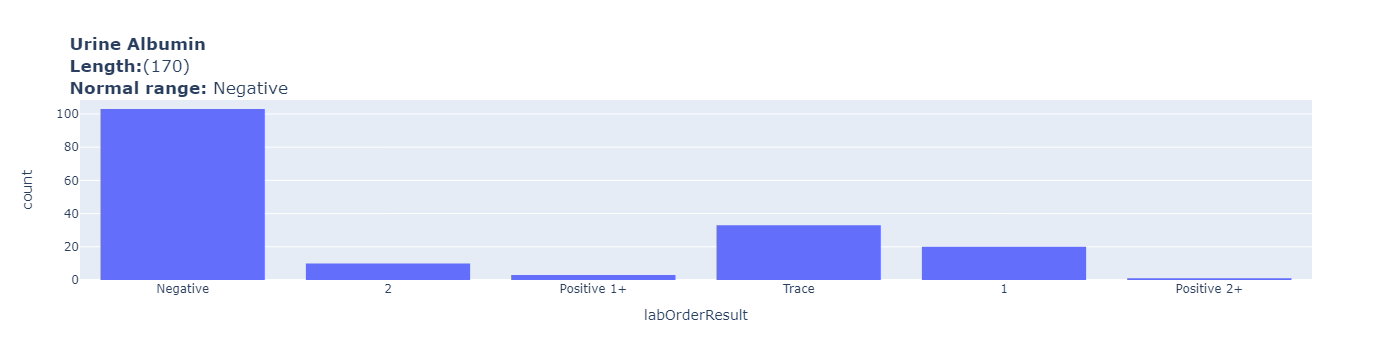

In [608]:
df = selected_lab_df.loc[selected_lab_df['labItemsNameRef'] == lab_name]
df_len = df.shape[0]

normal_range = 'Negative'
fig1 = px.histogram(data_frame = df,x = "labOrderResult",title=f'<b>{lab_name}</b><br><b>Length:</b>({df_len})<br><b>Normal range:</b> {normal_range}')
fig1.show()

#### labItemsNormalValueRef

In [609]:
selected_lab_df.loc[selected_lab_df['labItemsNameRef'] == 'Urine Albumin','labItemsNormalValueRef'].value_counts()

              115
Negative       49
Negative -      6
Name: labItemsNormalValueRef, dtype: int64

#### labItemsUnit

In [610]:
selected_lab_df.loc[selected_lab_df['labItemsNameRef'] == 'Urine Albumin','labItemsUnit'].value_counts()

     140
+     30
Name: labItemsUnit, dtype: int64

In [611]:
selected_lab_df.loc[(selected_lab_df['labItemsNameRef'] == 'Urine Albumin') & (selected_lab_df['labItemsUnit'] == '')]

,rowID,cid,labItemsNameRef,labItemsNormalValueRef,labOrderResult,labItemsUnit
79,2981059.0,8af6c5ce961d556794ddc691089f3887fe0b8167eef188...,Urine Albumin,Negative,Negative,
167,4680522.0,9fb79d9d7c7e0d536213f063a061707fb599d775fa6087...,Urine Albumin,,Negative,
237,2269053.0,ccc731dacaa44da723a1c9f863091e53de77b9891b0e17...,Urine Albumin,Negative,Negative,
299,135663.0,ab1b3e37fefa842f7c0845835d243911cbd56b79e6447a...,Urine Albumin,Negative -,Negative,
402,5470047.0,7e56863e5edfb511962c64dda46fb0547f1fdf26120f08...,Urine Albumin,,Negative,
...,...,...,...,...,...,...
13416,4382661.0,3f3701e8bcda639e00bee3966b726182cdd8cfb37b0883...,Urine Albumin,,Trace,
13497,2146005.0,1d60209df9b0437f25613530f9414481912d14c3de4607...,Urine Albumin,Negative,Negative,
13546,3873437.0,bafa3aa41b99714d9a92bf444a1771c3116540cab1d238...,Urine Albumin,Negative,Negative,
13585,1466704.0,0d62ccf972e7c7562ebedc8014f7c76c00cbe9908869be...,Urine Albumin,,Negative,


In [612]:
selected_lab_df.loc[(selected_lab_df['labItemsNameRef'] == 'Urine Albumin') & (selected_lab_df['labItemsUnit'] == '+')]

,rowID,cid,labItemsNameRef,labItemsNormalValueRef,labOrderResult,labItemsUnit
136,888917.0,4898d581bde0e3216c15662327cd301286670cd12786f6...,Urine Albumin,,2,+
2396,5558026.0,706a1c84aaad981230229bce34333ba56e6101086e6946...,Urine Albumin,,1,+
2449,3495320.0,d112123e8d318c3d30d548632fd886929cc0100d5213d9...,Urine Albumin,,1,+
3313,2354917.0,57167908e51a96d268291215151c655dc49f3a8fb24e8e...,Urine Albumin,,1,+
3590,3041846.0,a9063dd270189f929d1cbfb2dadc99b2653d60c5f87cd7...,Urine Albumin,,2,+
4337,3757928.0,fe8d00c4c3823b8f6972484ec97000293c3a62fe40484f...,Urine Albumin,,1,+
4726,38916.0,3ed20b1753de33fddd4ae118763613dbf650ec04237805...,Urine Albumin,,1,+
5091,1735486.0,42487a82c354ae0a3d65ca425c2710a72407647757d5ed...,Urine Albumin,,1,+
5203,5149895.0,4b5587e154bc37c47cbc535268e9f60569a312f363c3ec...,Urine Albumin,,1,+
5237,138362.0,04bf45444d764f5a03c2525963af448915b28a30c8046c...,Urine Albumin,Negative -,1,+


#### Before

In [613]:
selected_lab_df.loc[selected_lab_df['labItemsNameRef'] == 'Urine Albumin','labOrderResult'].value_counts()

Negative       103
Trace           33
1               20
2               10
Positive 1+      3
Positive 2+      1
Name: labOrderResult, dtype: int64

In [614]:
s = '1'
print(s.isnumeric())

True


In [615]:
def clean_Urine_Albumin_labOrderResult(x):
    negs = ['negative','not seen','not found']
    if x.lower() in negs:
        return 'Negative'
    elif x.lower() == 'trace':
        return 'Trace'
    elif x.isnumeric():
        a = re.search(r'\d+', x).group()
        return f'Positive {a}+'
    else:
        return x

In [616]:
selected_lab_df.loc[selected_lab_df['labItemsNameRef'] == 'Urine Albumin','labOrderResult'] = selected_lab_df.loc[selected_lab_df['labItemsNameRef'] == 'Urine Albumin','labOrderResult'].apply(clean_Urine_Albumin_labOrderResult)

In [617]:
selected_lab_df.loc[selected_lab_df['labItemsNameRef'] == 'Urine Albumin','labOrderResult'].value_counts()

Negative       103
Trace           33
Positive 1+     23
Positive 2+     11
Name: labOrderResult, dtype: int64

#### After

### BUN

#### Before

#### Before

#### Before

#### Before

### Hb

#### Before

#### Before

#### Before

#### Before

### Urine Leukocytes

#### Before

#### Before

#### Before

#### Before

### Leukocytes

#### Before

#### Before

#### Before

#### Before

#### Missing value

In [618]:
# selected_lab_df.isna().sum()

In [619]:
# changed_lab_df = xlr.change_labItemUnit_labItemNormalValueRef(selected_lab_df)

In [620]:
# changed_lab_df.iloc[:, 2:6]

In [621]:
# changed_lab_df.loc[changed_lab_df['labItemsNameRef'] == 'WBC']

#### Missing value

In [622]:
# changed_lab_df.isna().sum()

In [623]:
# selected_lab_df

# Export CSV File

In [624]:
# changed_lab_df.to_csv('extractedLabResult.csv', index= False)